
# Importación de librerías

In [ ]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH_FOLDER = '/content/drive/MyDrive/Data Science Class/Master_DSC_Shared_Folder/DSMarket/Notebooks/Clustering/Clustering_Hector'
PATH_FOLDER

'/content/drive/MyDrive/Data Science Class/Master_DSC_Shared_Folder/DSMarket/Notebooks/Clustering/Clustering_Hector'

In [ ]:
# PATH_FOLDER = '/content/drive/MyDrive/Master_Data_Science/TFM/Dataset_DSMarket'
# PATH_FOLDER

# Importación de los datos


In [ ]:
# PATH_FULL_DATASET = os.path.join(PATH_FOLDER, 'dataset_completo.csv')

# full_df = pd.read_csv(PATH_FULL_DATASET,index_col=0)

In [ ]:
PATH_CLUSTERING_DF = os.path.join(PATH_FOLDER, 'df_for_product_clustering')

df = pd.read_pickle(PATH_CLUSTERING_DF)

In [ ]:
df

item     category     department       d  units_sold  \
0         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_1           0   
1         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_2           0   
2         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_3           0   
3         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_4           0   
4         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_5           0   
...                    ...          ...            ...     ...         ...   
5567469  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1822          32   
5567470  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1823          13   
5567471  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1824           7   
5567472  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1825          13   
5567473  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1826          20   

              date    weekday  weekday_int     event  year  month  day  \
0       2011-01-29   Saturday            1  No_event  2011      1   29   
1       2011-01-30     Sunday            2  No_event  2011      1   30   
2       2011-01-31     Monday            3  No_event  2011      1   31   
3       2011-02-01    Tuesday            4  No_event  2011      2    1   
4       2011-02-02  Wednesday            5  No_event  2011      2    2   
...            ...        ...          ...       ...   ...    ...  ...   
5567469 2016-01-24     Sunday            2  No_event  2016      1   24   
5567470 2016-01-25     Monday            3  No_event  2016      1   25   
5567471 2016-01-26    Tuesday            4  No_event  2016      1   26   
5567472 2016-01-27  Wednesday            5  No_event  2016      1   27   
5567473 2016-01-28   Thursday            6  No_event  2016      1   28   

         yearweek  price_per_unit  
0        201105.0        11.03282  
1        201105.0        11.03282  
2        201105.0        11.03282  
3        201105.0        11.03282  
4        201105.0        11.03282  
...           ...             ...  
5567469  201604.0         1.20000  
5567470  201604.0         1.20000  
5567471  201604.0         1.20000  
5567472  201604.0         1.20000  
5567473  201604.0         1.20000  

[5567474 rows x 14 columns]

<a id = "eda"></a>
# Exploratory Data Analysis (EDA)


**Ideas de clusterizacion:**
- DS Market vende productos de diferentes niveles de precio? Hay franja alta, media y baja?
- Hay productos o categorias de productos que son estacionales?


In [ ]:
def report_df(df, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print(df.info(verbose = verbose))
    total_nulos = df.isnull().sum().sum()
    print()
    print(f"Tenemos un total de {total_nulos} nulos")

In [ ]:
report_df(df)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567474 entries, 0 to 5567473
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   item            object        
 1   category        object        
 2   department      object        
 3   d               object        
 4   units_sold      int64         
 5   date            datetime64[ns]
 6   weekday         object        
 7   weekday_int     int64         
 8   event           object        
 9   year            int64         
 10  month           int64         
 11  day             int64         
 12  yearweek        float64       
 13  price_per_unit  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 594.7+ MB
None

Tenemos un total de 0 nulos


item    category    department    d  units_sold       date  \
0  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1           0 2011-01-29   
1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_2           0 2011-01-30   
2  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_3           0 2011-01-31   
3  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_4           0 2011-02-01   
4  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_5           0 2011-02-02   

     weekday  weekday_int     event  year  month  day  yearweek  \
0   Saturday            1  No_event  2011      1   29  201105.0   
1     Sunday            2  No_event  2011      1   30  201105.0   
2     Monday            3  No_event  2011      1   31  201105.0   
3    Tuesday            4  No_event  2011      2    1  201105.0   
4  Wednesday            5  No_event  2011      2    2  201105.0   

   price_per_unit  
0        11.03282  
1        11.03282  
2        11.03282  
3        11.03282  
4        11.03282

In [ ]:
def plot_single_ts(df,ts_id,year):

  df = df[(df['item']==ts_id)&(df['year']==year)]
  x = df['date']
  y = df['units_sold']
  plt.figure(figsize=(30,7))
  plt.plot(x, y, label = ts_id,lw=4)
  plt.title(ts_id+'_sales_'+str(year))
  plt.legend(loc = "upper left")


  # Aumentare la gradazione dell'asse X
  # Creare una serie di date con intervalli regolari
  date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='W')
  plt.xticks(date_range, rotation=45)
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  plt.tight_layout()

  # Mostrare il grafico
  plt.show()

In [ ]:
id_accesories_list = df[df['category']=='ACCESORIES']['item'].unique().tolist()
id_supermarket_list = df[df['category']=='SUPERMARKET']['item'].unique().tolist()


In [ ]:
# for id in id_accesories_list:
#   plot_single_ts(df,id,2015)

In [ ]:
# for id in id_supermarket_list:
#   plot_single_ts(df,id,2015)

## Productos que se venden en cada ciudadad

Queremos ver si todos los productos se venden en cada ciudad.

In [ ]:
# store_item_gbdf = full_df.groupby(['store','item']).agg(
#     total_units_sold = ('units_sold',np.sum)
# )

In [ ]:
# store_item_gbdf

In [ ]:
# store_item_gbdf[store_item_gbdf['total_units_sold']==0]

Vemos que todos los productos se han vendido al menos una vez en todas las tiendas del dataset. Por eso decidimos de utilizar los datos de una sola tienda, para disminuir la carga computacional.
Además utlizaremos solamente los datos del ultimo año completo disponible osea el 2015. Eso porque estamos haciendo una clusterizacion basada en las caracteristicas y comportamiento de los productos finalizada a generar grupos de control para las campañas de merketing. No queremos hacer una indagen más amplia del historial de mercado, que podría ser más util en otro caso, quizás de analisis global.

## Ventas por dias de la semana

In [ ]:
item_sample_list = df['item'].sample(20,random_state=12).tolist()
item_sample_list

['HOME_&_GARDEN_1_488',
 'SUPERMARKET_2_246',
 'SUPERMARKET_3_329',
 'HOME_&_GARDEN_2_192',
 'HOME_&_GARDEN_2_013',
 'HOME_&_GARDEN_1_024',
 'ACCESORIES_1_181',
 'ACCESORIES_2_073',
 'HOME_&_GARDEN_2_212',
 'SUPERMARKET_1_190',
 'SUPERMARKET_3_723',
 'ACCESORIES_1_029',
 'ACCESORIES_1_338',
 'HOME_&_GARDEN_1_360',
 'HOME_&_GARDEN_1_130',
 'ACCESORIES_1_216',
 'ACCESORIES_1_061',
 'SUPERMARKET_3_079',
 'SUPERMARKET_2_102',
 'SUPERMARKET_2_246']

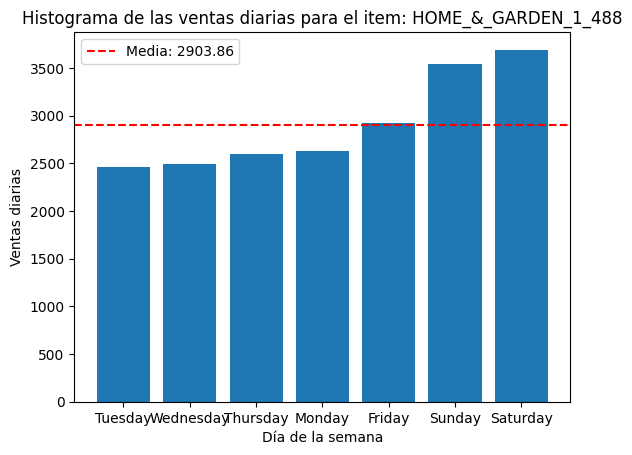

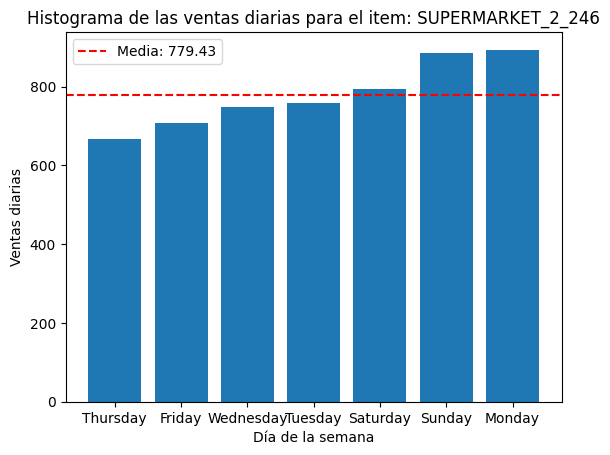

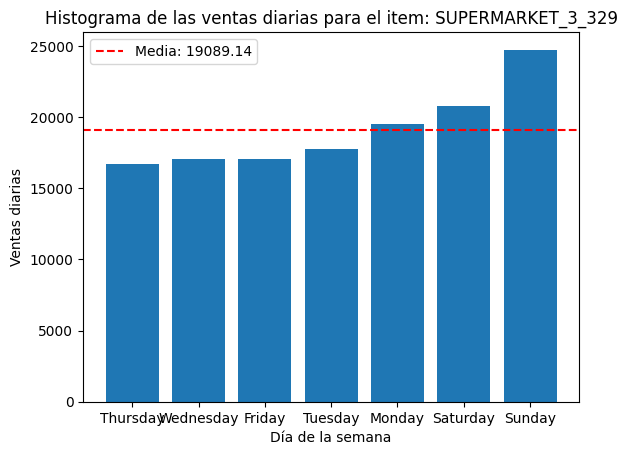

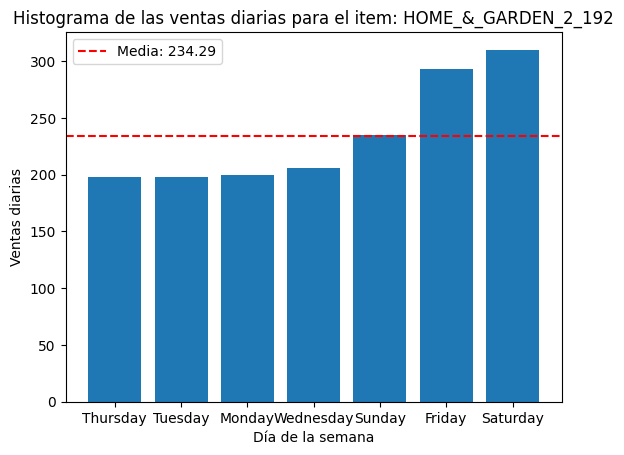

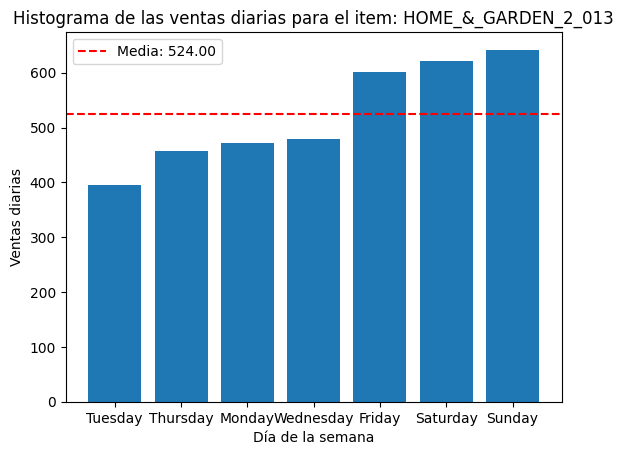

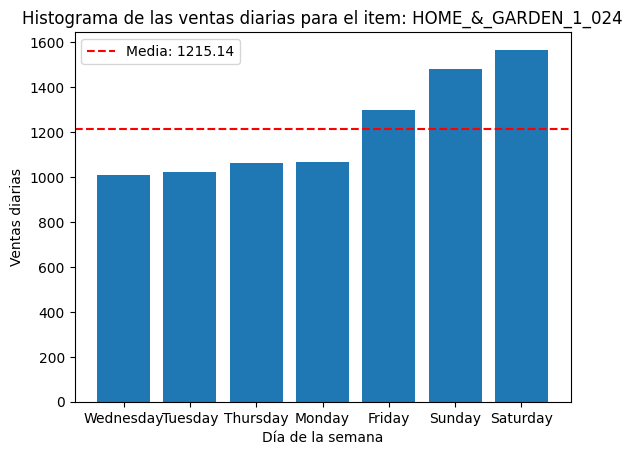

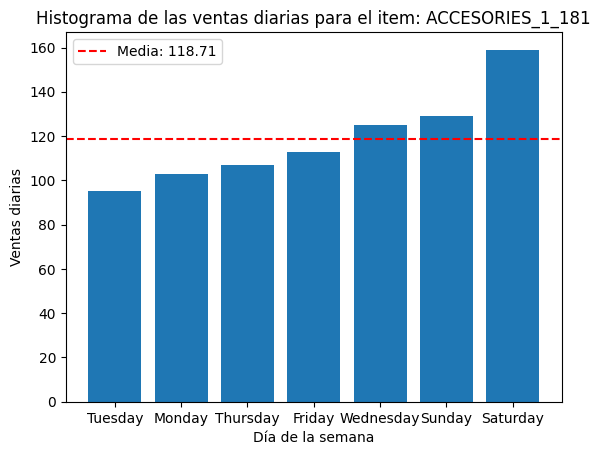

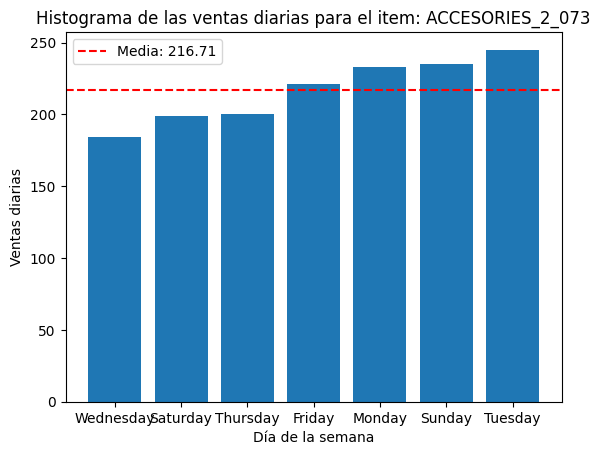

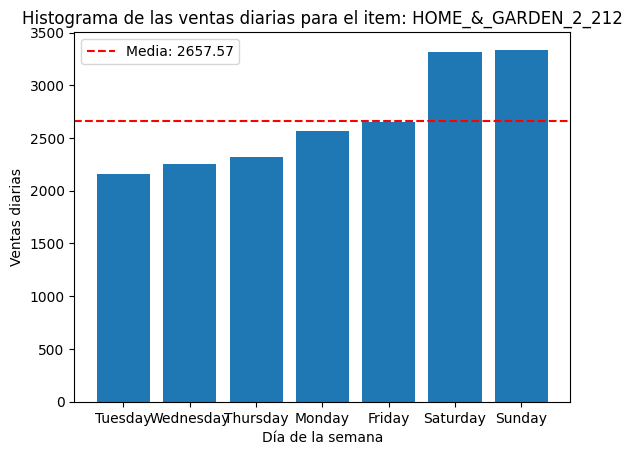

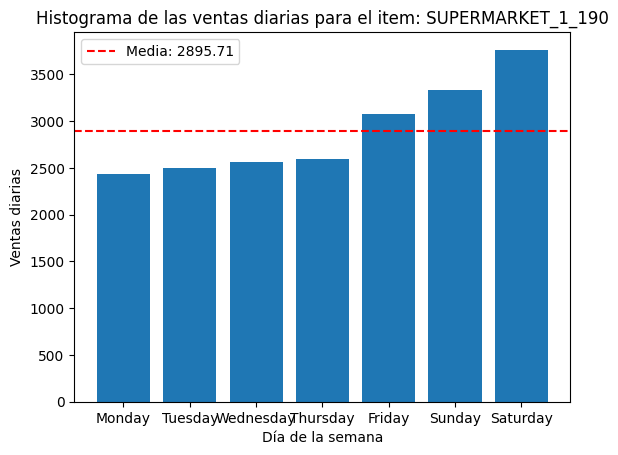

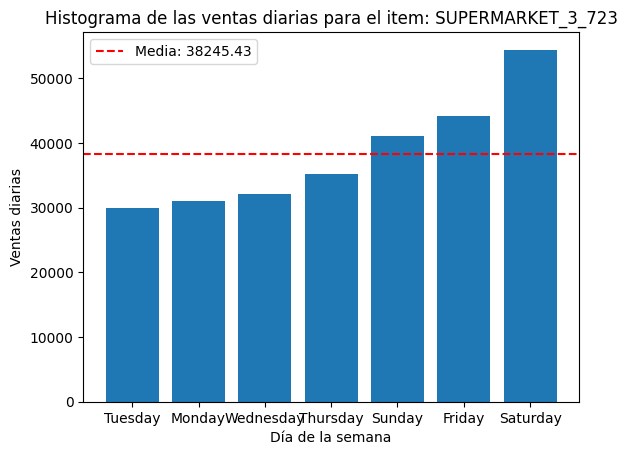

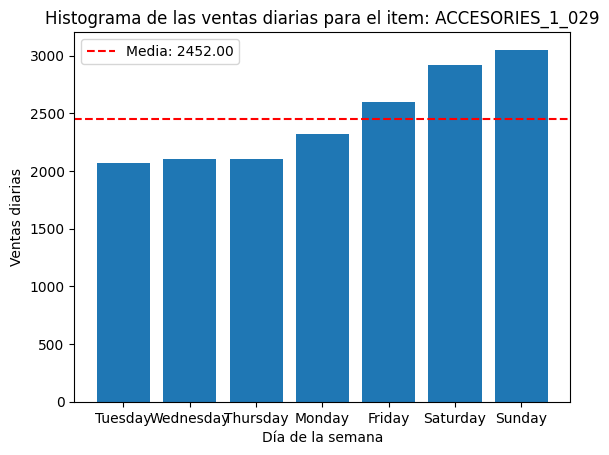

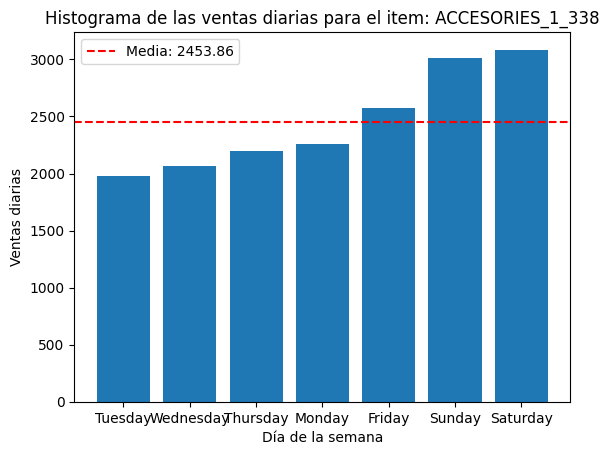

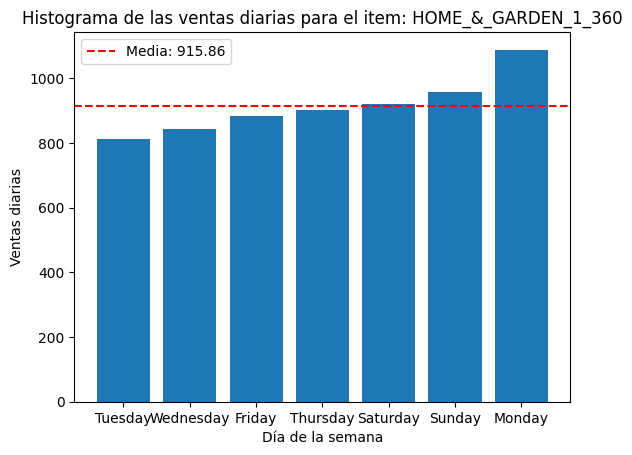

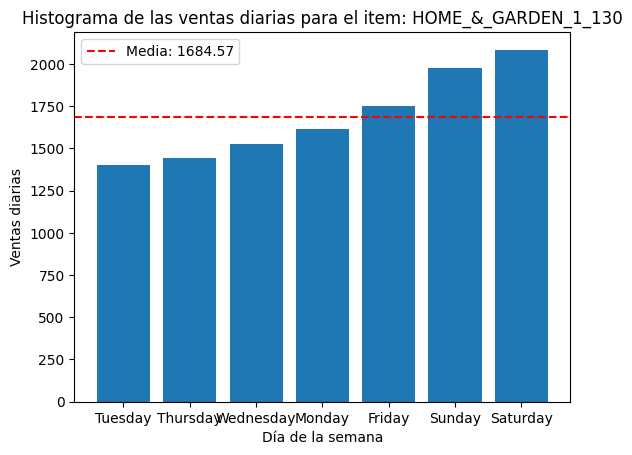

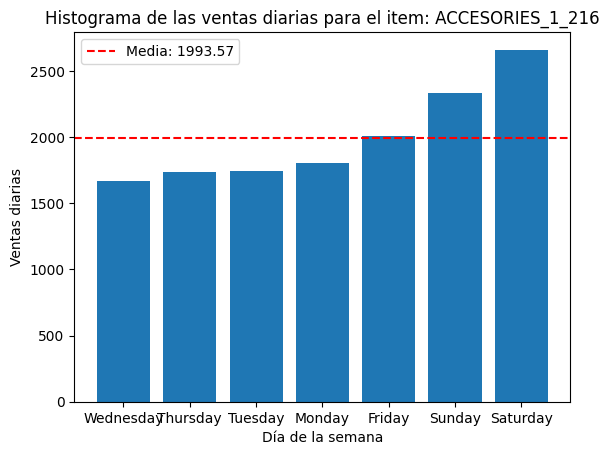

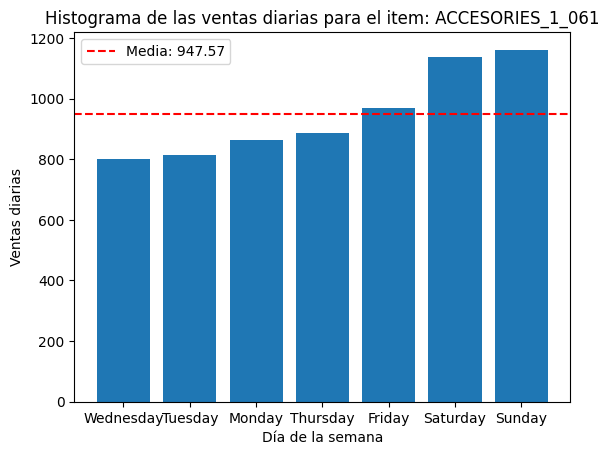

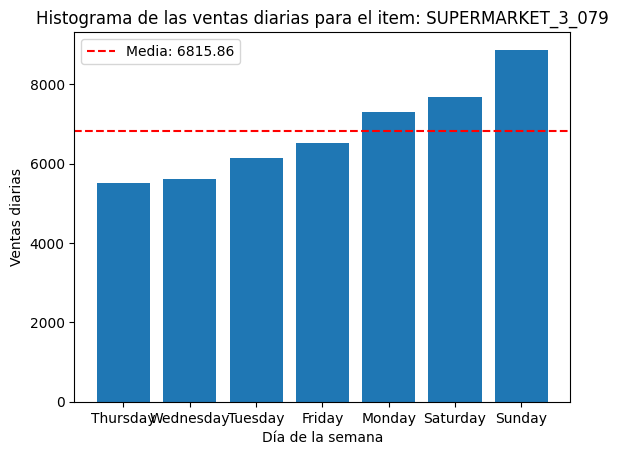

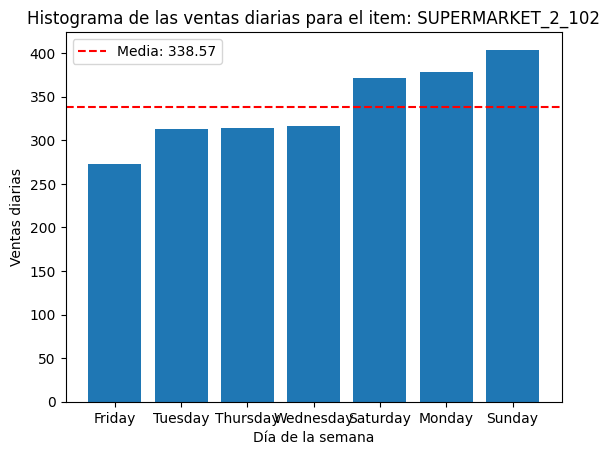

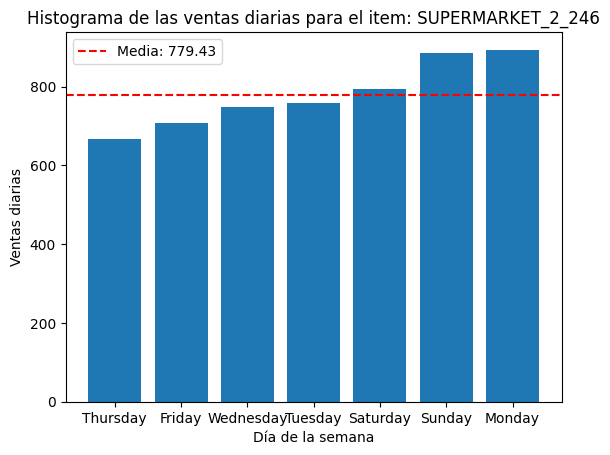

In [ ]:
for item in item_sample_list:
    plt.figure()  # Crea una nueva figura para cada item

    # Agrupa y suma las ventas diarias por día de la semana
    data = df[df['item'] == item].groupby('weekday')['units_sold'].sum().sort_values()

    # Calcula la media de las ventas diarias
    media = data.mean()

    # Genera el histograma usando plt.bar()
    plt.bar(data.index, data.values)

    # Añade una línea horizontal que indica la media
    plt.axhline(y=media, color='red', linestyle='--', label=f'Media: {media:.2f}')

    # Añade un título y etiquetas a los ejes
    plt.title(f'Histograma de las ventas diarias para el item: {item}')
    plt.xlabel('Día de la semana')
    plt.ylabel('Ventas diarias')

    # Añade una leyenda para la línea de la media
    plt.legend()

    # Muestra el gráfico actual antes de pasar al siguiente
    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567474 entries, 0 to 5567473
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   item            object        
 1   category        object        
 2   department      object        
 3   d               object        
 4   units_sold      int64         
 5   date            datetime64[ns]
 6   weekday         object        
 7   weekday_int     int64         
 8   event           object        
 9   year            int64         
 10  month           int64         
 11  day             int64         
 12  yearweek        float64       
 13  price_per_unit  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 594.7+ MB


## Ventas a lo largo del mes

In [ ]:
df.sample(5)

item       category       department       d  \
1451943  HOME_&_GARDEN_1_235  HOME_&_GARDEN  HOME_&_GARDEN_1   d_274   
4792631    SUPERMARKET_3_400    SUPERMARKET    SUPERMARKET_3  d_1208   
989752      ACCESORIES_2_127     ACCESORIES     ACCESORIES_2    d_61   
700513      ACCESORIES_1_392     ACCESORIES     ACCESORIES_1  d_1156   
4243658    SUPERMARKET_3_100    SUPERMARKET    SUPERMARKET_3    d_35   

         units_sold       date    weekday  weekday_int     event  year  month  \
1451943          33 2011-10-29   Saturday            1  No_event  2011     10   
4792631          19 2014-05-20    Tuesday            4  No_event  2014      5   
989752            0 2011-03-30  Wednesday            5  No_event  2011      3   
700513            8 2014-03-29   Saturday            1  No_event  2014      3   
4243658           0 2011-03-04     Friday            7  No_event  2011      3   

         day  yearweek  price_per_unit  
1451943   29  201144.0        4.104667  
4792631   20  201420.0        3.576000  
989752    30  201113.0        5.280100  
700513    29  201413.0       17.263400  
4243658    4  201109.0        4.776000

In [ ]:
item_sample_list_2 = df['item'].sample(20,random_state=1).tolist()
item_sample_list_2

['HOME_&_GARDEN_2_508',
 'HOME_&_GARDEN_2_007',
 'SUPERMARKET_2_042',
 'HOME_&_GARDEN_2_213',
 'SUPERMARKET_3_743',
 'ACCESORIES_1_352',
 'HOME_&_GARDEN_1_131',
 'HOME_&_GARDEN_1_302',
 'SUPERMARKET_2_390',
 'SUPERMARKET_1_137',
 'SUPERMARKET_2_356',
 'ACCESORIES_1_403',
 'HOME_&_GARDEN_2_062',
 'SUPERMARKET_3_763',
 'SUPERMARKET_3_069',
 'ACCESORIES_1_288',
 'ACCESORIES_1_263',
 'ACCESORIES_1_423',
 'HOME_&_GARDEN_2_466',
 'SUPERMARKET_1_038']

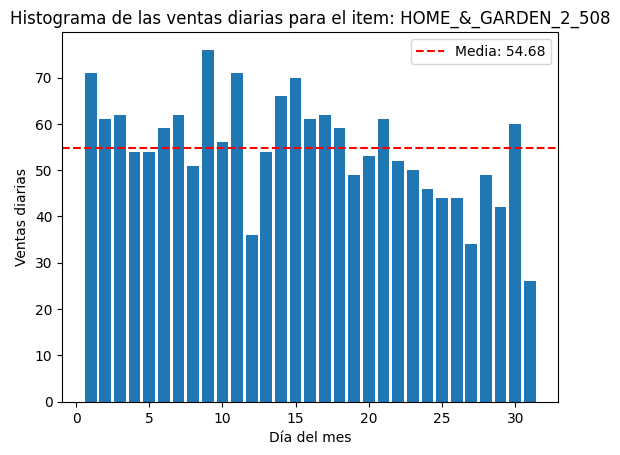

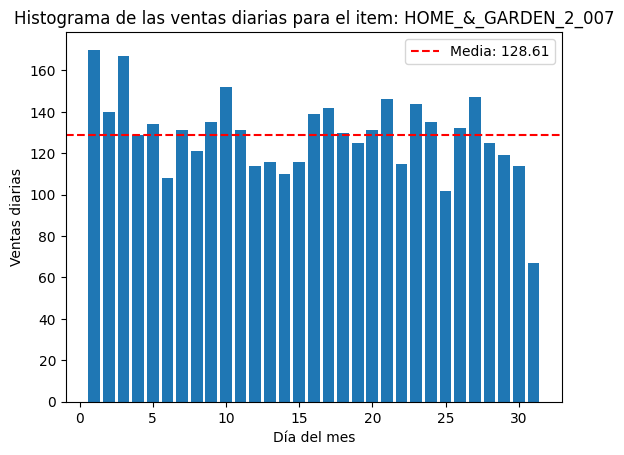

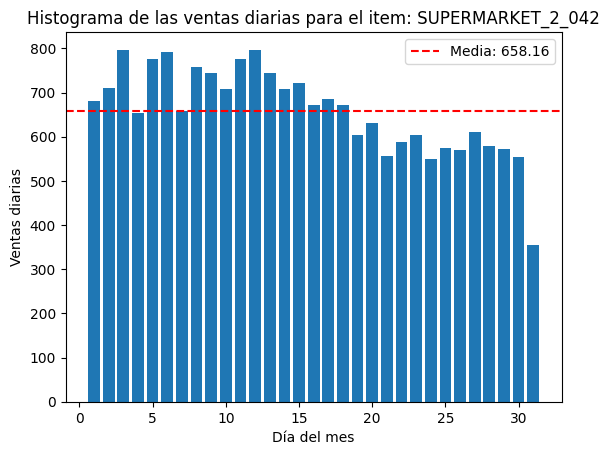

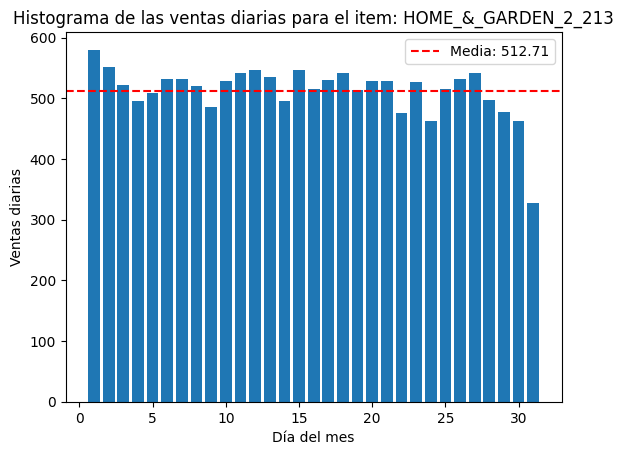

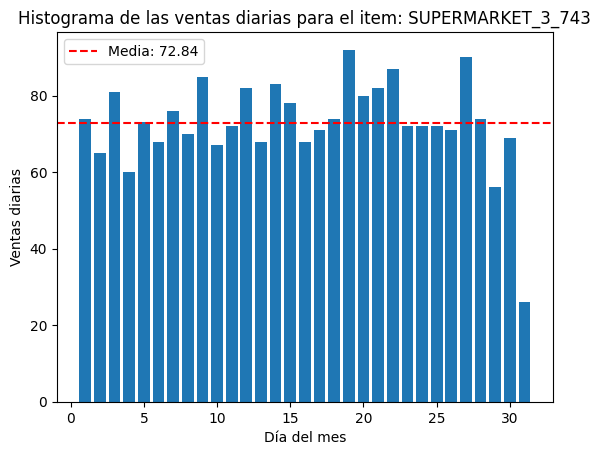

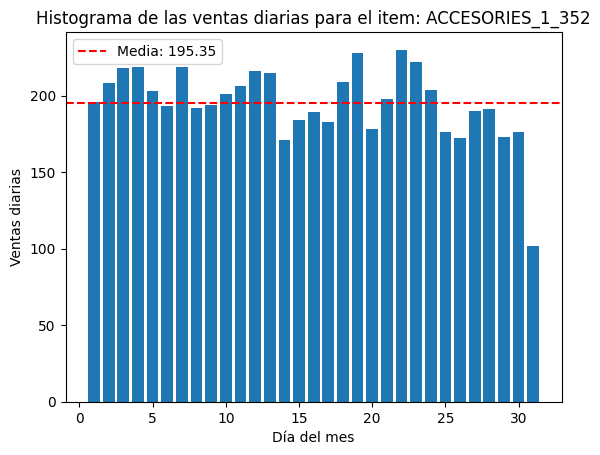

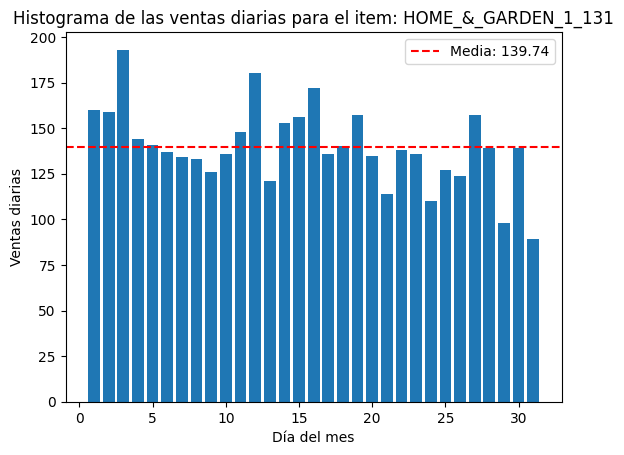

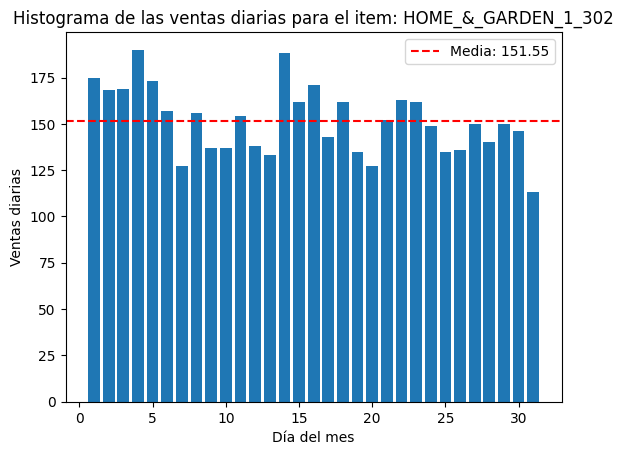

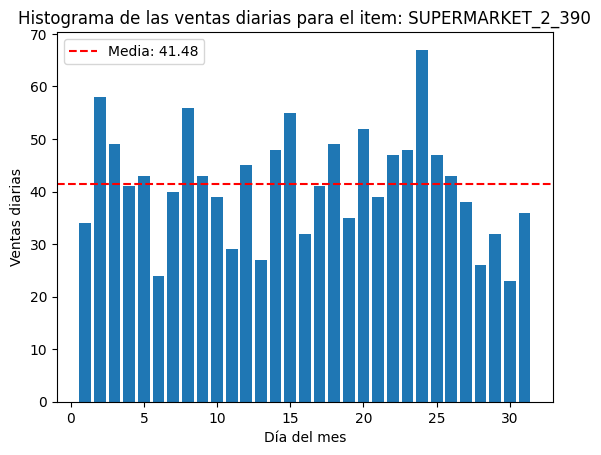

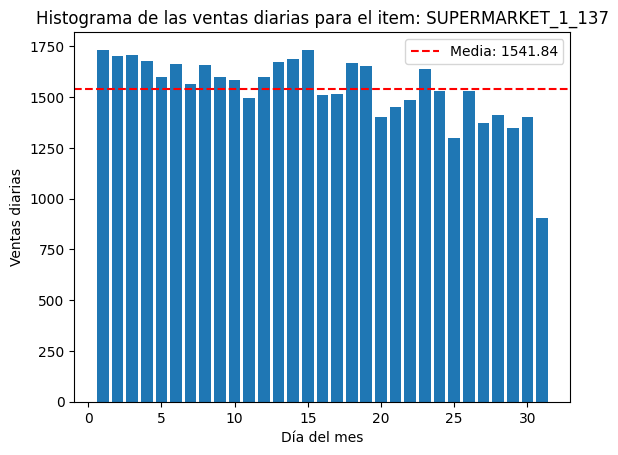

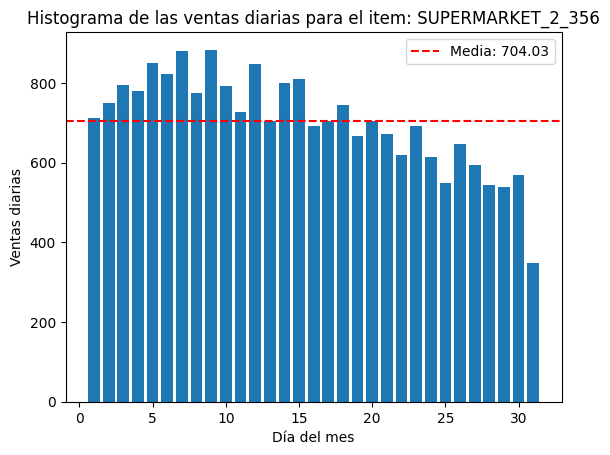

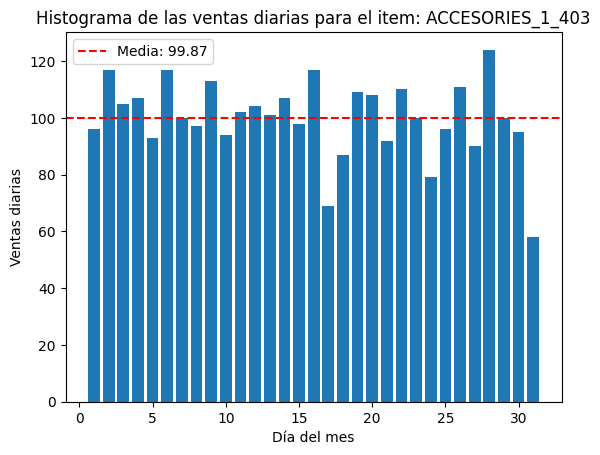

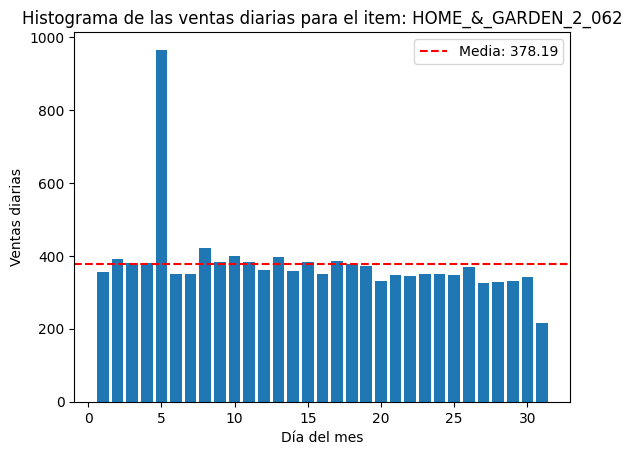

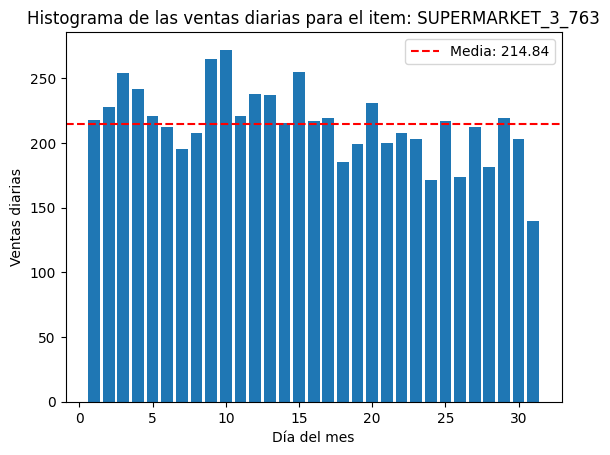

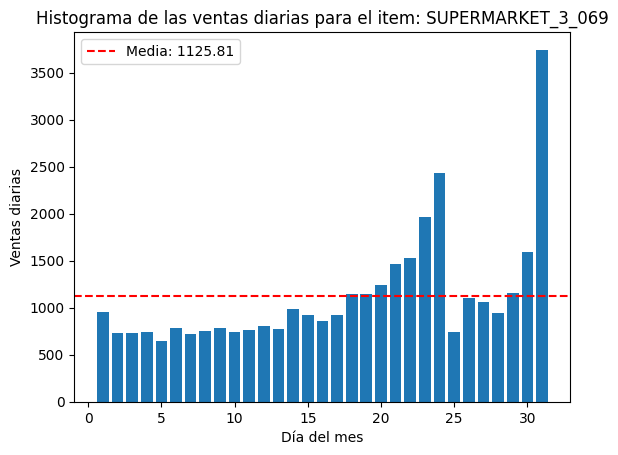

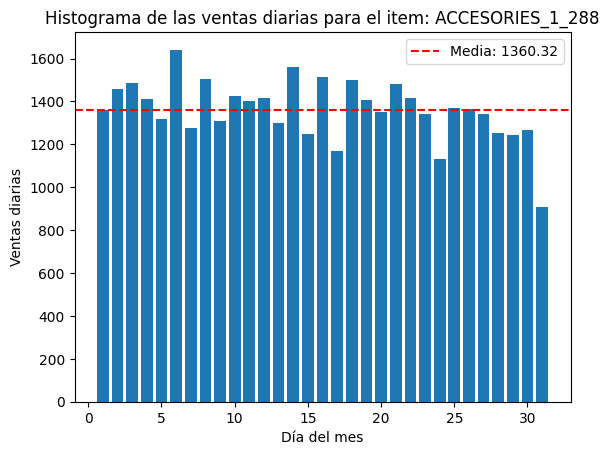

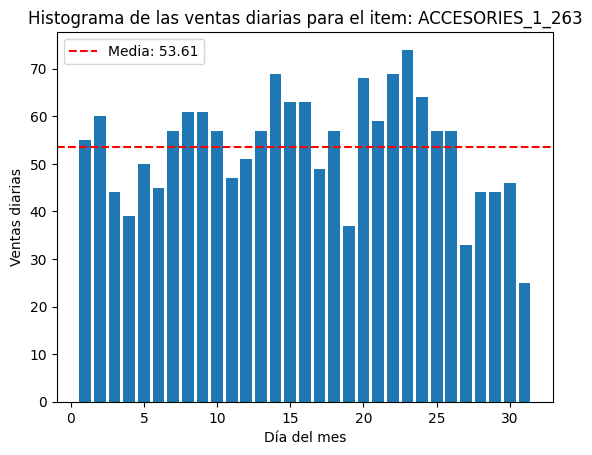

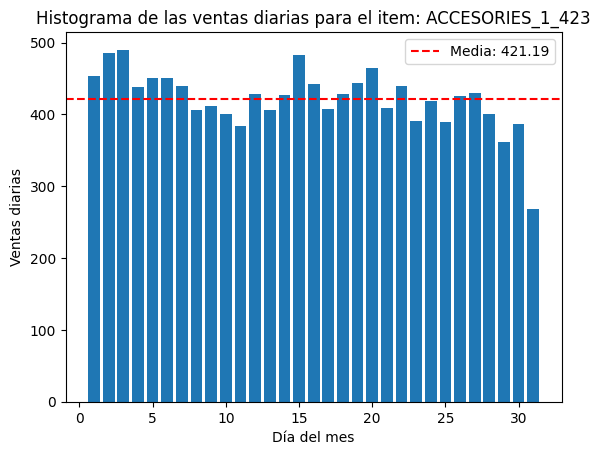

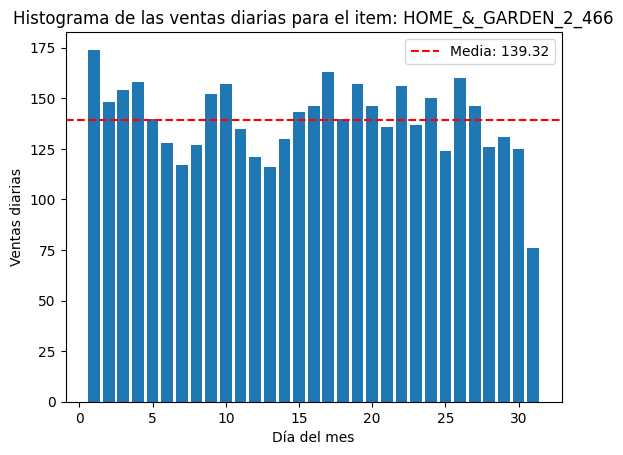

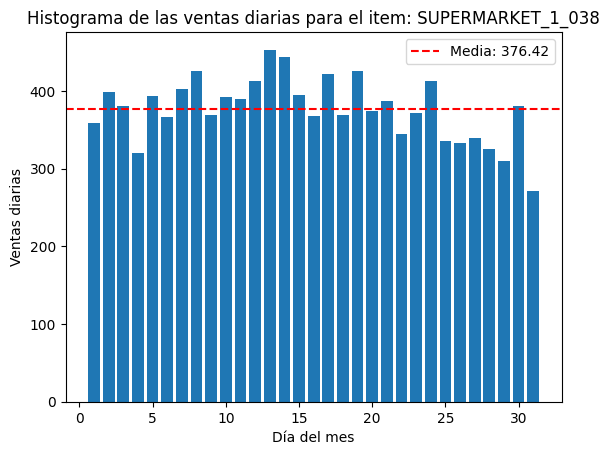

In [ ]:
for item in item_sample_list_2:
    plt.figure()  # Crea una nueva figura para cada item

    # Agrupa y suma las ventas diarias por día de la semana
    data = df[df['item'] == item].groupby('day')['units_sold'].sum().sort_values()

    # Calcula la media de las ventas diarias
    media = data.mean()

    # Genera el histograma usando plt.bar()
    plt.bar(data.index, data.values)

    # Añade una línea horizontal que indica la media
    plt.axhline(y=media, color='red', linestyle='--', label=f'Media: {media:.2f}')

    # Añade un título y etiquetas a los ejes
    plt.title(f'Histograma de las ventas diarias para el item: {item}')
    plt.xlabel('Día del mes')
    plt.ylabel('Ventas diarias')

    # Añade una leyenda para la línea de la media
    plt.legend()

    # Muestra el gráfico actual antes de pasar al siguiente
    plt.show()


## Ventas por mes durante el año

In [ ]:
item_sample_list_3 = df['item'].sample(20,random_state=1).tolist()
item_sample_list_3

['HOME_&_GARDEN_2_508',
 'HOME_&_GARDEN_2_007',
 'SUPERMARKET_2_042',
 'HOME_&_GARDEN_2_213',
 'SUPERMARKET_3_743',
 'ACCESORIES_1_352',
 'HOME_&_GARDEN_1_131',
 'HOME_&_GARDEN_1_302',
 'SUPERMARKET_2_390',
 'SUPERMARKET_1_137',
 'SUPERMARKET_2_356',
 'ACCESORIES_1_403',
 'HOME_&_GARDEN_2_062',
 'SUPERMARKET_3_763',
 'SUPERMARKET_3_069',
 'ACCESORIES_1_288',
 'ACCESORIES_1_263',
 'ACCESORIES_1_423',
 'HOME_&_GARDEN_2_466',
 'SUPERMARKET_1_038']

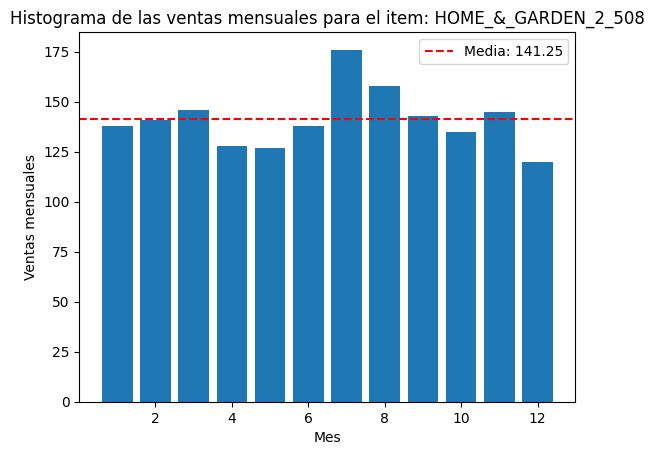

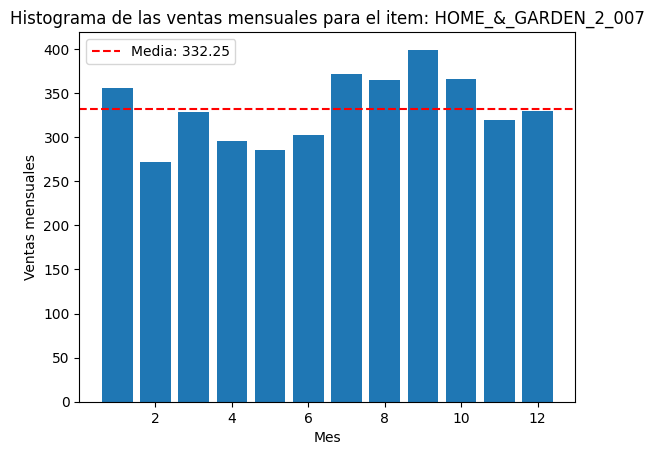

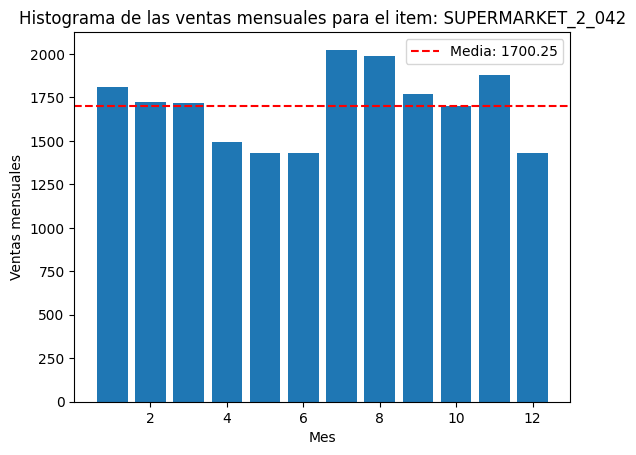

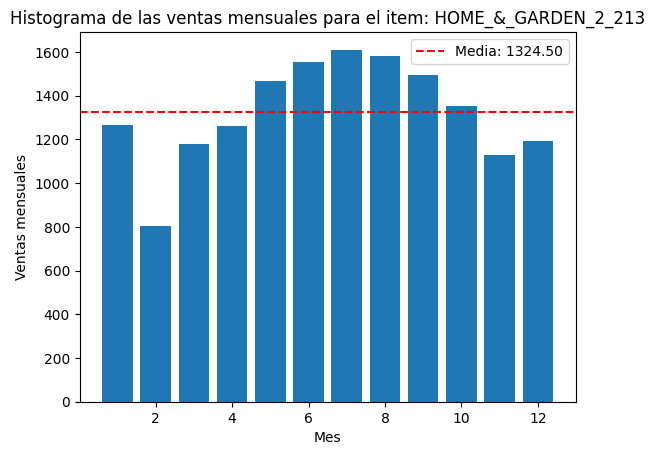

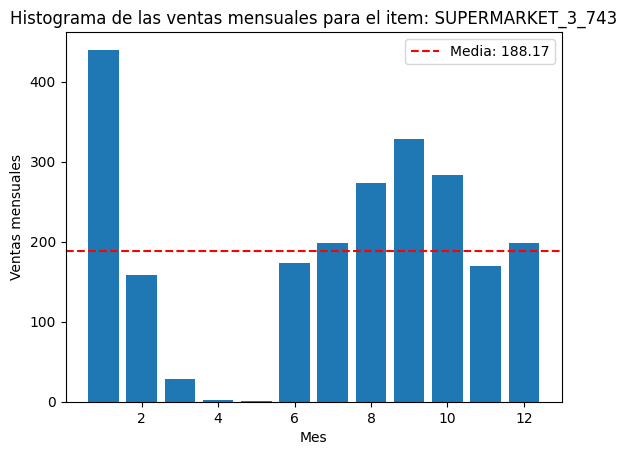

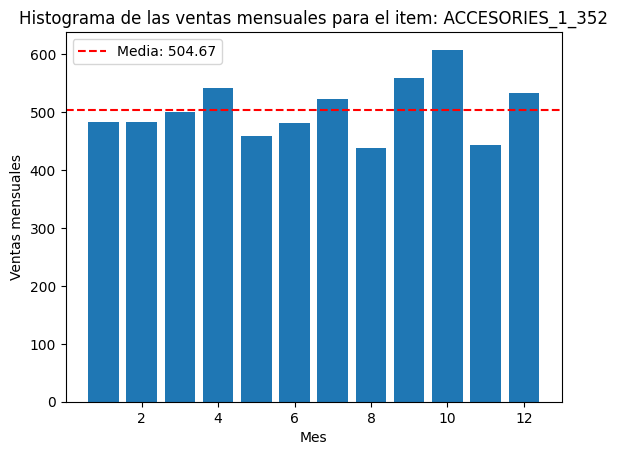

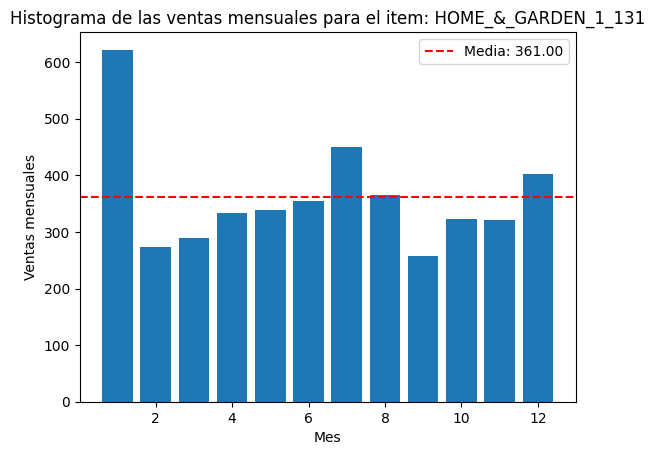

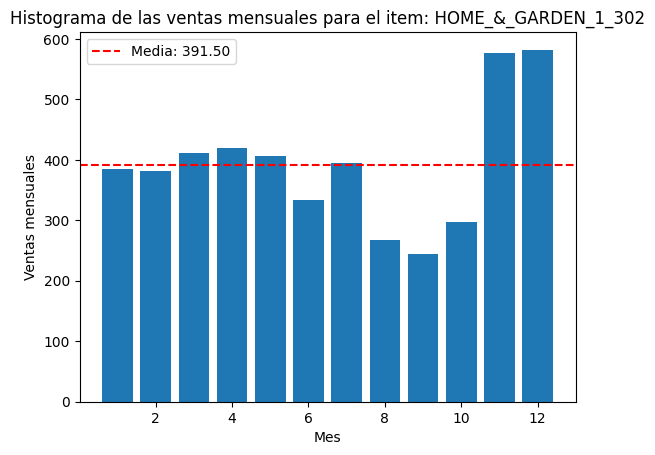

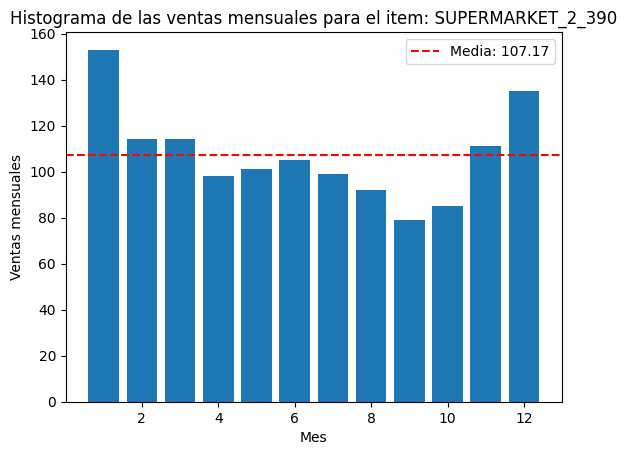

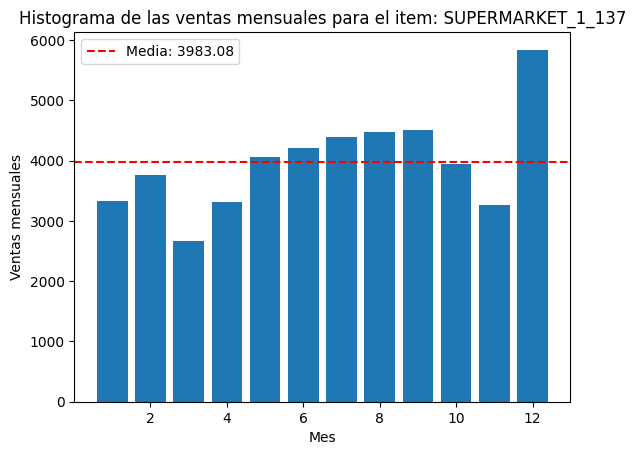

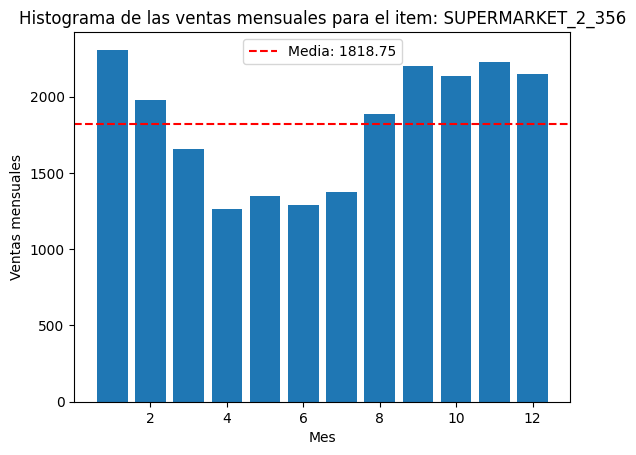

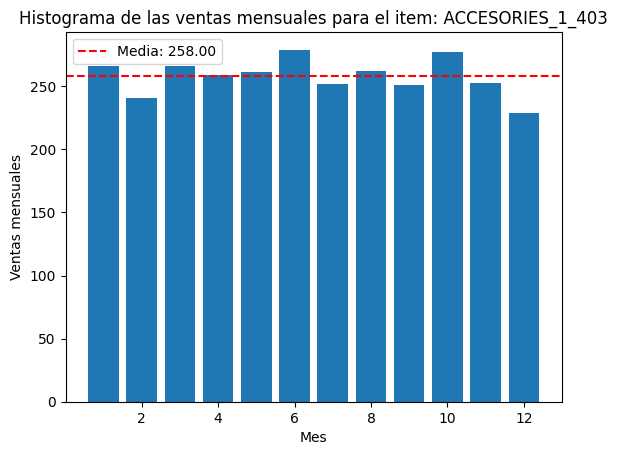

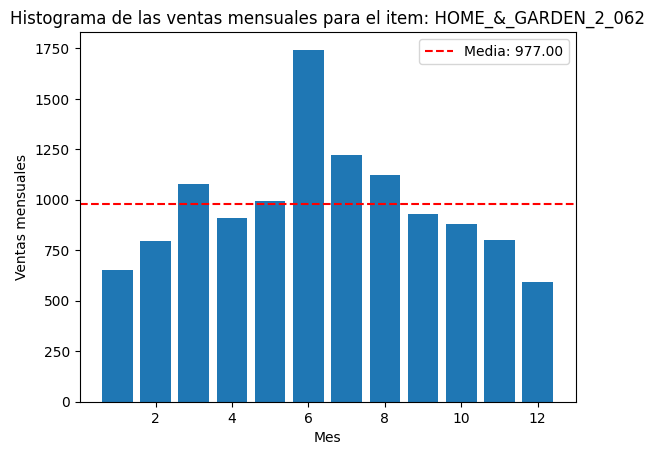

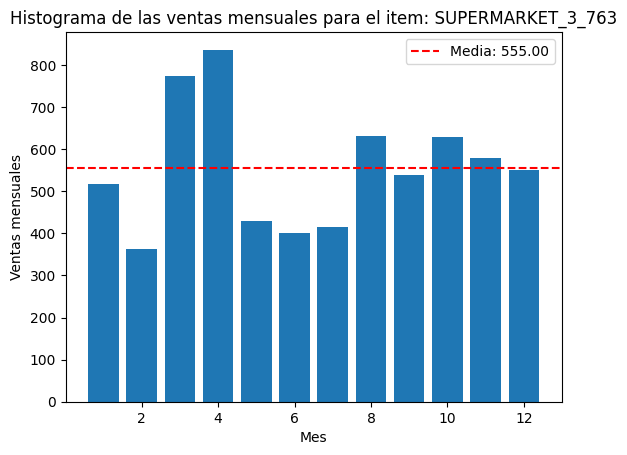

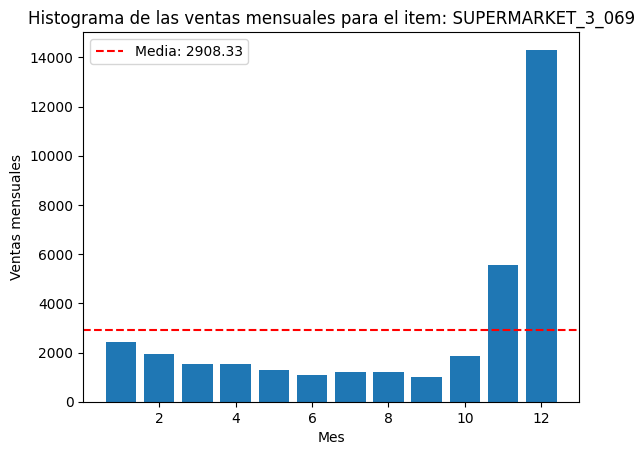

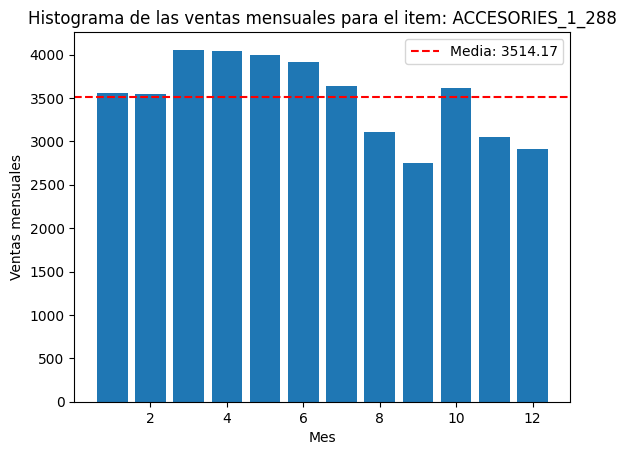

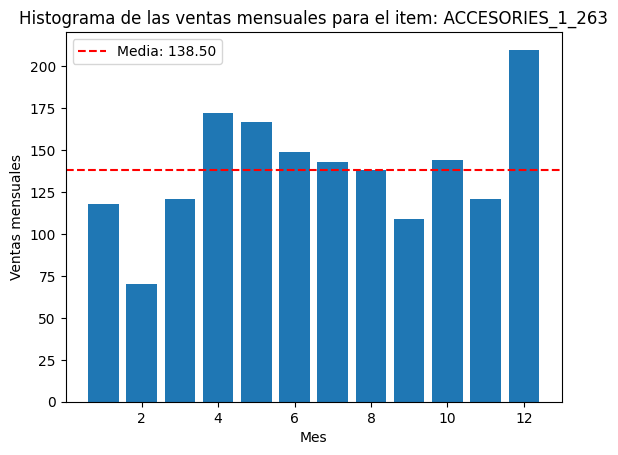

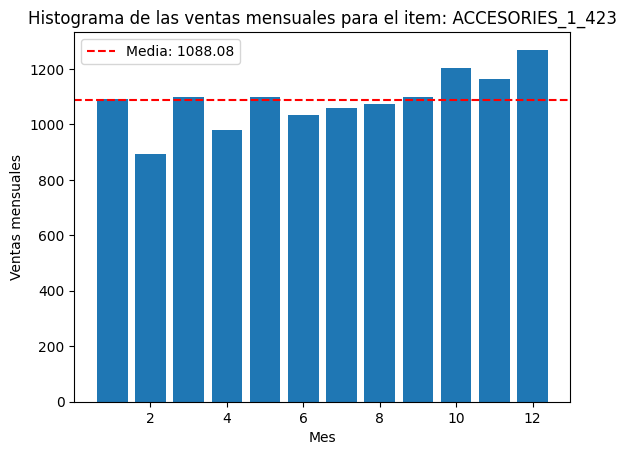

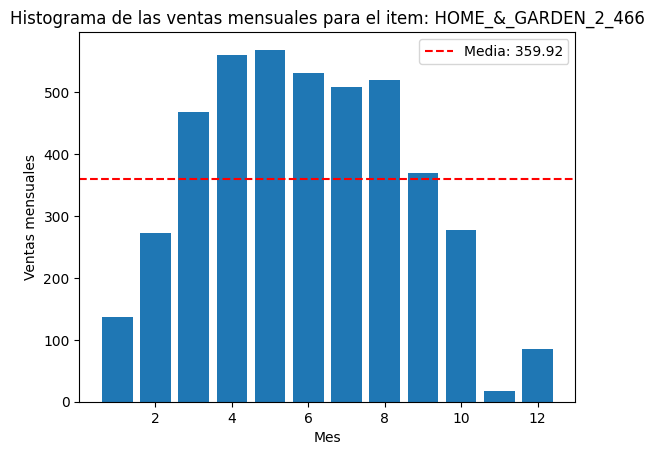

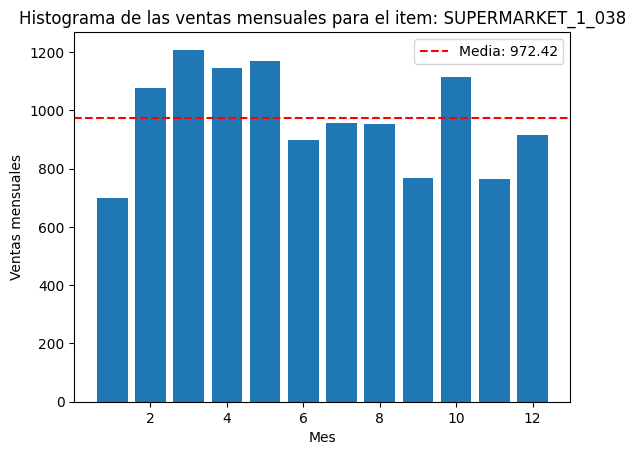

In [ ]:
for item in item_sample_list_3:
    plt.figure()  # Crea una nueva figura para cada item

    # Agrupa y suma las ventas diarias por mes
    data = df[df['item'] == item].groupby('month')['units_sold'].sum().sort_values()

    # Calcula la media de las ventas mensuales
    media = data.mean()

    # Genera el histograma usando plt.bar()
    plt.bar(data.index, data.values)

    # Añade una línea horizontal que indica la media
    plt.axhline(y=media, color='red', linestyle='--', label=f'Media: {media:.2f}')

    # Añade un título y etiquetas a los ejes
    plt.title(f'Histograma de las ventas mensuales para el item: {item}')
    plt.xlabel('Mes')
    plt.ylabel('Ventas mensuales')

    # Añade una leyenda para la línea de la media
    plt.legend()

    # Muestra el gráfico actual antes de pasar al siguiente
    plt.show()

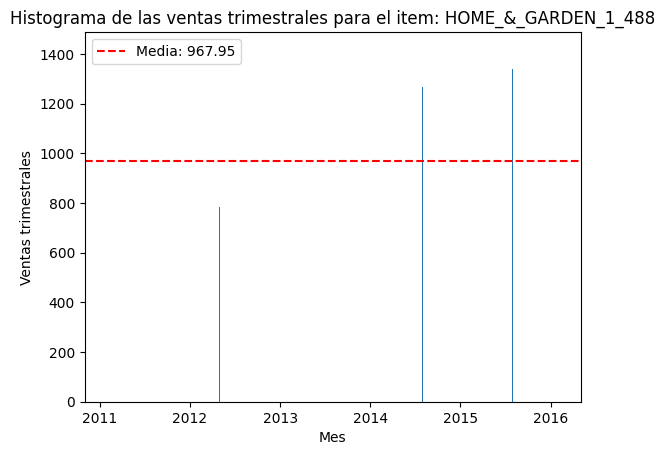

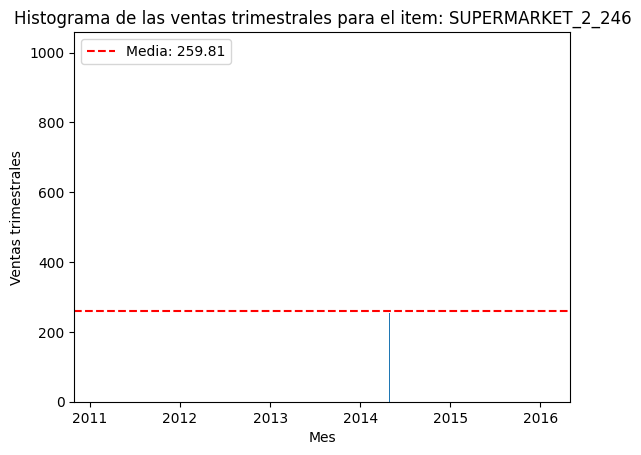

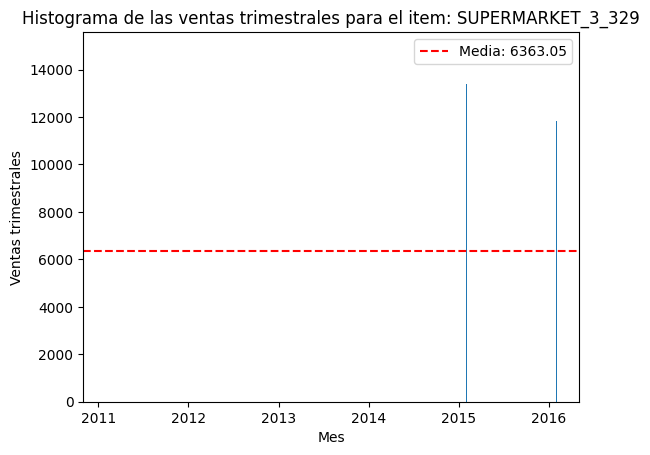

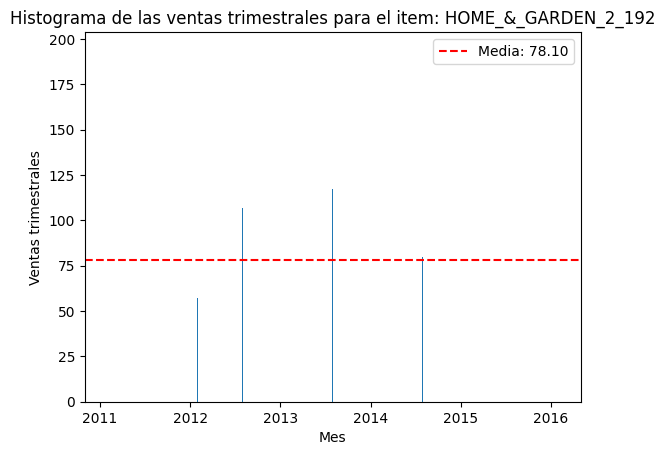

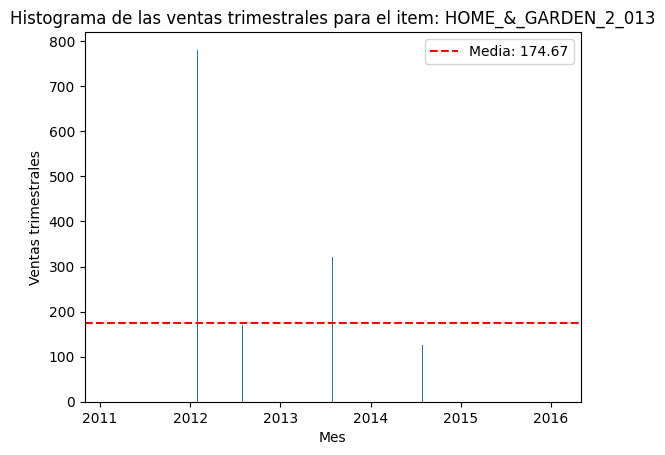

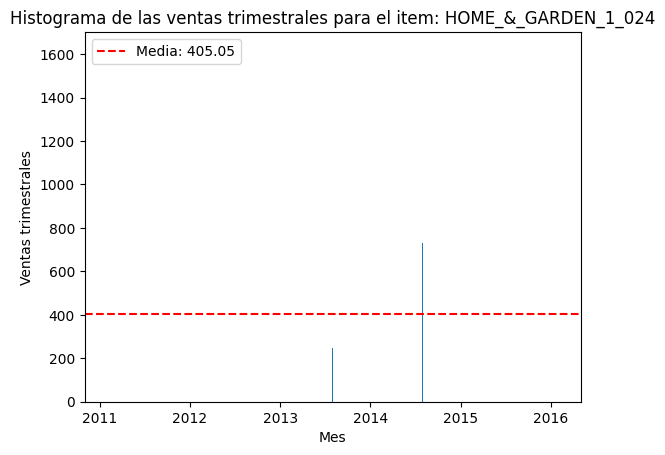

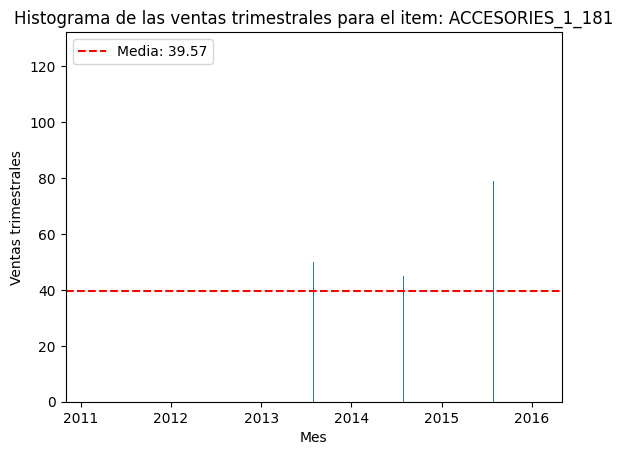

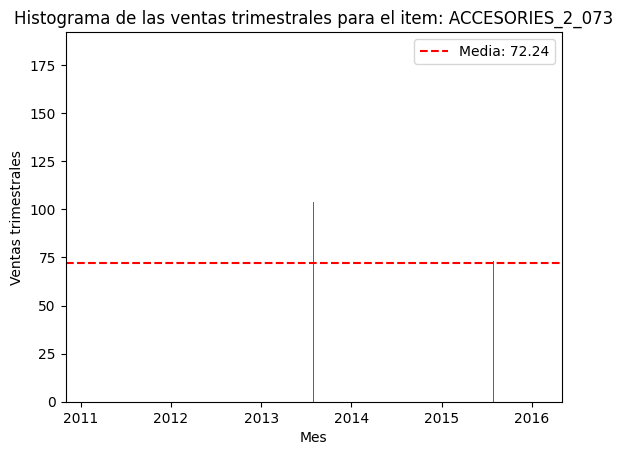

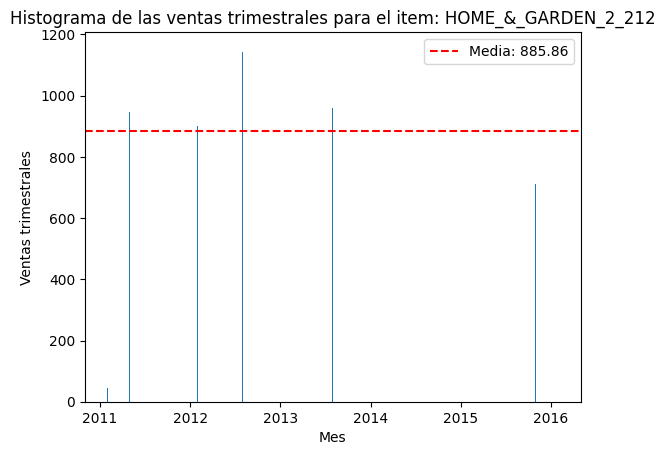

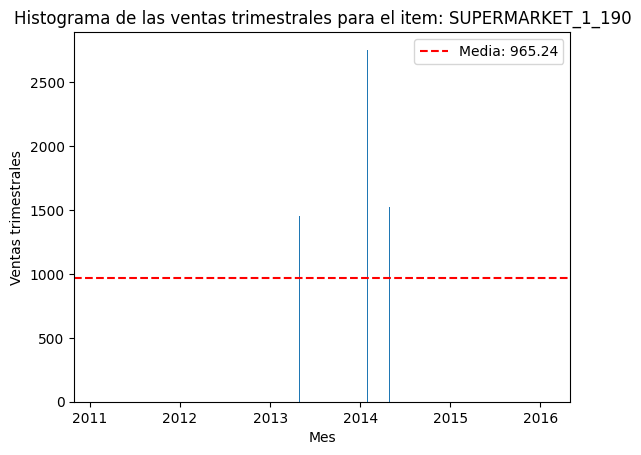

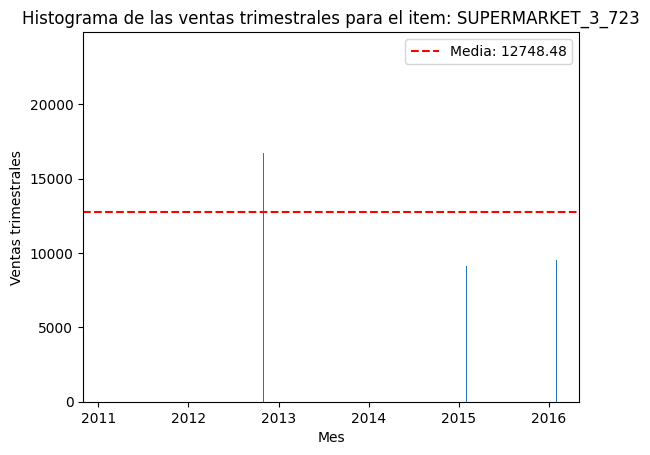

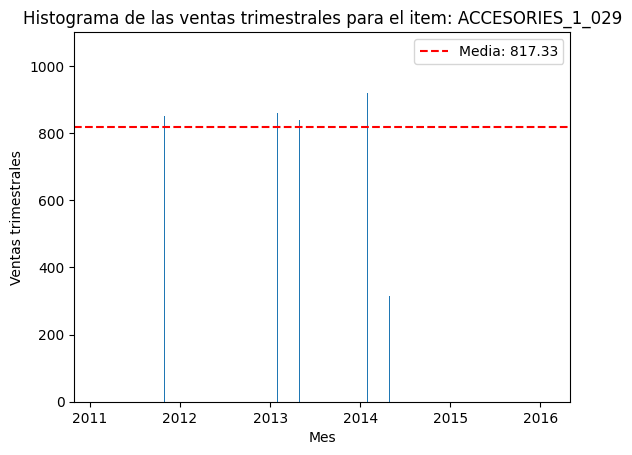

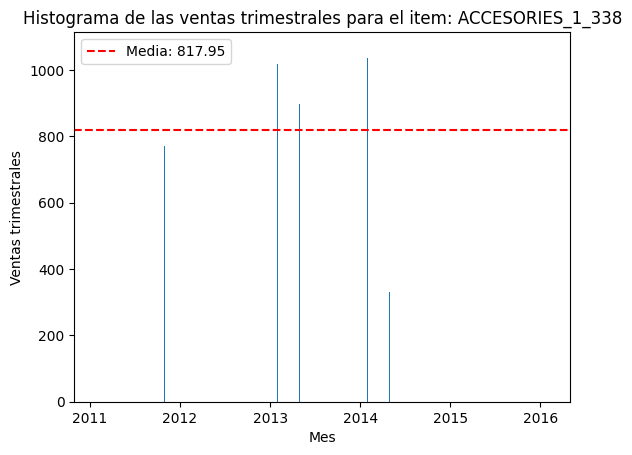

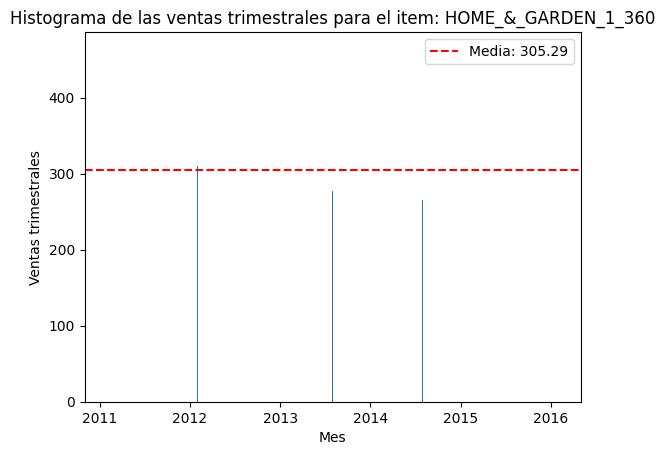

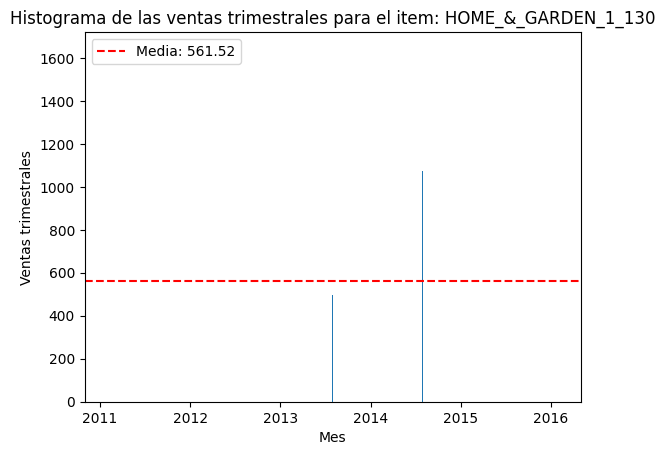

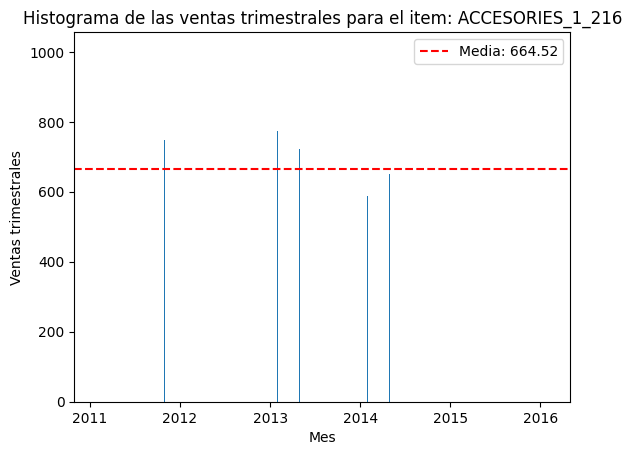

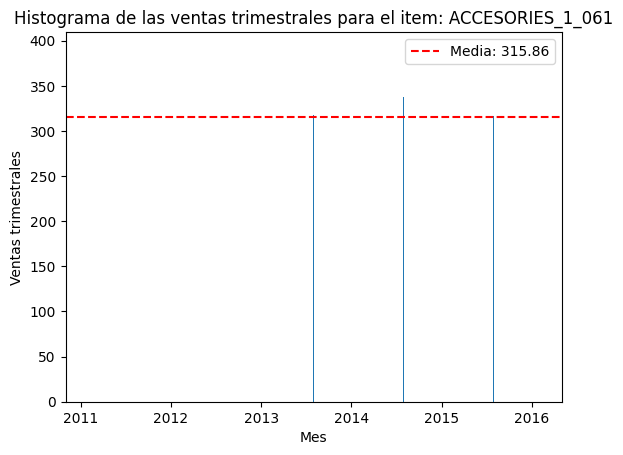

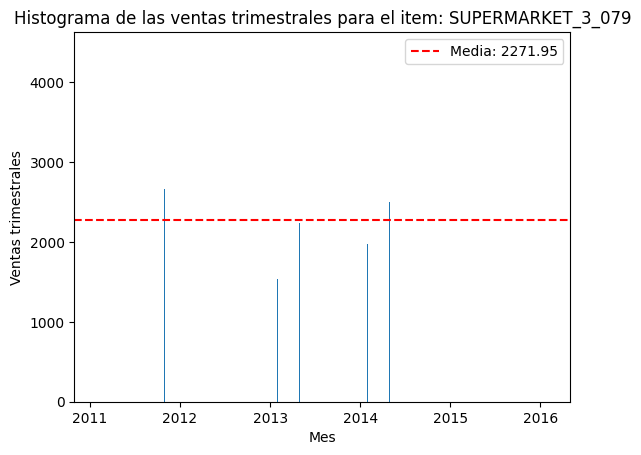

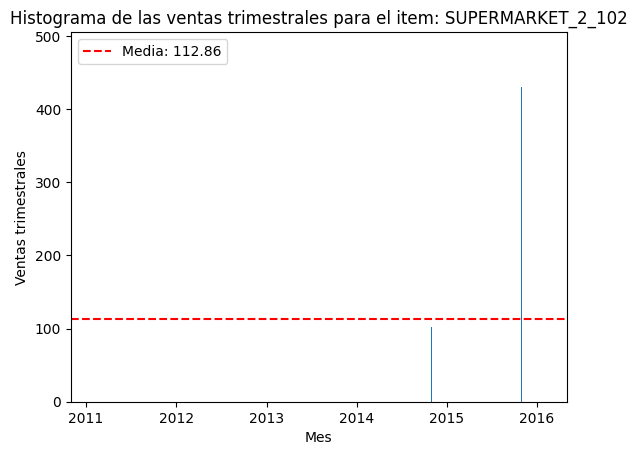

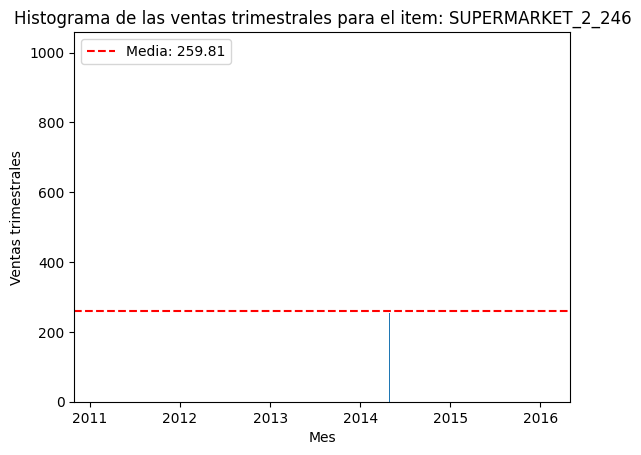

In [ ]:
for item in item_sample_list:
    plt.figure()  # Crea una nueva figura para cada item

    # Agrupa y suma las ventas diarias por mes
    data = df[df['item'] == item].set_index('date').resample('3M')['units_sold'].sum().sort_values()

    # Calcula la media de las ventas mensuales
    media = data.mean()

    # Genera el histograma usando plt.bar()
    plt.bar(data.index, data.values)

    # Añade una línea horizontal que indica la media
    plt.axhline(y=media, color='red', linestyle='--', label=f'Media: {media:.2f}')

    # Añade un título y etiquetas a los ejes
    plt.title(f'Histograma de las ventas trimestrales para el item: {item}')
    plt.xlabel('Mes')
    plt.ylabel('Ventas trimestrales')

    # Añade una leyenda para la línea de la media
    plt.legend()

    # Muestra el gráfico actual antes de pasar al siguiente
    plt.show()

## Ventas durante eventos

In [ ]:
# df.set_index('date').resample('W')['units_sold'].sum()

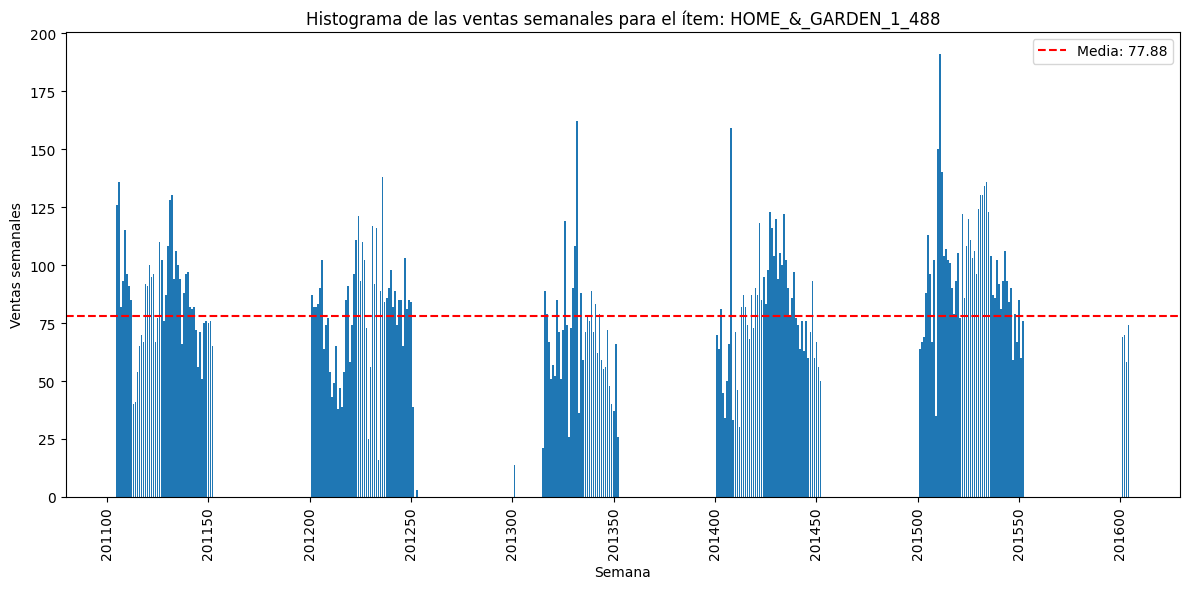

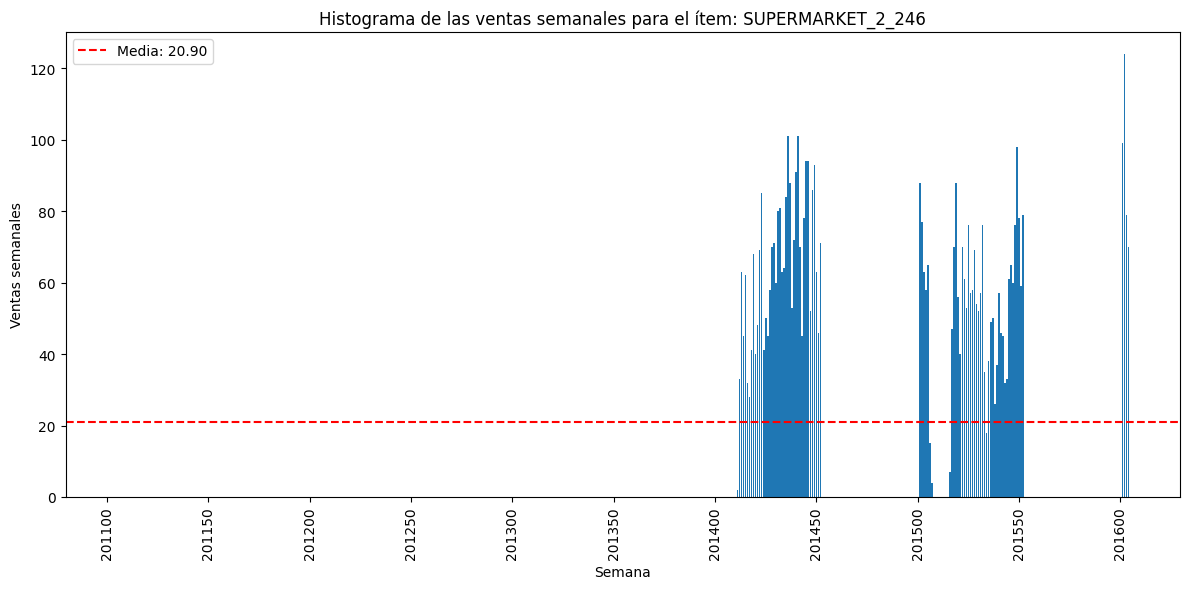

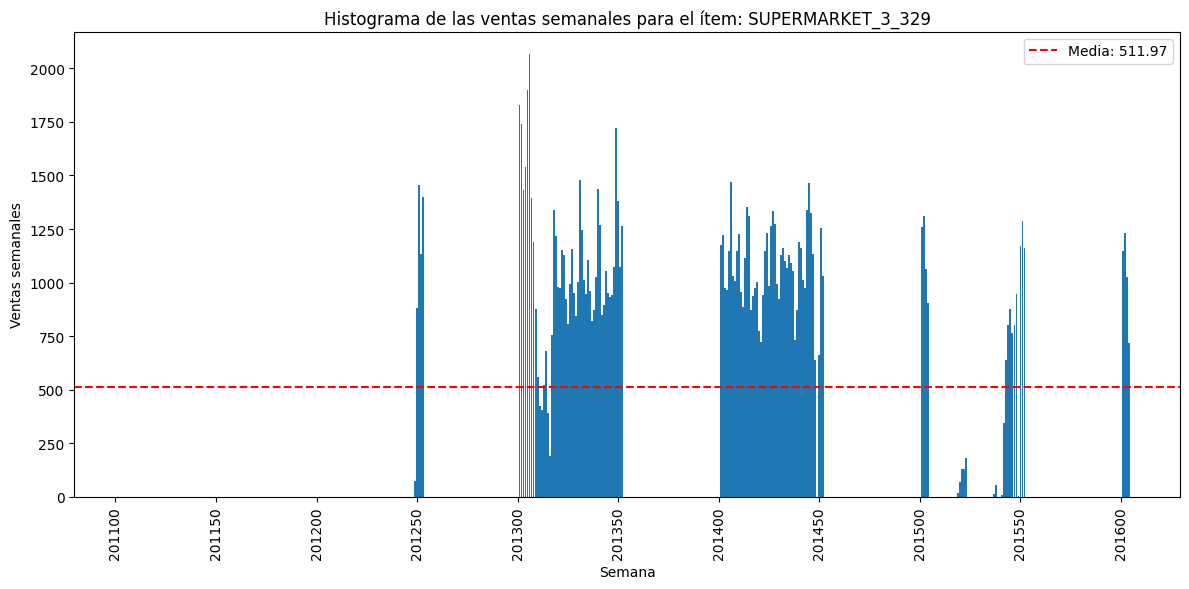

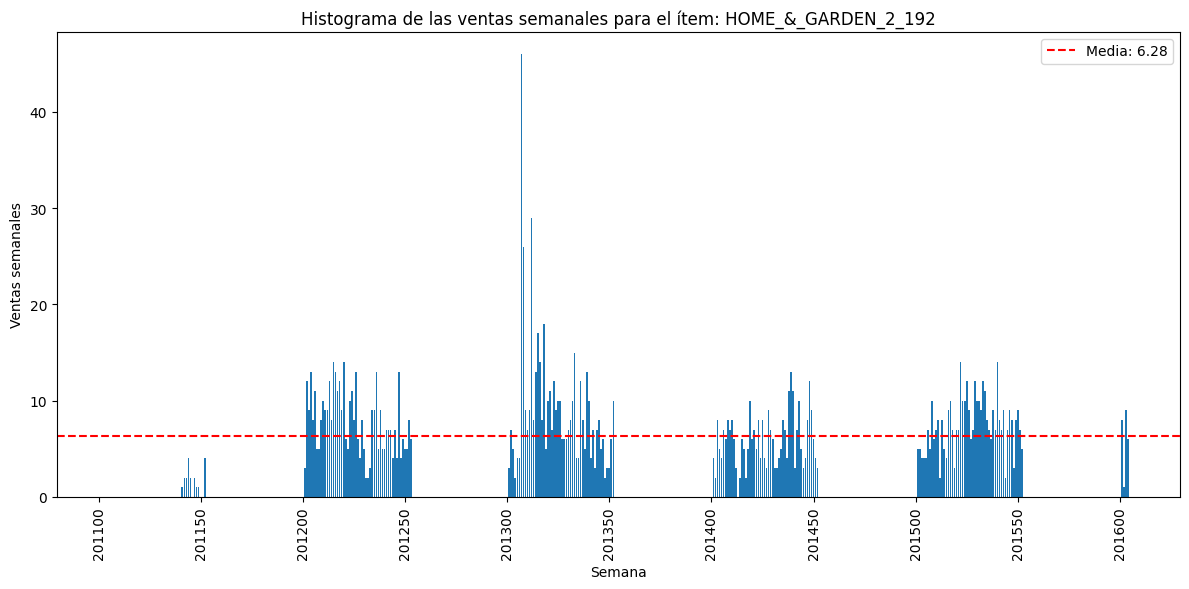

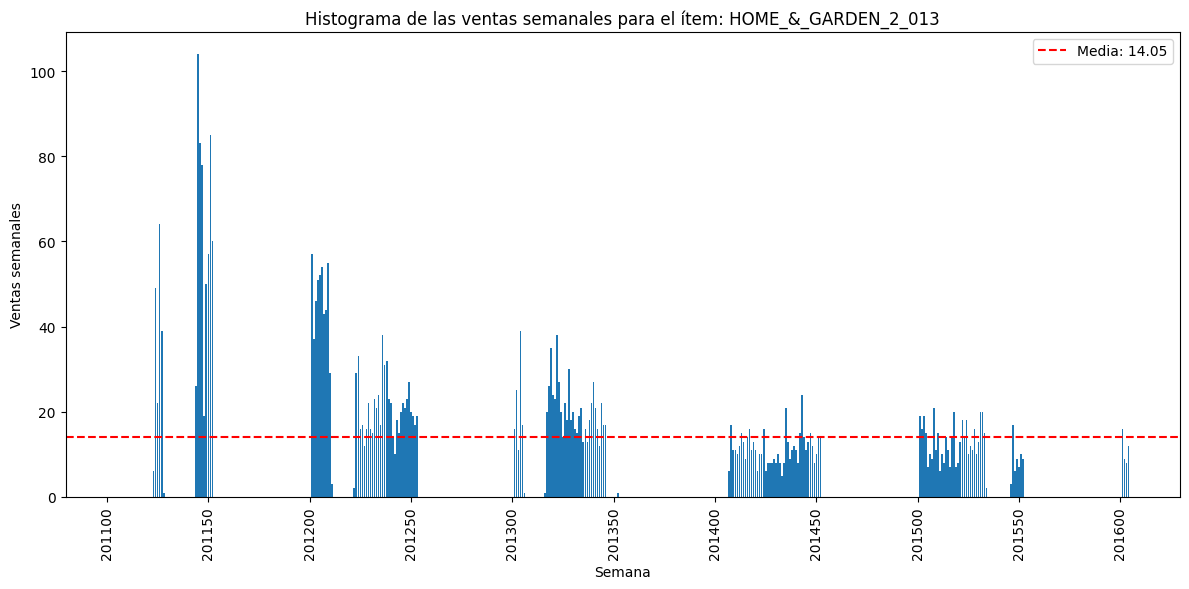

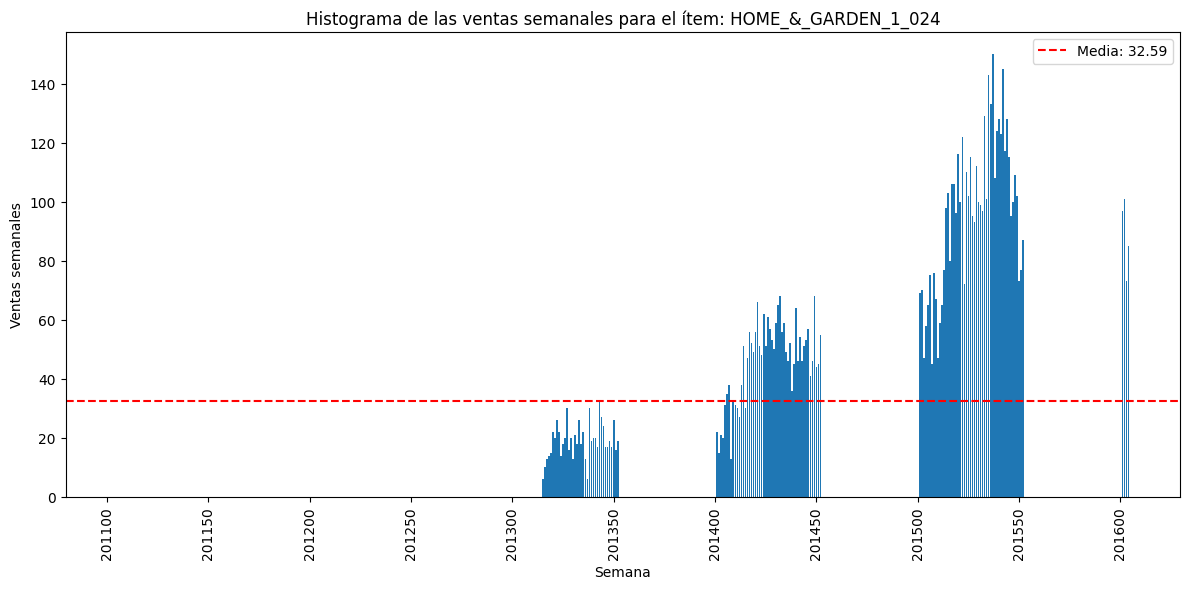

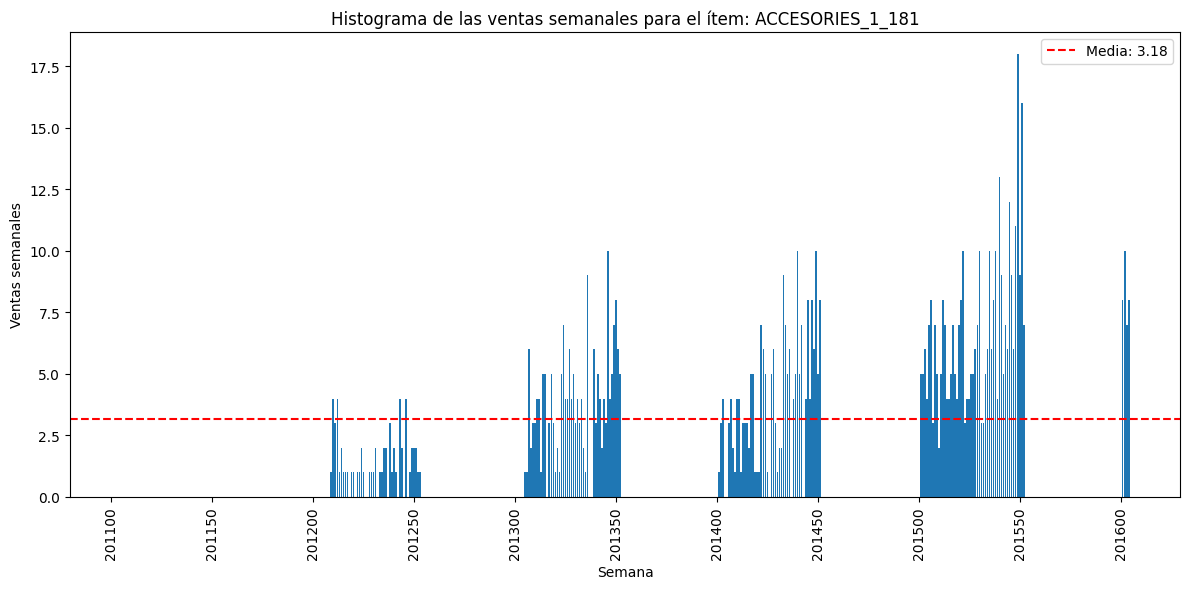

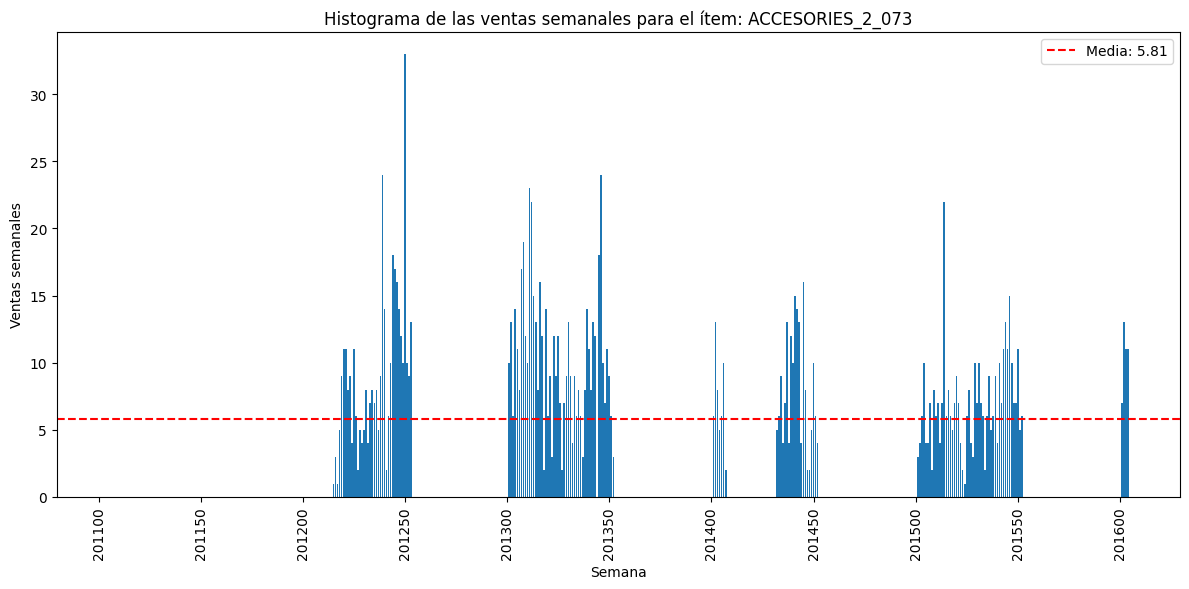

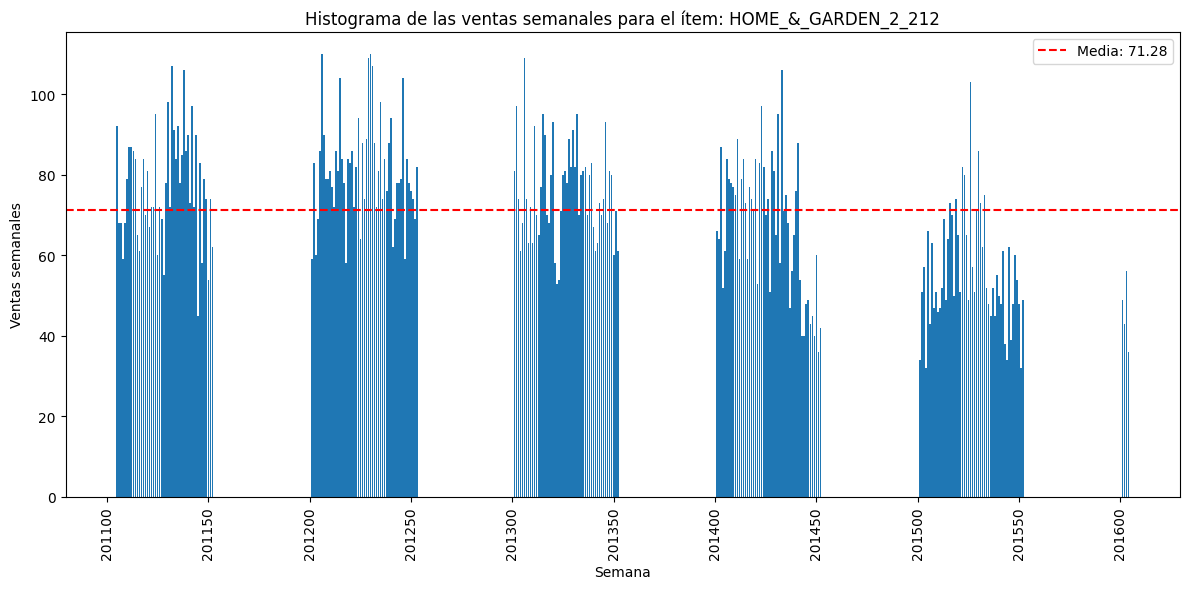

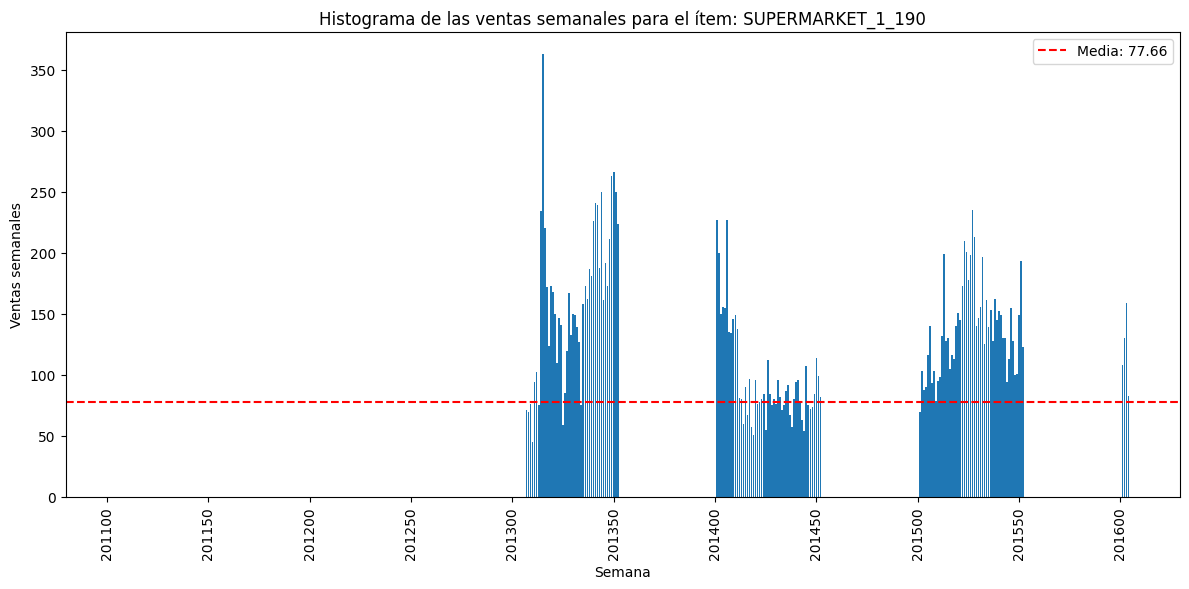

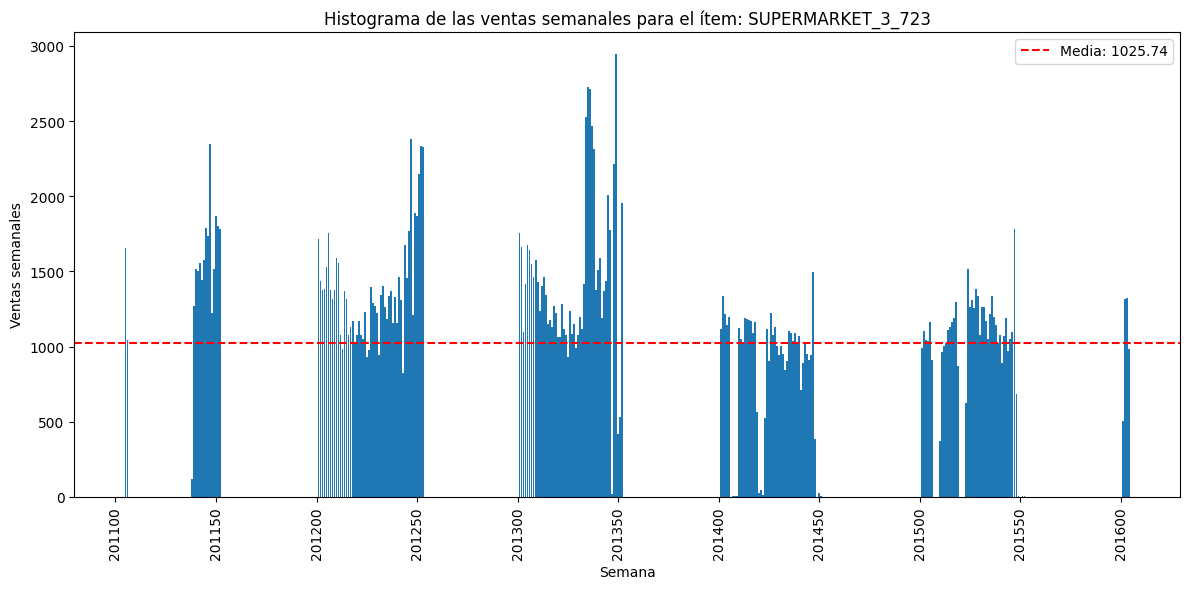

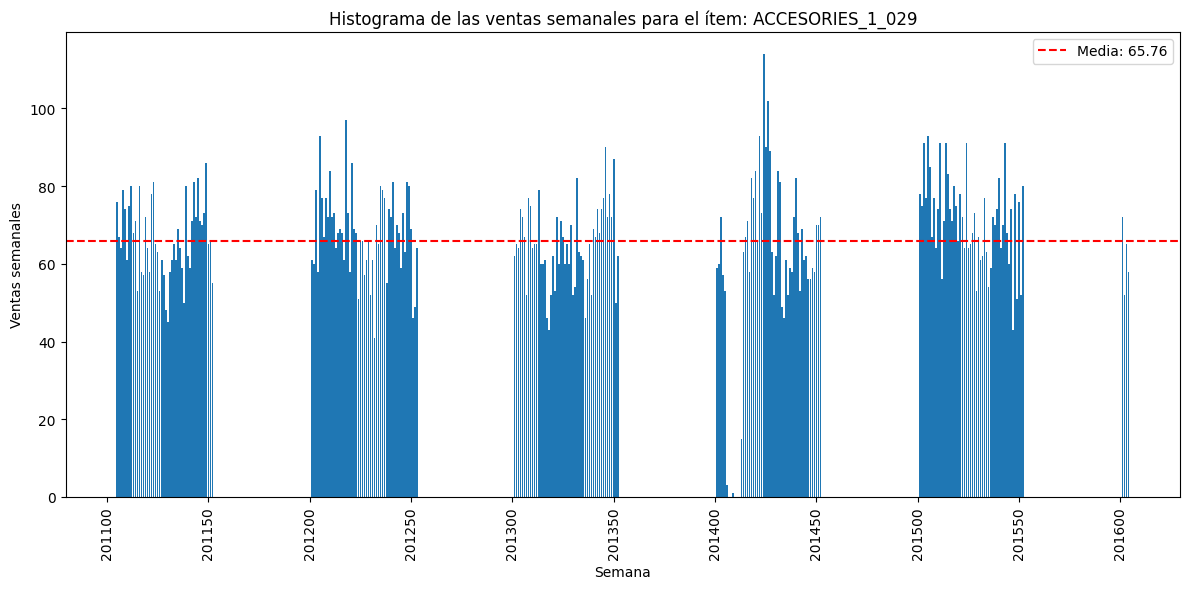

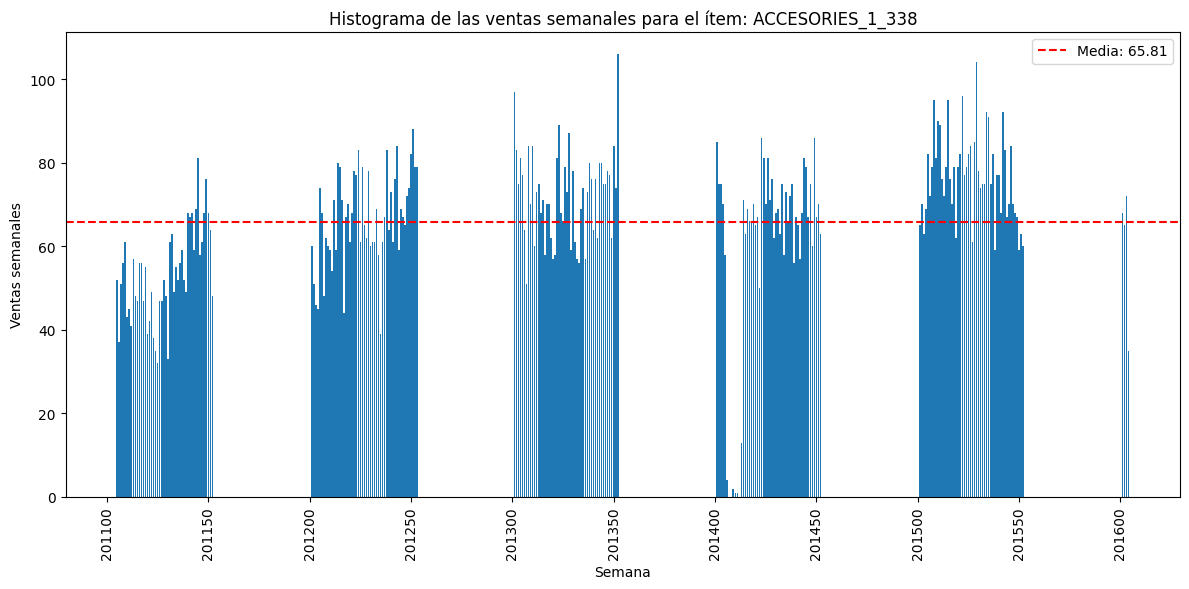

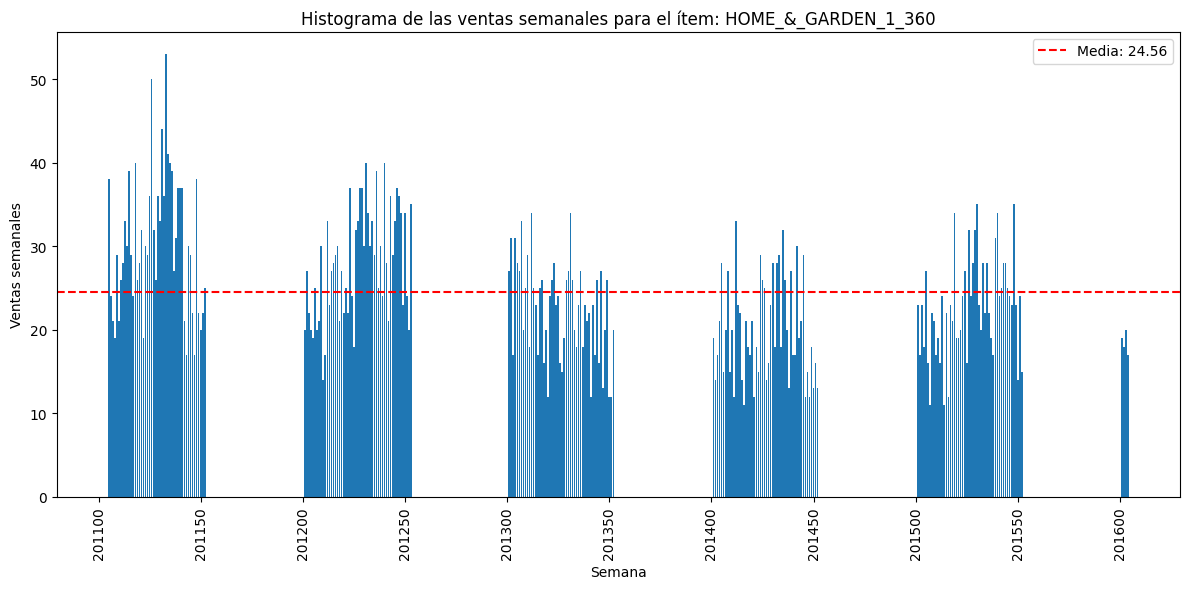

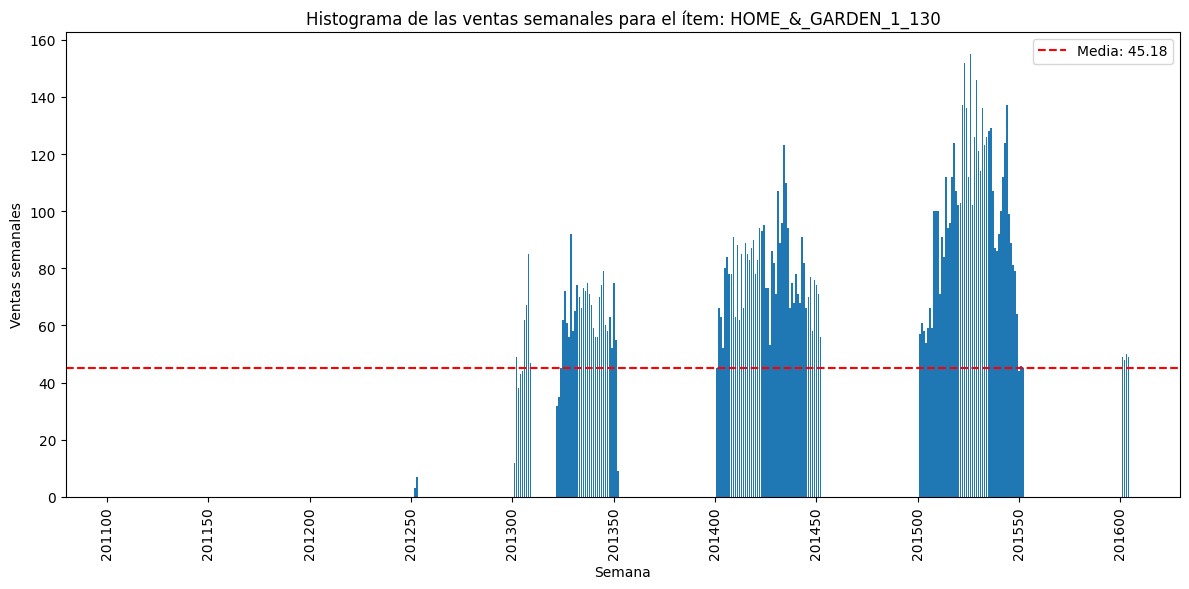

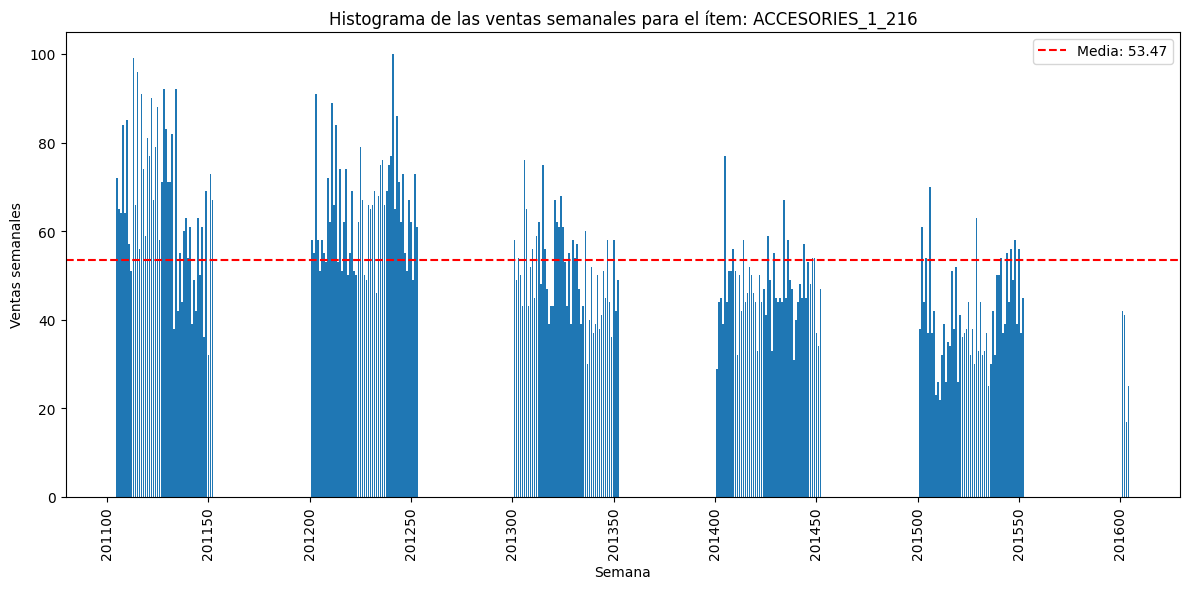

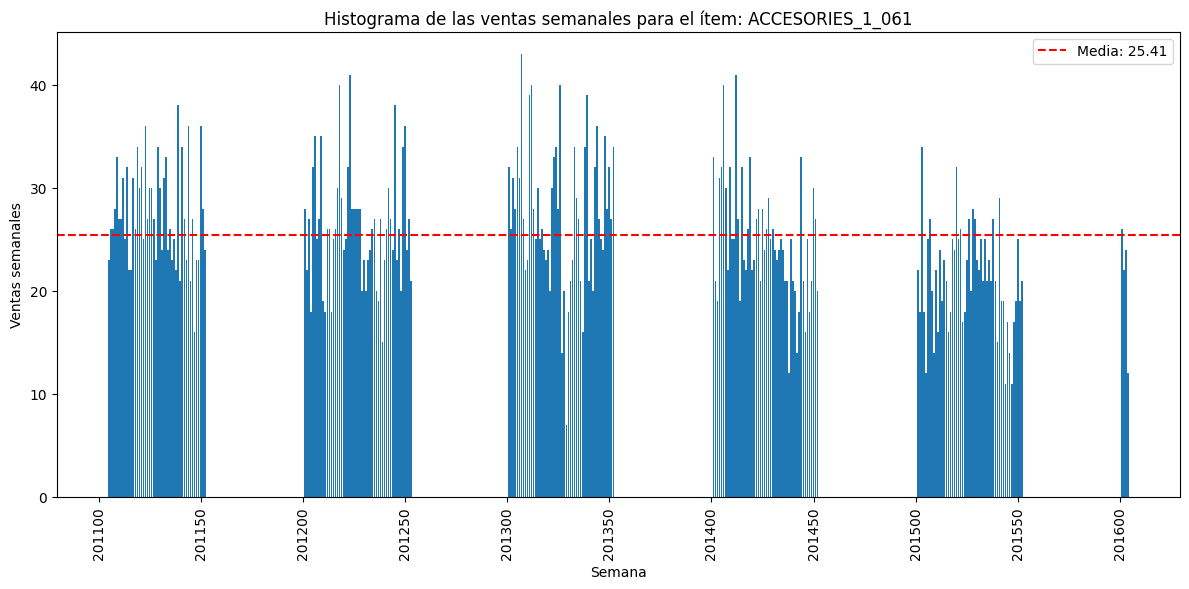

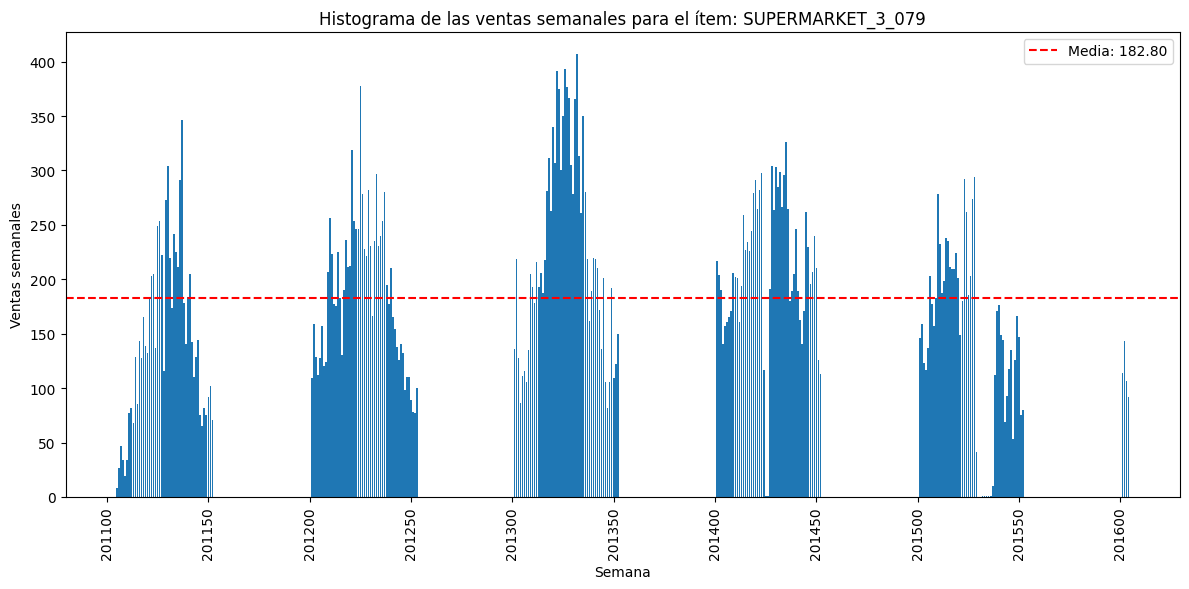

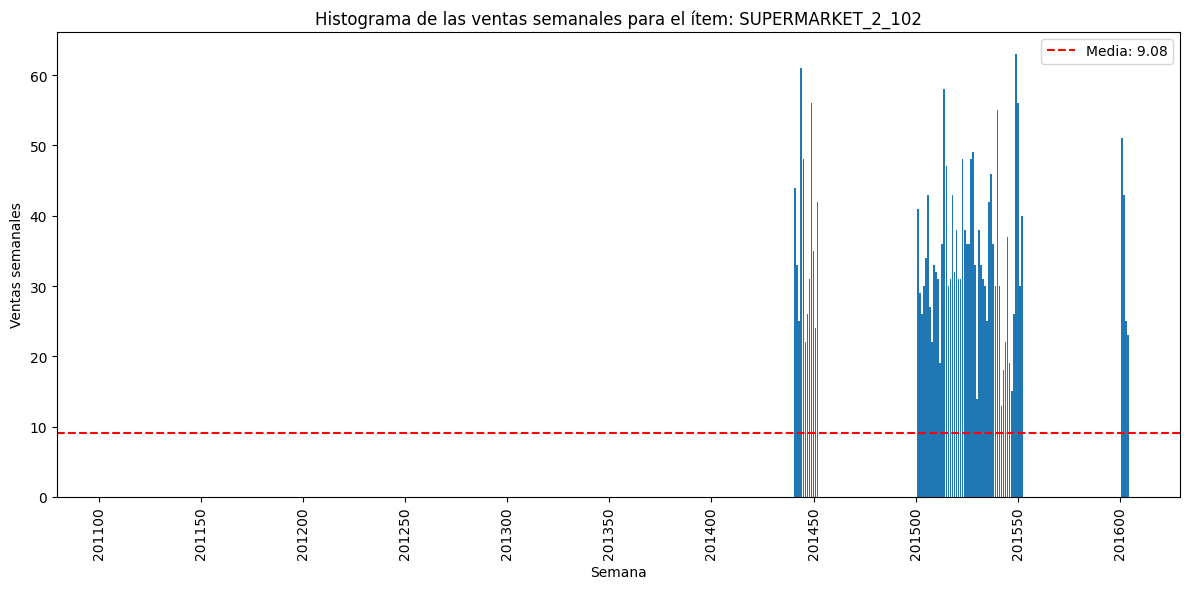

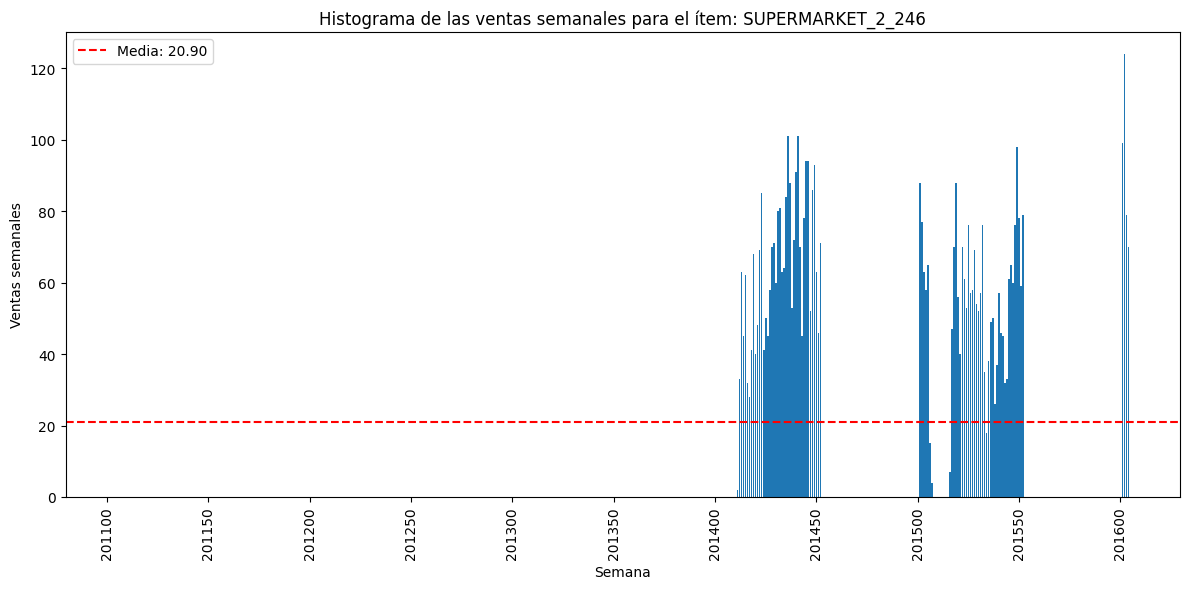

In [ ]:

for item in item_sample_list:
    plt.figure(figsize=(12, 6))  # Aumenta el tamaño del gráfico (ancho, alto)

    # Filtra los datos para el ítem actual y agrupa por yearweek
    data = df[df['item'] == item].groupby(['yearweek'])['units_sold'].sum()

    # Calcula la media de las ventas semanales
    media = data.mean()

    # Genera el histograma usando plt.bar()
    plt.bar(data.index, data.values)

    # Añade una línea horizontal que indica la media
    plt.axhline(y=media, color='red', linestyle='--', label=f'Media: {media:.2f}')

    # Añade un título y etiquetas a los ejes
    plt.title(f'Histograma de las ventas semanales para el ítem: {item}')
    plt.xlabel('Semana')
    plt.ylabel('Ventas semanales')

    # Añade una leyenda para la línea de la media
    plt.legend()

    # Modifica los ticks del eje x para mostrar todos los valores de yearweek
    plt.xticks(rotation=90)

    # Reduce el número de ticks si es necesario
    plt.locator_params(axis='x', nbins=20)

    # Ajusta automáticamente el espacio para evitar superposiciones de etiquetas
    plt.tight_layout()

    # Muestra el gráfico actual antes de pasar al siguiente
    plt.show()



## Hay dias en los cuales todas las tienda están cerradas?


In [ ]:
gbdf = df.groupby('date')['units_sold'].sum()

In [ ]:
gbdf.head()

date
2011-01-29    32631
2011-01-30    31749
2011-01-31    23783
2011-02-01    25412
2011-02-02    19146
Name: units_sold, dtype: int64

In [ ]:
gbdf[gbdf==0]

Series([], Name: units_sold, dtype: int64)

No hay ningun dia en el cual todas las tiendas esten contemporaneamente cerradas

# Nuevas Features por Implementar

1. Monetary value:
  - total_revenue
  - average_daily_revenue
  - average_weekly_revenue
  - average_monthly_revenue
  - max_daily_revenue
  - max_weekly_revenue
  - max_monthly_revenue
  - average_price
  - std_average_price (desviación estandar del precio medio, para caracterizar productos de temporada).
  - max_price_change (porcentaje de cambio  de precio respeto la semana anterior)
  - min_price_change
  - price_changes_in_a_year (numero de veces que el precio cambio en un año)
  - flag_high_price (si el precio del producto es más alto que la media de su departamento)
  - flag_high_sells (si la total_units_sold del producto es más alto que la media de su departamento)
  - flag_high_revenue (si el total_revenue del producto es más alto que la media de su departamento)
  - total_units_sold
2. Frequency and intensity (se vende cada dia? Una vez a la semana? Una vez al mes?)
  - average_daily_units_sold
  - average_weekly_units_sold
  - average_monthly_units_sold
  - average_trimestral_units_sold
  - max_daily_units_sold
  - min_daily_units_sold
  - max_weekly_units_sold
  - min_weekly_units_sold
  - max_monthly_units_sold
  - min_monthly_units_sold
  - max_days_from_last_sale
  - min_days_from_last_sale
  - days_from_last_sale_mean
  - flag_sells_every_month (True si el producto se vende cada mes)
3. Placement (el producto se vende todo el año o solo en determinadas fechas/temporadas? Se vende todo el año pero sus ventas suben mucho cerca de un evento? Cual es el dia de la semana en el que se vende más? Dias del mes en que se vende más? Mes del año en el que se vende más?)
  - flag_weekend (las ventas durate al menos un dia del fin de semana superan la media de la semana)
  - flag_half_week (las ventas durate al menos un dia entre miercoles y jueves superan la media de la semana)
  - flag_week_start (las ventas durate al menos un dia entre lunes y martes superan la media de la semana).
  - flag_month_start (las ventas durate al menos un dia entre los primeros 5 del mes superan la media mensual).
  - flag_half_month (las ventas durate al menos un dia entre los 5 dias centrales del mes, superan la media mensual).
  - flag_month_end (las ventas durate al menos un dia entre los ultimos 5 del mes, superan la media mensual).
  - flag_1st_trimester (las ventas durate el primer trimestre superan la media trimestral).
  - flag_2nd_trimester (las ventas durate el segundo trimestre superan la media trimestral).
  - flag_3rd_trimester (las ventas durate el tercer trimestre superan la media trimestral).
  - flag_4th_trimester (las ventas durate el cuarto trimestre superan la media trimestral).

  - Eventos: defino una feature por cada evento que indica si el item se vende màs cerca de ese evento, respeto al resto del año.
   Ejemplo: is_NewYear_product es True si las ventas en la semana de New Year superan el promedio de las 2 semanas anteriores.


# Creación de variables diarias

## Revenue


In [ ]:
df['revenue'] = df['units_sold'] * df['price_per_unit']

In [ ]:
df.sample(5,random_state=12)

item       category       department      d  \
1904826  HOME_&_GARDEN_1_488  HOME_&_GARDEN  HOME_&_GARDEN_1  d_309   
3784349    SUPERMARKET_2_246    SUPERMARKET    SUPERMARKET_2  d_878   
4661957    SUPERMARKET_3_329    SUPERMARKET    SUPERMARKET_3  d_180   
2350129  HOME_&_GARDEN_2_192  HOME_&_GARDEN  HOME_&_GARDEN_2   d_68   
2025657  HOME_&_GARDEN_2_013  HOME_&_GARDEN  HOME_&_GARDEN_2  d_624   

         units_sold       date    weekday  weekday_int     event  year  month  \
1904826           9 2011-12-03   Saturday            1  No_event  2011     12   
3784349           0 2013-06-24     Monday            3  No_event  2013      6   
4661957           0 2011-07-27  Wednesday            5  No_event  2011      7   
2350129           0 2011-04-06  Wednesday            5  No_event  2011      4   
2025657           0 2012-10-13   Saturday            1  No_event  2012     10   

         day  yearweek  price_per_unit    revenue  
1904826    3  201149.0       12.425929  111.83336  
3784349   24  201325.0        2.509324    0.00000  
4661957   27  201130.0        3.558094    0.00000  
2350129    6  201114.0        2.443081    0.00000  
2025657   13  201242.0        7.425000    0.00000

## Price change pct

In [ ]:
df.head(3)

item    category    department    d  units_sold       date  \
0  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1           0 2011-01-29   
1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_2           0 2011-01-30   
2  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_3           0 2011-01-31   

    weekday  weekday_int     event  year  month  day  yearweek  \
0  Saturday            1  No_event  2011      1   29  201105.0   
1    Sunday            2  No_event  2011      1   30  201105.0   
2    Monday            3  No_event  2011      1   31  201105.0   

   price_per_unit  revenue  
0        11.03282      0.0  
1        11.03282      0.0  
2        11.03282      0.0

In [ ]:
df['price_change_pct'] = df.groupby(['item'])['price_per_unit'].transform(lambda series: ((series - series.shift(1)) / series.shift(1))*100)

In [ ]:
df[df['item'].isin(['ACCESORIES_1_003'])]

item    category    department       d  units_sold  \
3652  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1     d_1           0   
3653  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1     d_2           0   
3654  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1     d_3           0   
3655  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1     d_4           0   
3656  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1     d_5           0   
...                ...         ...           ...     ...         ...   
5473  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1  d_1822           1   
5474  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1  d_1823           0   
5475  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1  d_1824           0   
5476  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1  d_1825           1   
5477  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1  d_1826           2   

           date    weekday  weekday_int     event  year  month  day  yearweek  \
3652 2011-01-29   Saturday            1  No_event  2011      1   29  201105.0   
3653 2011-01-30     Sunday            2  No_event  2011      1   30  201105.0   
3654 2011-01-31     Monday            3  No_event  2011      1   31  201105.0   
3655 2011-02-01    Tuesday            4  No_event  2011      2    1  201105.0   
3656 2011-02-02  Wednesday            5  No_event  2011      2    2  201105.0   
...         ...        ...          ...       ...   ...    ...  ...       ...   
5473 2016-01-24     Sunday            2  No_event  2016      1   24  201604.0   
5474 2016-01-25     Monday            3  No_event  2016      1   25  201604.0   
5475 2016-01-26    Tuesday            4  No_event  2016      1   26  201604.0   
5476 2016-01-27  Wednesday            5  No_event  2016      1   27  201604.0   
5477 2016-01-28   Thursday            6  No_event  2016      1   28  201604.0   

      price_per_unit  revenue  price_change_pct  
3652         3.94432   0.0000               NaN  
3653         3.94432   0.0000               0.0  
3654         3.94432   0.0000               0.0  
3655         3.94432   0.0000               0.0  
3656         3.94432   0.0000               0.0  
...              ...      ...               ...  
5473         3.95010   3.9501               0.0  
5474         3.95010   0.0000               0.0  
5475         3.95010   0.0000               0.0  
5476         3.95010   3.9501               0.0  
5477         3.95010   7.9002               0.0  

[1826 rows x 16 columns]

## Flag_price_change

In [ ]:
df['flag_price_change'] = df.groupby(['item'])['price_per_unit'].transform(lambda price_per_unit: price_per_unit != price_per_unit.shift(1))

In [ ]:
df[df['item'].isin(['ACCESORIES_1_003'])]['flag_price_change'].value_counts()

flag_price_change
False    1816
True       10
Name: count, dtype: int64

In [ ]:
df[df['item'].isin(['ACCESORIES_1_003'])]

item    category    department       d  units_sold  \
3652  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1     d_1           0   
3653  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1     d_2           0   
3654  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1     d_3           0   
3655  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1     d_4           0   
3656  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1     d_5           0   
...                ...         ...           ...     ...         ...   
5473  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1  d_1822           1   
5474  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1  d_1823           0   
5475  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1  d_1824           0   
5476  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1  d_1825           1   
5477  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1  d_1826           2   

           date    weekday  weekday_int     event  year  month  day  yearweek  \
3652 2011-01-29   Saturday            1  No_event  2011      1   29  201105.0   
3653 2011-01-30     Sunday            2  No_event  2011      1   30  201105.0   
3654 2011-01-31     Monday            3  No_event  2011      1   31  201105.0   
3655 2011-02-01    Tuesday            4  No_event  2011      2    1  201105.0   
3656 2011-02-02  Wednesday            5  No_event  2011      2    2  201105.0   
...         ...        ...          ...       ...   ...    ...  ...       ...   
5473 2016-01-24     Sunday            2  No_event  2016      1   24  201604.0   
5474 2016-01-25     Monday            3  No_event  2016      1   25  201604.0   
5475 2016-01-26    Tuesday            4  No_event  2016      1   26  201604.0   
5476 2016-01-27  Wednesday            5  No_event  2016      1   27  201604.0   
5477 2016-01-28   Thursday            6  No_event  2016      1   28  201604.0   

      price_per_unit  revenue  price_change_pct  flag_price_change  
3652         3.94432   0.0000               NaN               True  
3653         3.94432   0.0000               0.0              False  
3654         3.94432   0.0000               0.0              False  
3655         3.94432   0.0000               0.0              False  
3656         3.94432   0.0000               0.0              False  
...              ...      ...               ...                ...  
5473         3.95010   3.9501               0.0              False  
5474         3.95010   0.0000               0.0              False  
5475         3.95010   0.0000               0.0              False  
5476         3.95010   3.9501               0.0              False  
5477         3.95010   7.9002               0.0              False  

[1826 rows x 17 columns]

<Axes: >

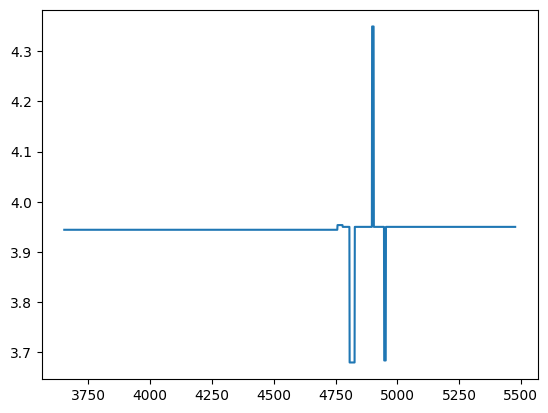

In [ ]:
df[df['item'].isin(['ACCESORIES_1_003'])]['price_per_unit'].plot()

<Axes: >

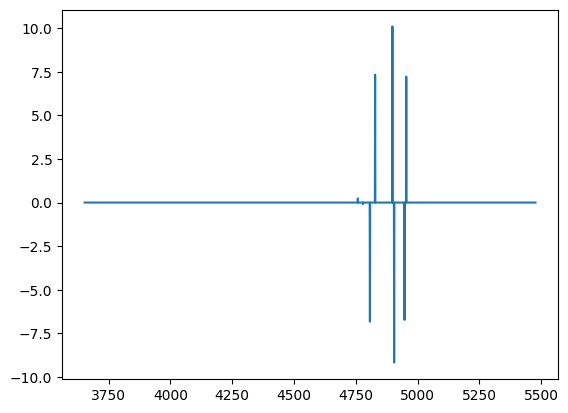

In [ ]:
df[df['item'].isin(['ACCESORIES_1_003'])]['price_change_pct'].plot()

Observación: el flag_price_change me devuelve True al principio de cada serie temporal porqué es la primera observación de la serie y su precio pasa de ser NaN a un valor concreto. Eso quiere decir que al calcular el numero de cambios de precios deberé restar 1.

## Revenue and Units_sold por mes y semana

In [ ]:
pd.reset_option("display.float_format")

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df

item     category     department       d  units_sold  \
0         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_1           0   
1         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_2           0   
2         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_3           0   
3         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_4           0   
4         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_5           0   
...                    ...          ...            ...     ...         ...   
5567469  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1822          32   
5567470  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1823          13   
5567471  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1824           7   
5567472  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1825          13   
5567473  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1826          20   

              date    weekday  weekday_int     event  year  month  day  \
0       2011-01-29   Saturday            1  No_event  2011      1   29   
1       2011-01-30     Sunday            2  No_event  2011      1   30   
2       2011-01-31     Monday            3  No_event  2011      1   31   
3       2011-02-01    Tuesday            4  No_event  2011      2    1   
4       2011-02-02  Wednesday            5  No_event  2011      2    2   
...            ...        ...          ...       ...   ...    ...  ...   
5567469 2016-01-24     Sunday            2  No_event  2016      1   24   
5567470 2016-01-25     Monday            3  No_event  2016      1   25   
5567471 2016-01-26    Tuesday            4  No_event  2016      1   26   
5567472 2016-01-27  Wednesday            5  No_event  2016      1   27   
5567473 2016-01-28   Thursday            6  No_event  2016      1   28   

         yearweek  price_per_unit  revenue  price_change_pct  \
0        201105.0        11.03282      0.0               NaN   
1        201105.0        11.03282      0.0               0.0   
2        201105.0        11.03282      0.0               0.0   
3        201105.0        11.03282      0.0               0.0   
4        201105.0        11.03282      0.0               0.0   
...           ...             ...      ...               ...   
5567469  201604.0         1.20000     38.4               0.0   
5567470  201604.0         1.20000     15.6               0.0   
5567471  201604.0         1.20000      8.4               0.0   
5567472  201604.0         1.20000     15.6               0.0   
5567473  201604.0         1.20000     24.0               0.0   

         flag_price_change  
0                     True  
1                    False  
2                    False  
3                    False  
4                    False  
...                    ...  
5567469              False  
5567470              False  
5567471              False  
5567472              False  
5567473              False  

[5567474 rows x 17 columns]

In [ ]:
df['week_units_sold'] = df.groupby(['item','yearweek'])['units_sold'].transform(np.sum)
df['week_revenue'] = df.groupby(['item','yearweek'])['revenue'].transform(np.sum)

In [ ]:
df

item     category     department       d  units_sold  \
0         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_1           0   
1         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_2           0   
2         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_3           0   
3         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_4           0   
4         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_5           0   
...                    ...          ...            ...     ...         ...   
5567469  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1822          32   
5567470  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1823          13   
5567471  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1824           7   
5567472  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1825          13   
5567473  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1826          20   

              date    weekday  weekday_int     event  year  month  day  \
0       2011-01-29   Saturday            1  No_event  2011      1   29   
1       2011-01-30     Sunday            2  No_event  2011      1   30   
2       2011-01-31     Monday            3  No_event  2011      1   31   
3       2011-02-01    Tuesday            4  No_event  2011      2    1   
4       2011-02-02  Wednesday            5  No_event  2011      2    2   
...            ...        ...          ...       ...   ...    ...  ...   
5567469 2016-01-24     Sunday            2  No_event  2016      1   24   
5567470 2016-01-25     Monday            3  No_event  2016      1   25   
5567471 2016-01-26    Tuesday            4  No_event  2016      1   26   
5567472 2016-01-27  Wednesday            5  No_event  2016      1   27   
5567473 2016-01-28   Thursday            6  No_event  2016      1   28   

         yearweek  price_per_unit  revenue  price_change_pct  \
0        201105.0        11.03282      0.0               NaN   
1        201105.0        11.03282      0.0               0.0   
2        201105.0        11.03282      0.0               0.0   
3        201105.0        11.03282      0.0               0.0   
4        201105.0        11.03282      0.0               0.0   
...           ...             ...      ...               ...   
5567469  201604.0         1.20000     38.4               0.0   
5567470  201604.0         1.20000     15.6               0.0   
5567471  201604.0         1.20000      8.4               0.0   
5567472  201604.0         1.20000     15.6               0.0   
5567473  201604.0         1.20000     24.0               0.0   

         flag_price_change  week_units_sold  week_revenue  
0                     True                0           0.0  
1                    False                0           0.0  
2                    False                0           0.0  
3                    False                0           0.0  
4                    False                0           0.0  
...                    ...              ...           ...  
5567469              False              111         133.2  
5567470              False              111         133.2  
5567471              False              111         133.2  
5567472              False              111         133.2  
5567473              False              111         133.2  

[5567474 rows x 19 columns]

In [ ]:
df['month_units_sold'] = df.groupby(['item','month'])['units_sold'].transform(np.sum)
df['month_revenue'] = df.groupby(['item','month'])['revenue'].transform(np.sum)

In [ ]:
df

item     category     department       d  units_sold  \
0         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_1           0   
1         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_2           0   
2         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_3           0   
3         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_4           0   
4         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_5           0   
...                    ...          ...            ...     ...         ...   
5567469  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1822          32   
5567470  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1823          13   
5567471  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1824           7   
5567472  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1825          13   
5567473  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1826          20   

              date    weekday  weekday_int     event  year  month  day  \
0       2011-01-29   Saturday            1  No_event  2011      1   29   
1       2011-01-30     Sunday            2  No_event  2011      1   30   
2       2011-01-31     Monday            3  No_event  2011      1   31   
3       2011-02-01    Tuesday            4  No_event  2011      2    1   
4       2011-02-02  Wednesday            5  No_event  2011      2    2   
...            ...        ...          ...       ...   ...    ...  ...   
5567469 2016-01-24     Sunday            2  No_event  2016      1   24   
5567470 2016-01-25     Monday            3  No_event  2016      1   25   
5567471 2016-01-26    Tuesday            4  No_event  2016      1   26   
5567472 2016-01-27  Wednesday            5  No_event  2016      1   27   
5567473 2016-01-28   Thursday            6  No_event  2016      1   28   

         yearweek  price_per_unit  revenue  price_change_pct  \
0        201105.0        11.03282      0.0               NaN   
1        201105.0        11.03282      0.0               0.0   
2        201105.0        11.03282      0.0               0.0   
3        201105.0        11.03282      0.0               0.0   
4        201105.0        11.03282      0.0               0.0   
...           ...             ...      ...               ...   
5567469  201604.0         1.20000     38.4               0.0   
5567470  201604.0         1.20000     15.6               0.0   
5567471  201604.0         1.20000      8.4               0.0   
5567472  201604.0         1.20000     15.6               0.0   
5567473  201604.0         1.20000     24.0               0.0   

         flag_price_change  week_units_sold  week_revenue  month_units_sold  \
0                     True                0           0.0               362   
1                    False                0           0.0               362   
2                    False                0           0.0               362   
3                    False                0           0.0               214   
4                    False                0           0.0               214   
...                    ...              ...           ...               ...   
5567469              False              111         133.2               934   
5567470              False              111         133.2               934   
5567471              False              111         133.2               934   
5567472              False              111         133.2               934   
5567473              False              111         133.2               934   

         month_revenue  
0           3987.52088  
1           3987.52088  
2           3987.52088  
3           2359.16464  
4           2359.16464  
...                ...  
5567469     1120.80000  
5567470     1120.80000  
5567471     1120.80000  
5567472     1120.80000  
5567473     1120.80000  

[5567474 rows x 21 columns]

## Units sold por trimestre

In [ ]:
df.head()

item    category    department    d  units_sold       date  \
0  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1           0 2011-01-29   
1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_2           0 2011-01-30   
2  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_3           0 2011-01-31   
3  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_4           0 2011-02-01   
4  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_5           0 2011-02-02   

     weekday  weekday_int     event  year  month  day  yearweek  \
0   Saturday            1  No_event  2011      1   29  201105.0   
1     Sunday            2  No_event  2011      1   30  201105.0   
2     Monday            3  No_event  2011      1   31  201105.0   
3    Tuesday            4  No_event  2011      2    1  201105.0   
4  Wednesday            5  No_event  2011      2    2  201105.0   

   price_per_unit  revenue  price_change_pct  flag_price_change  \
0        11.03282      0.0               NaN               True   
1        11.03282      0.0               0.0              False   
2        11.03282      0.0               0.0              False   
3        11.03282      0.0               0.0              False   
4        11.03282      0.0               0.0              False   

   week_units_sold  week_revenue  month_units_sold  month_revenue  
0                0           0.0               362     3987.52088  
1                0           0.0               362     3987.52088  
2                0           0.0               362     3987.52088  
3                0           0.0               214     2359.16464  
4                0           0.0               214     2359.16464

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567474 entries, 0 to 5567473
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   item               object        
 1   category           object        
 2   department         object        
 3   d                  object        
 4   units_sold         int64         
 5   date               datetime64[ns]
 6   weekday            object        
 7   weekday_int        int64         
 8   event              object        
 9   year               int64         
 10  month              int64         
 11  day                int64         
 12  yearweek           float64       
 13  price_per_unit     float64       
 14  revenue            float64       
 15  price_change_pct   float64       
 16  flag_price_change  bool          
 17  week_units_sold    int64         
 18  week_revenue       float64       
 19  month_units_sold   int64         
 20  month_revenue      float

In [ ]:
# añado la feature quarter para indicar el trimestre
quarter = df['date'].dt.quarter
df.insert(17,column='quarter',value = quarter)

In [ ]:
df.head(10)

item    category    department     d  units_sold       date  \
0  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_1           0 2011-01-29   
1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_2           0 2011-01-30   
2  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_3           0 2011-01-31   
3  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_4           0 2011-02-01   
4  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_5           0 2011-02-02   
5  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_6           0 2011-02-03   
6  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_7           0 2011-02-04   
7  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_8           0 2011-02-05   
8  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_9           0 2011-02-06   
9  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_10           0 2011-02-07   

     weekday  weekday_int       event  year  month  day  yearweek  \
0   Saturday            1    No_event  2011      1   29  201105.0   
1     Sunday            2    No_event  2011      1   30  201105.0   
2     Monday            3    No_event  2011      1   31  201105.0   
3    Tuesday            4    No_event  2011      2    1  201105.0   
4  Wednesday            5    No_event  2011      2    2  201105.0   
5   Thursday            6    No_event  2011      2    3  201105.0   
6     Friday            7    No_event  2011      2    4  201105.0   
7   Saturday            1    No_event  2011      2    5  201106.0   
8     Sunday            2  Super_Bowl  2011      2    6  201106.0   
9     Monday            3    No_event  2011      2    7  201106.0   

   price_per_unit  revenue  price_change_pct  flag_price_change  quarter  \
0        11.03282      0.0               NaN               True        1   
1        11.03282      0.0               0.0              False        1   
2        11.03282      0.0               0.0              False        1   
3        11.03282      0.0               0.0              False        1   
4        11.03282      0.0               0.0              False        1   
5        11.03282      0.0               0.0              False        1   
6        11.03282      0.0               0.0              False        1   
7        11.03282      0.0               0.0              False        1   
8        11.03282      0.0               0.0              False        1   
9        11.03282      0.0               0.0              False        1   

   week_units_sold  week_revenue  month_units_sold  month_revenue  
0                0           0.0               362     3987.52088  
1                0           0.0               362     3987.52088  
2                0           0.0               362     3987.52088  
3                0           0.0               214     2359.16464  
4                0           0.0               214     2359.16464  
5                0           0.0               214     2359.16464  
6                0           0.0               214     2359.16464  
7                0           0.0               214     2359.16464  
8                0           0.0               214     2359.16464  
9                0           0.0               214     2359.16464

In [ ]:
df['quarter_units_sold'] = df.groupby(['item','quarter'])['units_sold'].transform(np.sum)

In [ ]:
df.head()

item    category    department    d  units_sold       date  \
0  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1           0 2011-01-29   
1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_2           0 2011-01-30   
2  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_3           0 2011-01-31   
3  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_4           0 2011-02-01   
4  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_5           0 2011-02-02   

     weekday  weekday_int     event  year  month  day  yearweek  \
0   Saturday            1  No_event  2011      1   29  201105.0   
1     Sunday            2  No_event  2011      1   30  201105.0   
2     Monday            3  No_event  2011      1   31  201105.0   
3    Tuesday            4  No_event  2011      2    1  201105.0   
4  Wednesday            5  No_event  2011      2    2  201105.0   

   price_per_unit  revenue  price_change_pct  flag_price_change  quarter  \
0        11.03282      0.0               NaN               True        1   
1        11.03282      0.0               0.0              False        1   
2        11.03282      0.0               0.0              False        1   
3        11.03282      0.0               0.0              False        1   
4        11.03282      0.0               0.0              False        1   

   week_units_sold  week_revenue  month_units_sold  month_revenue  \
0                0           0.0               362     3987.52088   
1                0           0.0               362     3987.52088   
2                0           0.0               362     3987.52088   
3                0           0.0               214     2359.16464   
4                0           0.0               214     2359.16464   

   quarter_units_sold  
0                 811  
1                 811  
2                 811  
3                 811  
4                 811

## Estudio calculo de la venta durante los dias de la semana

In [ ]:
df.head()

item    category    department    d  units_sold       date  \
0  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1           0 2011-01-29   
1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_2           0 2011-01-30   
2  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_3           0 2011-01-31   
3  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_4           0 2011-02-01   
4  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_5           0 2011-02-02   

     weekday  weekday_int     event  year  month  day  yearweek  \
0   Saturday            1  No_event  2011      1   29  201105.0   
1     Sunday            2  No_event  2011      1   30  201105.0   
2     Monday            3  No_event  2011      1   31  201105.0   
3    Tuesday            4  No_event  2011      2    1  201105.0   
4  Wednesday            5  No_event  2011      2    2  201105.0   

   price_per_unit  revenue  price_change_pct  flag_price_change  quarter  \
0        11.03282      0.0               NaN               True        1   
1        11.03282      0.0               0.0              False        1   
2        11.03282      0.0               0.0              False        1   
3        11.03282      0.0               0.0              False        1   
4        11.03282      0.0               0.0              False        1   

   week_units_sold  week_revenue  month_units_sold  month_revenue  \
0                0           0.0               362     3987.52088   
1                0           0.0               362     3987.52088   
2                0           0.0               362     3987.52088   
3                0           0.0               214     2359.16464   
4                0           0.0               214     2359.16464   

   quarter_units_sold  
0                 811  
1                 811  
2                 811  
3                 811  
4                 811

In [ ]:
df1 = df[df['item']=='ACCESORIES_1_001']

In [ ]:
df1.head()

item    category    department    d  units_sold       date  \
0  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1           0 2011-01-29   
1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_2           0 2011-01-30   
2  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_3           0 2011-01-31   
3  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_4           0 2011-02-01   
4  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_5           0 2011-02-02   

     weekday  weekday_int     event  year  month  day  yearweek  \
0   Saturday            1  No_event  2011      1   29  201105.0   
1     Sunday            2  No_event  2011      1   30  201105.0   
2     Monday            3  No_event  2011      1   31  201105.0   
3    Tuesday            4  No_event  2011      2    1  201105.0   
4  Wednesday            5  No_event  2011      2    2  201105.0   

   price_per_unit  revenue  price_change_pct  flag_price_change  quarter  \
0        11.03282      0.0               NaN               True        1   
1        11.03282      0.0               0.0              False        1   
2        11.03282      0.0               0.0              False        1   
3        11.03282      0.0               0.0              False        1   
4        11.03282      0.0               0.0              False        1   

   week_units_sold  week_revenue  month_units_sold  month_revenue  \
0                0           0.0               362     3987.52088   
1                0           0.0               362     3987.52088   
2                0           0.0               362     3987.52088   
3                0           0.0               214     2359.16464   
4                0           0.0               214     2359.16464   

   quarter_units_sold  
0                 811  
1                 811  
2                 811  
3                 811  
4                 811

In [ ]:
df1['week_units_sold'].mean().round(2)

13.86

In [ ]:
item_list = ['ACCESORIES_1_001','ACCESORIES_1_267']

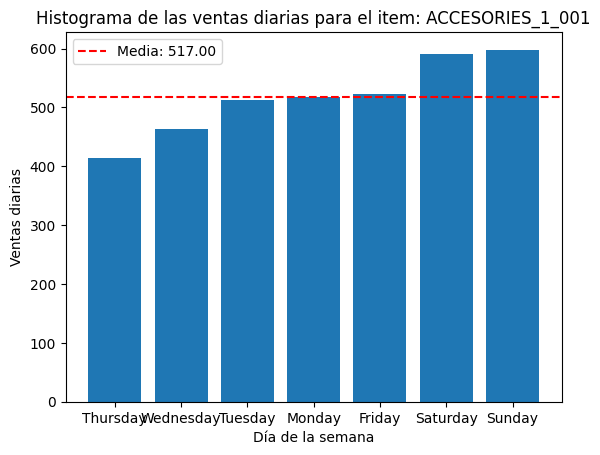

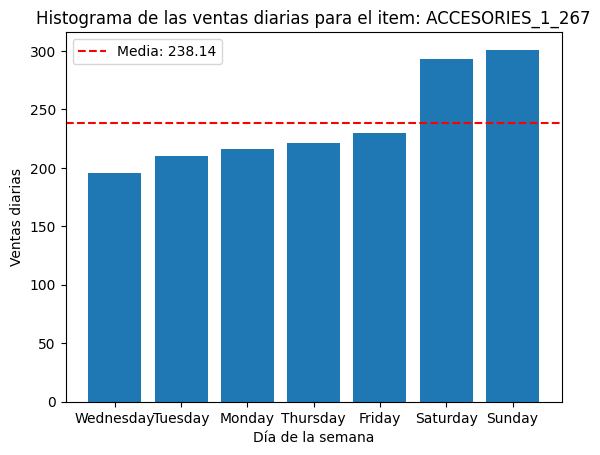

In [ ]:
for item in item_list:
    plt.figure()  # Crea una nueva figura para cada item

    # Agrupa y suma las ventas diarias por día de la semana
    data = df[df['item'] == item].groupby('weekday')['units_sold'].sum().sort_values()

    # Calcula la media de las ventas diarias
    media = data.mean()

    # Genera el histograma usando plt.bar()
    plt.bar(data.index, data.values)

    # Añade una línea horizontal que indica la media
    plt.axhline(y=media, color='red', linestyle='--', label=f'Media: {media:.2f}')

    # Añade un título y etiquetas a los ejes
    plt.title(f'Histograma de las ventas diarias para el item: {item}')
    plt.xlabel('Día de la semana')
    plt.ylabel('Ventas diarias')

    # Añade una leyenda para la línea de la media
    plt.legend()

    # Muestra el gráfico actual antes de pasar al siguiente
    plt.show()


In [ ]:
df1['units_sold'].mean()

1.9819277108433735

In [ ]:
(df1['units_sold'].sum()/7).round(2)

517.0

## days_since_last_sale

In [ ]:
# Creo la columna 'sold' como auxiliar
df['sold'] = df['units_sold'] > 0
df

item     category     department       d  units_sold  \
0         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_1           0   
1         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_2           0   
2         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_3           0   
3         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_4           0   
4         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_5           0   
...                    ...          ...            ...     ...         ...   
5567469  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1822          32   
5567470  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1823          13   
5567471  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1824           7   
5567472  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1825          13   
5567473  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1826          20   

              date    weekday  weekday_int     event  year  month  day  \
0       2011-01-29   Saturday            1  No_event  2011      1   29   
1       2011-01-30     Sunday            2  No_event  2011      1   30   
2       2011-01-31     Monday            3  No_event  2011      1   31   
3       2011-02-01    Tuesday            4  No_event  2011      2    1   
4       2011-02-02  Wednesday            5  No_event  2011      2    2   
...            ...        ...          ...       ...   ...    ...  ...   
5567469 2016-01-24     Sunday            2  No_event  2016      1   24   
5567470 2016-01-25     Monday            3  No_event  2016      1   25   
5567471 2016-01-26    Tuesday            4  No_event  2016      1   26   
5567472 2016-01-27  Wednesday            5  No_event  2016      1   27   
5567473 2016-01-28   Thursday            6  No_event  2016      1   28   

         yearweek  price_per_unit  revenue  price_change_pct  \
0        201105.0        11.03282      0.0               NaN   
1        201105.0        11.03282      0.0               0.0   
2        201105.0        11.03282      0.0               0.0   
3        201105.0        11.03282      0.0               0.0   
4        201105.0        11.03282      0.0               0.0   
...           ...             ...      ...               ...   
5567469  201604.0         1.20000     38.4               0.0   
5567470  201604.0         1.20000     15.6               0.0   
5567471  201604.0         1.20000      8.4               0.0   
5567472  201604.0         1.20000     15.6               0.0   
5567473  201604.0         1.20000     24.0               0.0   

         flag_price_change  quarter  week_units_sold  week_revenue  \
0                     True        1                0           0.0   
1                    False        1                0           0.0   
2                    False        1                0           0.0   
3                    False        1                0           0.0   
4                    False        1                0           0.0   
...                    ...      ...              ...           ...   
5567469              False        1              111         133.2   
5567470              False        1              111         133.2   
5567471              False        1              111         133.2   
5567472              False        1              111         133.2   
5567473              False        1              111         133.2   

         month_units_sold  month_revenue  quarter_units_sold   sold  
0                     362     3987.52088                 811  False  
1                     362     3987.52088                 811  False  
2                     362     3987.52088                 811  False  
3                     214     2359.16464                 811  False  
4                     214     2359.16464                 811  False  
...                   ...            ...                 ...    ...  
5567469               934     1120.80000                1812   True  
5567470               934 

In [ ]:
# Filtrar solo las filas donde units_sold > 0
df_sales = df[df['sold']].copy()


# Calcular la diferencia en días desde la última compra
df_sales['days_since_last_sale'] = df_sales.groupby('item')['date'].diff().dt.days

# Hacer un merge con el DataFrame original para añadir la nueva columna
df = df.merge(df_sales[['item', 'date', 'days_since_last_sale']],
              on=['item', 'date'],
              how='left')


In [ ]:
df

item     category     department       d  units_sold  \
0         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_1           0   
1         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_2           0   
2         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_3           0   
3         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_4           0   
4         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_5           0   
...                    ...          ...            ...     ...         ...   
5567469  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1822          32   
5567470  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1823          13   
5567471  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1824           7   
5567472  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1825          13   
5567473  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1826          20   

              date    weekday  weekday_int     event  year  month  day  \
0       2011-01-29   Saturday            1  No_event  2011      1   29   
1       2011-01-30     Sunday            2  No_event  2011      1   30   
2       2011-01-31     Monday            3  No_event  2011      1   31   
3       2011-02-01    Tuesday            4  No_event  2011      2    1   
4       2011-02-02  Wednesday            5  No_event  2011      2    2   
...            ...        ...          ...       ...   ...    ...  ...   
5567469 2016-01-24     Sunday            2  No_event  2016      1   24   
5567470 2016-01-25     Monday            3  No_event  2016      1   25   
5567471 2016-01-26    Tuesday            4  No_event  2016      1   26   
5567472 2016-01-27  Wednesday            5  No_event  2016      1   27   
5567473 2016-01-28   Thursday            6  No_event  2016      1   28   

         yearweek  price_per_unit  revenue  price_change_pct  \
0        201105.0        11.03282      0.0               NaN   
1        201105.0        11.03282      0.0               0.0   
2        201105.0        11.03282      0.0               0.0   
3        201105.0        11.03282      0.0               0.0   
4        201105.0        11.03282      0.0               0.0   
...           ...             ...      ...               ...   
5567469  201604.0         1.20000     38.4               0.0   
5567470  201604.0         1.20000     15.6               0.0   
5567471  201604.0         1.20000      8.4               0.0   
5567472  201604.0         1.20000     15.6               0.0   
5567473  201604.0         1.20000     24.0               0.0   

         flag_price_change  quarter  week_units_sold  week_revenue  \
0                     True        1                0           0.0   
1                    False        1                0           0.0   
2                    False        1                0           0.0   
3                    False        1                0           0.0   
4                    False        1                0           0.0   
...                    ...      ...              ...           ...   
5567469              False        1              111         133.2   
5567470              False        1              111         133.2   
5567471              False        1              111         133.2   
5567472              False        1              111         133.2   
5567473              False        1              111         133.2   

         month_units_sold  month_revenue  quarter_units_sold   sold  \
0                     362     3987.52088                 811  False   
1                     362     3987.52088                 811  False   
2                     362     3987.52088                 811  False   
3                     214     2359.16464                 811  False   
4                     214     2359.16464                 811  False   
...                   ...            ...                 ...    ...   
5567469               934     1120.80000                1812   True   
5567470           

# Creación de variables agregadas de producto

In [ ]:
df

item     category     department       d  units_sold  \
0         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_1           0   
1         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_2           0   
2         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_3           0   
3         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_4           0   
4         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_5           0   
...                    ...          ...            ...     ...         ...   
5567469  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1822          32   
5567470  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1823          13   
5567471  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1824           7   
5567472  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1825          13   
5567473  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1826          20   

              date    weekday  weekday_int     event  year  month  day  \
0       2011-01-29   Saturday            1  No_event  2011      1   29   
1       2011-01-30     Sunday            2  No_event  2011      1   30   
2       2011-01-31     Monday            3  No_event  2011      1   31   
3       2011-02-01    Tuesday            4  No_event  2011      2    1   
4       2011-02-02  Wednesday            5  No_event  2011      2    2   
...            ...        ...          ...       ...   ...    ...  ...   
5567469 2016-01-24     Sunday            2  No_event  2016      1   24   
5567470 2016-01-25     Monday            3  No_event  2016      1   25   
5567471 2016-01-26    Tuesday            4  No_event  2016      1   26   
5567472 2016-01-27  Wednesday            5  No_event  2016      1   27   
5567473 2016-01-28   Thursday            6  No_event  2016      1   28   

         yearweek  price_per_unit  revenue  price_change_pct  \
0        201105.0        11.03282      0.0               NaN   
1        201105.0        11.03282      0.0               0.0   
2        201105.0        11.03282      0.0               0.0   
3        201105.0        11.03282      0.0               0.0   
4        201105.0        11.03282      0.0               0.0   
...           ...             ...      ...               ...   
5567469  201604.0         1.20000     38.4               0.0   
5567470  201604.0         1.20000     15.6               0.0   
5567471  201604.0         1.20000      8.4               0.0   
5567472  201604.0         1.20000     15.6               0.0   
5567473  201604.0         1.20000     24.0               0.0   

         flag_price_change  quarter  week_units_sold  week_revenue  \
0                     True        1                0           0.0   
1                    False        1                0           0.0   
2                    False        1                0           0.0   
3                    False        1                0           0.0   
4                    False        1                0           0.0   
...                    ...      ...              ...           ...   
5567469              False        1              111         133.2   
5567470              False        1              111         133.2   
5567471              False        1              111         133.2   
5567472              False        1              111         133.2   
5567473              False        1              111         133.2   

         month_units_sold  month_revenue  quarter_units_sold   sold  \
0                     362     3987.52088                 811  False   
1                     362     3987.52088                 811  False   
2                     362     3987.52088                 811  False   
3                     214     2359.16464                 811  False   
4                     214     2359.16464                 811  False   
...                   ...            ...                 ...    ...   
5567469               934     1120.80000                1812   True   
5567470           

In [ ]:
products_df = df.groupby(['item']).agg(
    # Generic
    category = ('category', max),
    department = ('department', max),

    # Quantity
    total_units_sold= ('units_sold', sum),
    average_daily_units_sold = ('units_sold',np.mean),
    average_weekly_units_sold = ('week_units_sold',np.mean),  # creo se pueda eliminar
    average_monthly_units_sold = ('month_units_sold',np.mean), # creo se pueda eliminar
    average_quarter_units_sold = ('quarter_units_sold',np.mean), # creo se pueda eliminar
    max_daily_units_sold = ('units_sold', max),
    min_daily_units_sold = ('units_sold', min),
    max_weekly_units_sold = ('week_units_sold', max),
    min_weekly_units_sold = ('week_units_sold', min),
    max_monthly_units_sold = ('month_units_sold', max),
    min_monthly_units_sold = ('month_units_sold', min),


    # Price and Revenue (Monetary Value)
    total_revenue = ('revenue',sum),
    average_price_per_unit = ('price_per_unit',np.mean),
    average_daily_revenue = ('revenue',np.mean),
    average_weekly_revenue = ('week_revenue',np.mean),
    average_monthly_revenue = ('month_revenue',np.mean),
    max_daily_revenue = ('revenue', max),
    max_weekly_revenue = ('week_revenue', max),
    max_monthly_revenue = ('month_revenue', max),
    std_price_per_unit = ('price_per_unit',np.std),
    max_price_change_pct = ('price_change_pct', max),
    min_price_change_pct = ('price_change_pct', min),
    price_changes = ('flag_price_change', lambda series: series.sum() -1),

    #Frequency
    days_since_last_sale_mean = ('days_since_last_sale', 'mean'),
    days_since_last_sale_max = ('days_since_last_sale', 'max'),
    days_since_last_sale_min = ('days_since_last_sale', 'min'),
    days_since_last_sale_var = ('days_since_last_sale', 'var'),
    daily_units_sold_var = ('units_sold', 'var'),



    )

In [ ]:
products_df.reset_index(inplace=True)

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   item                        3049 non-null   object 
 1   category                    3049 non-null   object 
 2   department                  3049 non-null   object 
 3   total_units_sold            3049 non-null   int64  
 4   average_daily_units_sold    3049 non-null   float64
 5   average_weekly_units_sold   3049 non-null   float64
 6   average_monthly_units_sold  3049 non-null   float64
 7   average_quarter_units_sold  3049 non-null   float64
 8   max_daily_units_sold        3049 non-null   int64  
 9   min_daily_units_sold        3049 non-null   int64  
 10  max_weekly_units_sold       3049 non-null   int64  
 11  min_weekly_units_sold       3049 non-null   int64  
 12  max_monthly_units_sold      3049 non-null   int64  
 13  min_monthly_units_sold      3049 

In [ ]:
products_df.head()

item    category    department  total_units_sold  \
0  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1              3619   
1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1              4826   
2  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1              1202   
3  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1             37709   
4  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1             13726   

   average_daily_units_sold  average_weekly_units_sold  \
0                  1.981928                  13.856517   
1                  2.642935                  18.493976   
2                  0.658269                   4.604600   
3                 20.651150                 144.500548   
4                  7.516977                  52.584885   

   average_monthly_units_sold  average_quarter_units_sold  \
0                  302.318729                  905.887733   
1                  403.607338                 1209.037788   
2                  100.432092                  300.716320   
3                 3144.476999                 9425.894304   
4                 1146.745893                 3436.462760   

   max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                    12                     0                     47   
1                    24                     0                    102   
2                    11                     0                     37   
3                    61                     0                    216   
4                    35                     0                    129   

   min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                      0                     411                     214   
1                      0                     884                     246   
2                      0                     201                      60   
3                      7                    3409                    2890   
4                      0                    1570                     609   

   total_revenue  average_price_per_unit  average_daily_revenue  \
0   39888.884936               11.033522              21.844953   
1   25471.361645                5.276500              13.949267   
2    4743.184844                3.944045               2.597582   
3  225939.680316                5.973341             123.734765   
4   52265.230494                3.837275              28.622799   

   average_weekly_revenue  average_monthly_revenue  max_daily_revenue  \
0              152.727897              3332.191020          132.02112   
1               97.610170              2130.210414          126.72240   
2               18.170095               396.314895           43.45110   
3              865.788492             18841.302667          376.44320   
4              200.231566              4365.992358          124.70080   

   max_weekly_revenue  max_monthly_revenue  std_price_per_unit  \
0           517.08272          4529.511840            0.078245   
1           538.57020          4665.774330            0.029070   
2           146.15370           793.970100            0.041286   
3          1332.97920         20379.930762            0.235505   
4           425.49360          5806.061800            0.167591   

   max_price_change_pct  min_price_change_pct  price_changes  \
0              6.242848             -3.941006             11   
1              5.221309             -4.962217              6   
2             10.101010             -9.174312              9   
3              6.502924             -1.233214              6   
4              8.064516             -7.950530             22   

   days_since_last_sale_mean  days_since_last_sale_max  \
0                   1.045147                       3.0   
1                   1.163093                      92.0   
2                   1.400778                      22.0   
3                   1.007174                       5.0   
4                   1.030411                       8.0   

   days_since_last_sale_min  days

## Flag high price, units sold, revenue por departamento

In [ ]:
products_df['department_average_price_per_unit'] = products_df.groupby(['department'])['average_price_per_unit'].transform(np.mean)
products_df['department_average_units_sold'] = products_df.groupby(['department'])['total_units_sold'].transform(np.mean)
products_df['department_average_revenue'] = products_df.groupby(['department'])['total_revenue'].transform(np.mean)

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
def get_is_top_price_in_department(row):
  if row['average_price_per_unit'] > row['department_average_price_per_unit']:
    row['is_top_price_in_department'] = True
  else:
    row['is_top_price_in_department'] = False

  return row

def get_is_top_seller_in_department(row):
  if row['total_units_sold'] > row['department_average_units_sold']:
    row['is_top_seller_in_department'] = True
  else:
    row['is_top_seller_in_department'] = False

  return row


def get_is_high_revenue_in_department(row):
  if row['total_revenue'] > row['department_average_revenue']:
    row['is_high_revenue_in_department'] = True
  else:
    row['is_high_revenue_in_department'] = False

  return row

In [ ]:
products_df = products_df.apply(get_is_top_price_in_department, axis=1)
products_df = products_df.apply(get_is_top_seller_in_department, axis=1)
products_df = products_df.apply(get_is_high_revenue_in_department, axis=1)

In [ ]:
products_df.drop(['department_average_price_per_unit','department_average_units_sold','department_average_revenue'],axis=1,inplace=True)

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

## Sells every week or month

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   item                           3049 non-null   object 
 1   category                       3049 non-null   object 
 2   department                     3049 non-null   object 
 3   total_units_sold               3049 non-null   int64  
 4   average_daily_units_sold       3049 non-null   float64
 5   average_weekly_units_sold      3049 non-null   float64
 6   average_monthly_units_sold     3049 non-null   float64
 7   average_quarter_units_sold     3049 non-null   float64
 8   max_daily_units_sold           3049 non-null   int64  
 9   min_daily_units_sold           3049 non-null   int64  
 10  max_weekly_units_sold          3049 non-null   int64  
 11  min_weekly_units_sold          3049 non-null   int64  
 12  max_monthly_units_sold         3049 non-null   i

In [ ]:
products_df['sells_every_week'] = np.where(products_df['min_weekly_units_sold']>0,True,False)
products_df['sells_every_month'] = np.where(products_df['min_monthly_units_sold']>0,True,False)

In [ ]:
products_df['sells_every_week'].value_counts()

sells_every_week
False    2444
True      605
Name: count, dtype: int64

In [ ]:
products_df['sells_every_month'].value_counts()

sells_every_month
True     3008
False      41
Name: count, dtype: int64

## Is weekend, midweek or week start product

In [ ]:
df.head()

item    category    department    d  units_sold       date  \
0  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1           0 2011-01-29   
1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_2           0 2011-01-30   
2  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_3           0 2011-01-31   
3  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_4           0 2011-02-01   
4  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_5           0 2011-02-02   

     weekday  weekday_int     event  year  month  day  yearweek  \
0   Saturday            1  No_event  2011      1   29  201105.0   
1     Sunday            2  No_event  2011      1   30  201105.0   
2     Monday            3  No_event  2011      1   31  201105.0   
3    Tuesday            4  No_event  2011      2    1  201105.0   
4  Wednesday            5  No_event  2011      2    2  201105.0   

   price_per_unit  revenue  price_change_pct  flag_price_change  quarter  \
0        11.03282      0.0               NaN               True        1   
1        11.03282      0.0               0.0              False        1   
2        11.03282      0.0               0.0              False        1   
3        11.03282      0.0               0.0              False        1   
4        11.03282      0.0               0.0              False        1   

   week_units_sold  week_revenue  month_units_sold  month_revenue  \
0                0           0.0               362     3987.52088   
1                0           0.0               362     3987.52088   
2                0           0.0               362     3987.52088   
3                0           0.0               214     2359.16464   
4                0           0.0               214     2359.16464   

   quarter_units_sold   sold  days_since_last_sale  
0                 811  False                   NaN  
1                 811  False                   NaN  
2                 811  False                   NaN  
3                 811  False                   NaN  
4                 811  False                   NaN

In [ ]:
gbdf = df.groupby(['item','weekday']).agg(
    weekday_total_units_sold = ('units_sold', np.sum)
).reset_index()
gbdf

item    weekday  weekday_total_units_sold
0       ACCESORIES_1_001     Friday                       522
1       ACCESORIES_1_001     Monday                       518
2       ACCESORIES_1_001   Saturday                       590
3       ACCESORIES_1_001     Sunday                       598
4       ACCESORIES_1_001   Thursday                       414
...                  ...        ...                       ...
21338  SUPERMARKET_3_827   Saturday                      1600
21339  SUPERMARKET_3_827     Sunday                      1529
21340  SUPERMARKET_3_827   Thursday                      1031
21341  SUPERMARKET_3_827    Tuesday                      1057
21342  SUPERMARKET_3_827  Wednesday                      1011

[21343 rows x 3 columns]

In [ ]:
gbdf = gbdf.pivot(index='item',columns='weekday',values='weekday_total_units_sold')

In [ ]:
gbdf


weekday            Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
item                                                                     
ACCESORIES_1_001      522     518       590     598       414      513   
ACCESORIES_1_002      757     604       859     822       610      600   
ACCESORIES_1_003      192     129       240     201       144      135   
ACCESORIES_1_004     5031    5247      6430    7106      4541     4709   
ACCESORIES_1_005     1960    1694      2620    2311      1809     1615   
...                   ...     ...       ...     ...       ...      ...   
SUPERMARKET_3_823    1918    2088      2379    2723      1750     1886   
SUPERMARKET_3_824    1090    1275      1388    1338       979     1071   
SUPERMARKET_3_825    1628    1870      2059    2331      1540     1696   
SUPERMARKET_3_826    1555    1521      1694    1720      1478     1584   
SUPERMARKET_3_827    1412    1079      1600    1529      1031     1057   

weekday            Wednesday  
item                          
ACCESORIES_1_001         464  
ACCESORIES_1_002         574  
ACCESORIES_1_003         161  
ACCESORIES_1_004        4645  
ACCESORIES_1_005        1717  
...                      ...  
SUPERMARKET_3_823       1852  
SUPERMARKET_3_824       1040  
SUPERMARKET_3_825       1476  
SUPERMARKET_3_826       1526  
SUPERMARKET_3_827       1011  

[3049 rows x 7 columns]

In [ ]:
days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
gbdf = gbdf.reindex(columns=days_of_the_week)

In [ ]:
new_names = [day+'_total_units_sold' for day in days_of_the_week]
mapper = {k:v for k,v in zip(days_of_the_week,new_names)}
mapper

{'Monday': 'Monday_total_units_sold',
 'Tuesday': 'Tuesday_total_units_sold',
 'Wednesday': 'Wednesday_total_units_sold',
 'Thursday': 'Thursday_total_units_sold',
 'Friday': 'Friday_total_units_sold',
 'Saturday': 'Saturday_total_units_sold',
 'Sunday': 'Sunday_total_units_sold'}

In [ ]:
gbdf.rename(columns=mapper,inplace=True)

In [ ]:
gbdf = gbdf.reset_index()

In [ ]:
gbdf

weekday               item  Monday_total_units_sold  Tuesday_total_units_sold  \
0         ACCESORIES_1_001                      518                       513   
1         ACCESORIES_1_002                      604                       600   
2         ACCESORIES_1_003                      129                       135   
3         ACCESORIES_1_004                     5247                      4709   
4         ACCESORIES_1_005                     1694                      1615   
...                    ...                      ...                       ...   
3044     SUPERMARKET_3_823                     2088                      1886   
3045     SUPERMARKET_3_824                     1275                      1071   
3046     SUPERMARKET_3_825                     1870                      1696   
3047     SUPERMARKET_3_826                     1521                      1584   
3048     SUPERMARKET_3_827                     1079                      1057   

weekday  Wednesday_total_units_sold  Thursday_total_units_sold  \
0                               464                        414   
1                               574                        610   
2                               161                        144   
3                              4645                       4541   
4                              1717                       1809   
...                             ...                        ...   
3044                           1852                       1750   
3045                           1040                        979   
3046                           1476                       1540   
3047                           1526                       1478   
3048                           1011                       1031   

weekday  Friday_total_units_sold  Saturday_total_units_sold  \
0                            522                        590   
1                            757                        859   
2                            192                        240   
3                           5031                       6430   
4                           1960                       2620   
...                          ...                        ...   
3044                        1918                       2379   
3045                        1090                       1388   
3046                        1628                       2059   
3047                        1555                       1694   
3048                        1412                       1600   

weekday  Sunday_total_units_sold  
0                            598  
1                            822  
2                            201  
3                           7106  
4                           2311  
...                          ...  
3044                        2723  
3045                        1338  
3046                        2331  
3047                        1720  
3048                        1529  

[3049 rows x 8 columns]

In [ ]:
products_df = products_df.merge(gbdf, on=['item'], how='left')

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
weekend_product_condition = \
    (products_df['Friday_total_units_sold']>(products_df['total_units_sold']/7))|\
    (products_df['Saturday_total_units_sold']>(products_df['total_units_sold']/7))|\
    (products_df['Sunday_total_units_sold']>(products_df['total_units_sold']/7))

week_start_product_condition = \
    (products_df['Monday_total_units_sold']>(products_df['total_units_sold']/7))|\
    (products_df['Tuesday_total_units_sold']>(products_df['total_units_sold']/7))

midweek_product_condition = \
    (products_df['Wednesday_total_units_sold']>(products_df['total_units_sold']/7))|\
    (products_df['Thursday_total_units_sold']>(products_df['total_units_sold']/7))

In [ ]:
products_df['is_weekend_product'] = np.where(weekend_product_condition,True,False)
products_df['is_midweek_product'] = np.where(midweek_product_condition,True,False)
products_df['is_week_start_product'] = np.where(week_start_product_condition,True,False)

In [ ]:
products_df[products_df['item']=='ACCESORIES_1_267']

item    category    department  total_units_sold  \
259  ACCESORIES_1_267  ACCESORIES  ACCESORIES_1              1667   

     average_daily_units_sold  average_weekly_units_sold  \
259                  0.912924                   6.387733   

     average_monthly_units_sold  average_quarter_units_sold  \
259                  139.176889                  417.020811   

     max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
259                    11                     0                     22   

     min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
259                      0                     180                     101   

     total_revenue  average_price_per_unit  average_daily_revenue  \
259      6385.2768                  3.8304               3.496866   

     average_weekly_revenue  average_monthly_revenue  max_daily_revenue  \
259               24.467572               533.103157            42.1344   

     max_weekly_revenue  max_monthly_revenue  std_price_per_unit  \
259             84.2688              689.472                 0.0   

     max_price_change_pct  min_price_change_pct  price_changes  \
259                   0.0                   0.0              0   

     days_since_last_sale_mean  days_since_last_sale_max  \
259                   1.594298                      18.0   

     days_since_last_sale_min  days_since_last_sale_var  daily_units_sold_var  \
259                       1.0                  1.721065              1.469126   

     is_top_price_in_department  is_top_seller_in_department  \
259                       False                        False   

     is_high_revenue_in_department  sells_every_week  sells_every_month  \
259                          False             False               True   

     Monday_total_units_sold  Tuesday_total_units_sold  \
259                      216                       210   

     Wednesday_total_units_sold  Thursday_total_units_sold  \
259                         196                        221   

     Friday_total_units_sold  Saturday_total_units_sold  \
259                      230                        293   

     Sunday_total_units_sold  is_weekend_product  is_midweek_product  \
259                      301                True               False   

     is_week_start_product  
259                  False

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
# elimino las columnas que ya no necesito
drop_list = products_df.loc[:,'Monday_total_units_sold':'Sunday_total_units_sold'].columns.tolist()
products_df.drop(drop_list,axis=1,inplace=True)

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

## Is early month, midmonth, or end month product

In [ ]:
gbdf = df.groupby(['item','day']).agg(
    units_sold_per_day_of_month = ('units_sold', np.sum)
).reset_index()
gbdf

item  day  units_sold_per_day_of_month
0       ACCESORIES_1_001    1                          125
1       ACCESORIES_1_001    2                          108
2       ACCESORIES_1_001    3                          100
3       ACCESORIES_1_001    4                          120
4       ACCESORIES_1_001    5                          110
...                  ...  ...                          ...
94514  SUPERMARKET_3_827   27                          247
94515  SUPERMARKET_3_827   28                          256
94516  SUPERMARKET_3_827   29                          236
94517  SUPERMARKET_3_827   30                          240
94518  SUPERMARKET_3_827   31                          160

[94519 rows x 3 columns]

In [ ]:
gbdf = gbdf.pivot(index='item',columns='day',values='units_sold_per_day_of_month')

In [ ]:
gbdf

day                  1     2     3     4     5     6     7     8     9     10  \
item                                                                            
ACCESORIES_1_001    125   108   100   120   110    94   125   103   119   103   
ACCESORIES_1_002    184   140   161   179   153   126   132   147   153   151   
ACCESORIES_1_003     45    36    49    34    30    31    35    46    48    47   
ACCESORIES_1_004   1343  1253  1281  1211  1248  1253  1202  1303  1241  1264   
ACCESORIES_1_005    469   483   497   416   420   443   445   462   434   445   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
SUPERMARKET_3_823   445   492   483   459   538   563   510   524   655   541   
SUPERMARKET_3_824   291   343   347   274   289   280   250   315   327   267   
SUPERMARKET_3_825   371   400   488   383   467   503   473   490   490   443   
SUPERMARKET_3_826   379   342   411   389   411   396   329   383   385   339   
SUPERMARKET_3_827   278   306   271   297   228   227   344   274   366   274   

day                  11    12    13    14    15    16    17    18    19    20  \
item                                                                            
ACCESORIES_1_001    124   122   127   113   111   134   136   117   129   130   
ACCESORIES_1_002    129   158   151   158   154   175   148   180   189   165   
ACCESORIES_1_003     34    29    39    44    28    54    32    54    42    54   
ACCESORIES_1_004   1134  1242  1251  1233  1215  1285  1359  1219  1134  1325   
ACCESORIES_1_005    406   480   465   446   491   487   447   458   472   428   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
SUPERMARKET_3_823   489   509   476   479   500   520   445   482   472   440   
SUPERMARKET_3_824   277   270   274   267   348   261   247   283   263   270   
SUPERMARKET_3_825   501   591   492   489   537   461   449   391   383   369   
SUPERMARKET_3_826   397   451   365   371   389   375   328   365   387   411   
SUPERMARKET_3_827   294   287   279   257   357   307   299   346   282   288   

day                  21    22    23    24    25    26    27    28    29    30  \
item                                                                            
ACCESORIES_1_001    128   112   123   115    93   121   134   138   131   113   
ACCESORIES_1_002    188   183   189   200   129   157   131   174   138   128   
ACCESORIES_1_003     41    37    36    39    37    32    40    34    28    37   
ACCESORIES_1_004   1249  1270  1261  1130  1123  1248  1240  1212  1136  1155   
ACCESORIES_1_005    484   484   481   452   381   460   436   409   403   398   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
SUPERMARKET_3_823   446   438   470   459   477   427   401   427   364   413   
SUPERMARKET_3_824   258   251   244   215   208   245   223   217   207   212   
SUPERMARKET_3_825   382   358   345   354   323   304   297   320   285   284   
SUPERMARKET_3_826   343   358   324   355   329   300   352   307   283   337   
SUPERMARKET_3_827   255   346   289   345   242   242   247   256   236   240   

day                 31  
item                    
ACCESORIES_1_001    61  
ACCESORIES_1_002    76  
ACCESORIES_1_003    30  
ACCESORIES_1_004   689  
ACCESORIES_1_005   244  
...                ...  
SUPERMARKET_3_823  252  
SUPERMARKET_3_824  158  
SUPERMARKET_3_825  177  
SUPERMARKET_3_826  187  
SUPERMARKET_3_827  160  

[3049 rows x 31 columns]

In [ ]:
new_names = ['units_sold_'+'day_'+str(day) for day in range(1,32)]
mapper = {k:v for k,v in zip(range(1,32),new_names)}
mapper

{1: 'units_sold_day_1',
 2: 'units_sold_day_2',
 3: 'units_sold_day_3',
 4: 'units_sold_day_4',
 5: 'units_sold_day_5',
 6: 'units_sold_day_6',
 7: 'units_sold_day_7',
 8: 'units_sold_day_8',
 9: 'units_sold_day_9',
 10: 'units_sold_day_10',
 11: 'units_sold_day_11',
 12: 'units_sold_day_12',
 13: 'units_sold_day_13',
 14: 'units_sold_day_14',
 15: 'units_sold_day_15',
 16: 'units_sold_day_16',
 17: 'units_sold_day_17',
 18: 'units_sold_day_18',
 19: 'units_sold_day_19',
 20: 'units_sold_day_20',
 21: 'units_sold_day_21',
 22: 'units_sold_day_22',
 23: 'units_sold_day_23',
 24: 'units_sold_day_24',
 25: 'units_sold_day_25',
 26: 'units_sold_day_26',
 27: 'units_sold_day_27',
 28: 'units_sold_day_28',
 29: 'units_sold_day_29',
 30: 'units_sold_day_30',
 31: 'units_sold_day_31'}

In [ ]:
gbdf.rename(columns=mapper,inplace=True)

In [ ]:
gbdf = gbdf.reset_index()

In [ ]:
gbdf

day                item  units_sold_day_1  units_sold_day_2  units_sold_day_3  \
0      ACCESORIES_1_001               125               108               100   
1      ACCESORIES_1_002               184               140               161   
2      ACCESORIES_1_003                45                36                49   
3      ACCESORIES_1_004              1343              1253              1281   
4      ACCESORIES_1_005               469               483               497   
...                 ...               ...               ...               ...   
3044  SUPERMARKET_3_823               445               492               483   
3045  SUPERMARKET_3_824               291               343               347   
3046  SUPERMARKET_3_825               371               400               488   
3047  SUPERMARKET_3_826               379               342               411   
3048  SUPERMARKET_3_827               278               306               271   

day   units_sold_day_4  units_sold_day_5  units_sold_day_6  units_sold_day_7  \
0                  120               110                94               125   
1                  179               153               126               132   
2                   34                30                31                35   
3                 1211              1248              1253              1202   
4                  416               420               443               445   
...                ...               ...               ...               ...   
3044               459               538               563               510   
3045               274               289               280               250   
3046               383               467               503               473   
3047               389               411               396               329   
3048               297               228               227               344   

day   units_sold_day_8  units_sold_day_9  units_sold_day_10  \
0                  103               119                103   
1                  147               153                151   
2                   46                48                 47   
3                 1303              1241               1264   
4                  462               434                445   
...                ...               ...                ...   
3044               524               655                541   
3045               315               327                267   
3046               490               490                443   
3047               383               385                339   
3048               274               366                274   

day   units_sold_day_11  units_sold_day_12  units_sold_day_13  \
0                   124                122                127   
1                   129                158                151   
2                    34                 29                 39   
3                  1134               1242               1251   
4                   406                480                465   
...                 ...                ...                ...   
3044                489                509                476   
3045                277                270                274   
3046                501                591                492   
3047                397                451                365   
3048                294                287                279   

day   units_sold_day_14  units_sold_day_15  units_sold_day_16  \
0                   113                111                134   
1                   158                154                175   
2                    44                 28                 54   
3                  1233               1215               1285   
4                   446                491                487   
...                 ...                ...                ...   
3044                479                500                520   
3045    

In [ ]:
products_df = products_df.merge(gbdf, on=['item'], how='left')

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
early_month_product_condition = \
    (products_df['units_sold_day_1']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_2']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_3']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_4']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_5']>(products_df['total_units_sold']/31))


midmonth_product_condition = \
    (products_df['units_sold_day_13']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_14']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_15']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_16']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_17']>(products_df['total_units_sold']/31))

end_month_product_condition = \
    (products_df['units_sold_day_27']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_28']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_29']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_30']>(products_df['total_units_sold']/31))|\
    (products_df['units_sold_day_31']>(products_df['total_units_sold']/31))

In [ ]:
products_df['is_early_month_product'] = np.where(early_month_product_condition,True,False)
products_df['is_midmonth_product'] = np.where(midmonth_product_condition,True,False)
products_df['is_end_month_product'] = np.where(end_month_product_condition,True,False)

In [ ]:
products_df[products_df['item']=='ACCESORIES_1_267']

item    category    department  total_units_sold  \
259  ACCESORIES_1_267  ACCESORIES  ACCESORIES_1              1667   

     average_daily_units_sold  average_weekly_units_sold  \
259                  0.912924                   6.387733   

     average_monthly_units_sold  average_quarter_units_sold  \
259                  139.176889                  417.020811   

     max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
259                    11                     0                     22   

     min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
259                      0                     180                     101   

     total_revenue  average_price_per_unit  average_daily_revenue  \
259      6385.2768                  3.8304               3.496866   

     average_weekly_revenue  average_monthly_revenue  max_daily_revenue  \
259               24.467572               533.103157            42.1344   

     max_weekly_revenue  max_monthly_revenue  std_price_per_unit  \
259             84.2688              689.472                 0.0   

     max_price_change_pct  min_price_change_pct  price_changes  \
259                   0.0                   0.0              0   

     days_since_last_sale_mean  days_since_last_sale_max  \
259                   1.594298                      18.0   

     days_since_last_sale_min  days_since_last_sale_var  daily_units_sold_var  \
259                       1.0                  1.721065              1.469126   

     is_top_price_in_department  is_top_seller_in_department  \
259                       False                        False   

     is_high_revenue_in_department  sells_every_week  sells_every_month  \
259                          False             False               True   

     is_weekend_product  is_midweek_product  is_week_start_product  \
259                True               False                  False   

     units_sold_day_1  units_sold_day_2  units_sold_day_3  units_sold_day_4  \
259                52                60                57                56   

     units_sold_day_5  units_sold_day_6  units_sold_day_7  units_sold_day_8  \
259                49                49                60                47   

     units_sold_day_9  units_sold_day_10  units_sold_day_11  \
259                36                 51                 50   

     units_sold_day_12  units_sold_day_13  units_sold_day_14  \
259                 48                 54                 69   

     units_sold_day_15  units_sold_day_16  units_sold_day_17  \
259                 53                 66                 56   

     units_sold_day_18  units_sold_day_19  units_sold_day_20  \
259                 56                 51                 58   

     units_sold_day_21  units_sold_day_22  units_sold_day_23  \
259                 63                 53                 72   

     units_sold_day_24  units_sold_day_25  units_sold_day_26  \
259                 55                 46                 51   

     units_sold_day_27  units_sold_day_28  units_sold_day_29  \
259                 66                 56                 43   

     units_sold_day_30  units_sold_day_31  is_early_month_product  \
259                 46                 38                    True   

     is_midmonth_product  is_end_month_product  
259                 True                  True

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
# elimino las columnas que ya no necesito
drop_list = products_df.loc[:,'units_sold_day_1':'units_sold_day_31'].columns.tolist()
products_df.drop(drop_list,axis=1,inplace=True)

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

## Is a seasonal product

In [ ]:
df.head(10)

item    category    department     d  units_sold       date  \
0  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_1           0 2011-01-29   
1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_2           0 2011-01-30   
2  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_3           0 2011-01-31   
3  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_4           0 2011-02-01   
4  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_5           0 2011-02-02   
5  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_6           0 2011-02-03   
6  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_7           0 2011-02-04   
7  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_8           0 2011-02-05   
8  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   d_9           0 2011-02-06   
9  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_10           0 2011-02-07   

     weekday  weekday_int       event  year  month  day  yearweek  \
0   Saturday            1    No_event  2011      1   29  201105.0   
1     Sunday            2    No_event  2011      1   30  201105.0   
2     Monday            3    No_event  2011      1   31  201105.0   
3    Tuesday            4    No_event  2011      2    1  201105.0   
4  Wednesday            5    No_event  2011      2    2  201105.0   
5   Thursday            6    No_event  2011      2    3  201105.0   
6     Friday            7    No_event  2011      2    4  201105.0   
7   Saturday            1    No_event  2011      2    5  201106.0   
8     Sunday            2  Super_Bowl  2011      2    6  201106.0   
9     Monday            3    No_event  2011      2    7  201106.0   

   price_per_unit  revenue  price_change_pct  flag_price_change  quarter  \
0        11.03282      0.0               NaN               True        1   
1        11.03282      0.0               0.0              False        1   
2        11.03282      0.0               0.0              False        1   
3        11.03282      0.0               0.0              False        1   
4        11.03282      0.0               0.0              False        1   
5        11.03282      0.0               0.0              False        1   
6        11.03282      0.0               0.0              False        1   
7        11.03282      0.0               0.0              False        1   
8        11.03282      0.0               0.0              False        1   
9        11.03282      0.0               0.0              False        1   

   week_units_sold  week_revenue  month_units_sold  month_revenue  \
0                0           0.0               362     3987.52088   
1                0           0.0               362     3987.52088   
2                0           0.0               362     3987.52088   
3                0           0.0               214     2359.16464   
4                0           0.0               214     2359.16464   
5                0           0.0               214     2359.16464   
6                0           0.0               214     2359.16464   
7                0           0.0               214     2359.16464   
8                0           0.0               214     2359.16464   
9                0           0.0               214     2359.16464   

   quarter_units_sold   sold  days_since_last_sale  
0                 811  False                   NaN  
1                 811  False                   NaN  
2                 811  False                   NaN  
3                 811  False                   NaN  
4                 811  False                   NaN  
5                 811  False                   NaN  
6                 811  False                   NaN  
7                 811  False                   NaN  
8                 811  False                   NaN  
9                 811  False                   NaN

In [ ]:
gbdf = df.groupby(['item','quarter'])['quarter_units_sold'].max().reset_index()

In [ ]:
gbdf

item  quarter  quarter_units_sold
0       ACCESORIES_1_001        1                 811
1       ACCESORIES_1_001        2                 658
2       ACCESORIES_1_001        3                 951
3       ACCESORIES_1_001        4                1199
4       ACCESORIES_1_002        1                 853
...                  ...      ...                 ...
12191  SUPERMARKET_3_826        4                2630
12192  SUPERMARKET_3_827        1                1812
12193  SUPERMARKET_3_827        2                2133
12194  SUPERMARKET_3_827        3                2239
12195  SUPERMARKET_3_827        4                2535

[12196 rows x 3 columns]

In [ ]:
gbdf = gbdf.pivot(index='item',columns='quarter',values='quarter_units_sold')

In [ ]:
gbdf

quarter               1     2     3     4
item                                     
ACCESORIES_1_001    811   658   951  1199
ACCESORIES_1_002    853   916  1293  1764
ACCESORIES_1_003    268   280   318   336
ACCESORIES_1_004   9553  9696  8938  9522
ACCESORIES_1_005   2816  2727  3712  4471
...                 ...   ...   ...   ...
SUPERMARKET_3_823  3819  2864  3839  4074
SUPERMARKET_3_824  1903  2558  2161  1559
SUPERMARKET_3_825  3501  2955  3516  2628
SUPERMARKET_3_826  2198  3279  2971  2630
SUPERMARKET_3_827  1812  2133  2239  2535

[3049 rows x 4 columns]

In [ ]:
new_names = ['units_sold_'+'quarter_'+str(q) for q in range(1,5)]
mapper = {k:v for k,v in zip(range(1,5),new_names)}
mapper

{1: 'units_sold_quarter_1',
 2: 'units_sold_quarter_2',
 3: 'units_sold_quarter_3',
 4: 'units_sold_quarter_4'}

In [ ]:
gbdf.rename(columns=mapper,inplace=True)

In [ ]:
gbdf = gbdf.reset_index()

In [ ]:
gbdf

quarter               item  units_sold_quarter_1  units_sold_quarter_2  \
0         ACCESORIES_1_001                   811                   658   
1         ACCESORIES_1_002                   853                   916   
2         ACCESORIES_1_003                   268                   280   
3         ACCESORIES_1_004                  9553                  9696   
4         ACCESORIES_1_005                  2816                  2727   
...                    ...                   ...                   ...   
3044     SUPERMARKET_3_823                  3819                  2864   
3045     SUPERMARKET_3_824                  1903                  2558   
3046     SUPERMARKET_3_825                  3501                  2955   
3047     SUPERMARKET_3_826                  2198                  3279   
3048     SUPERMARKET_3_827                  1812                  2133   

quarter  units_sold_quarter_3  units_sold_quarter_4  
0                         951                  1199  
1                        1293                  1764  
2                         318                   336  
3                        8938                  9522  
4                        3712                  4471  
...                       ...                   ...  
3044                     3839                  4074  
3045                     2161                  1559  
3046                     3516                  2628  
3047                     2971                  2630  
3048                     2239                  2535  

[3049 rows x 5 columns]

In [ ]:
products_df = products_df.merge(gbdf, on=['item'], how='left')

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
units_sold_h1 = products_df['units_sold_quarter_1'] + products_df['units_sold_quarter_2']
units_sold_h2 = products_df['units_sold_quarter_3'] + products_df['units_sold_quarter_4']
total_units_sold = products_df['total_units_sold']
sales_pct_absolut_change_h1_h2 = abs((units_sold_h1-units_sold_h2)*100/total_units_sold)

In [ ]:
products_df['is_seasonal'] = np.where(sales_pct_absolut_change_h1_h2 >=40,True,False)

In [ ]:
fall_winter_product_condition = (units_sold_h2 > units_sold_h1) & (products_df['is_seasonal'])

spring_summer_product_condition = (units_sold_h2 < units_sold_h1) & (products_df['is_seasonal'])

In [ ]:
products_df['is_fall_winter_product'] = np.where(fall_winter_product_condition,True,False)
products_df['is_spring_summer_product'] = np.where(spring_summer_product_condition,True,False)

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
products_df['is_seasonal'].value_counts()

is_seasonal
False    3020
True       29
Name: count, dtype: int64

In [ ]:
products_df[products_df['item']=='ACCESORIES_1_267']

item    category    department  total_units_sold  \
259  ACCESORIES_1_267  ACCESORIES  ACCESORIES_1              1667   

     average_daily_units_sold  average_weekly_units_sold  \
259                  0.912924                   6.387733   

     average_monthly_units_sold  average_quarter_units_sold  \
259                  139.176889                  417.020811   

     max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
259                    11                     0                     22   

     min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
259                      0                     180                     101   

     total_revenue  average_price_per_unit  average_daily_revenue  \
259      6385.2768                  3.8304               3.496866   

     average_weekly_revenue  average_monthly_revenue  max_daily_revenue  \
259               24.467572               533.103157            42.1344   

     max_weekly_revenue  max_monthly_revenue  std_price_per_unit  \
259             84.2688              689.472                 0.0   

     max_price_change_pct  min_price_change_pct  price_changes  \
259                   0.0                   0.0              0   

     days_since_last_sale_mean  days_since_last_sale_max  \
259                   1.594298                      18.0   

     days_since_last_sale_min  days_since_last_sale_var  daily_units_sold_var  \
259                       1.0                  1.721065              1.469126   

     is_top_price_in_department  is_top_seller_in_department  \
259                       False                        False   

     is_high_revenue_in_department  sells_every_week  sells_every_month  \
259                          False             False               True   

     is_weekend_product  is_midweek_product  is_week_start_product  \
259                True               False                  False   

     is_early_month_product  is_midmonth_product  is_end_month_product  \
259                    True                 True                  True   

     units_sold_quarter_1  units_sold_quarter_2  units_sold_quarter_3  \
259                   355                   429                   488   

     units_sold_quarter_4  is_seasonal  is_fall_winter_product  \
259                   395        False                   False   

     is_spring_summer_product  
259                     False

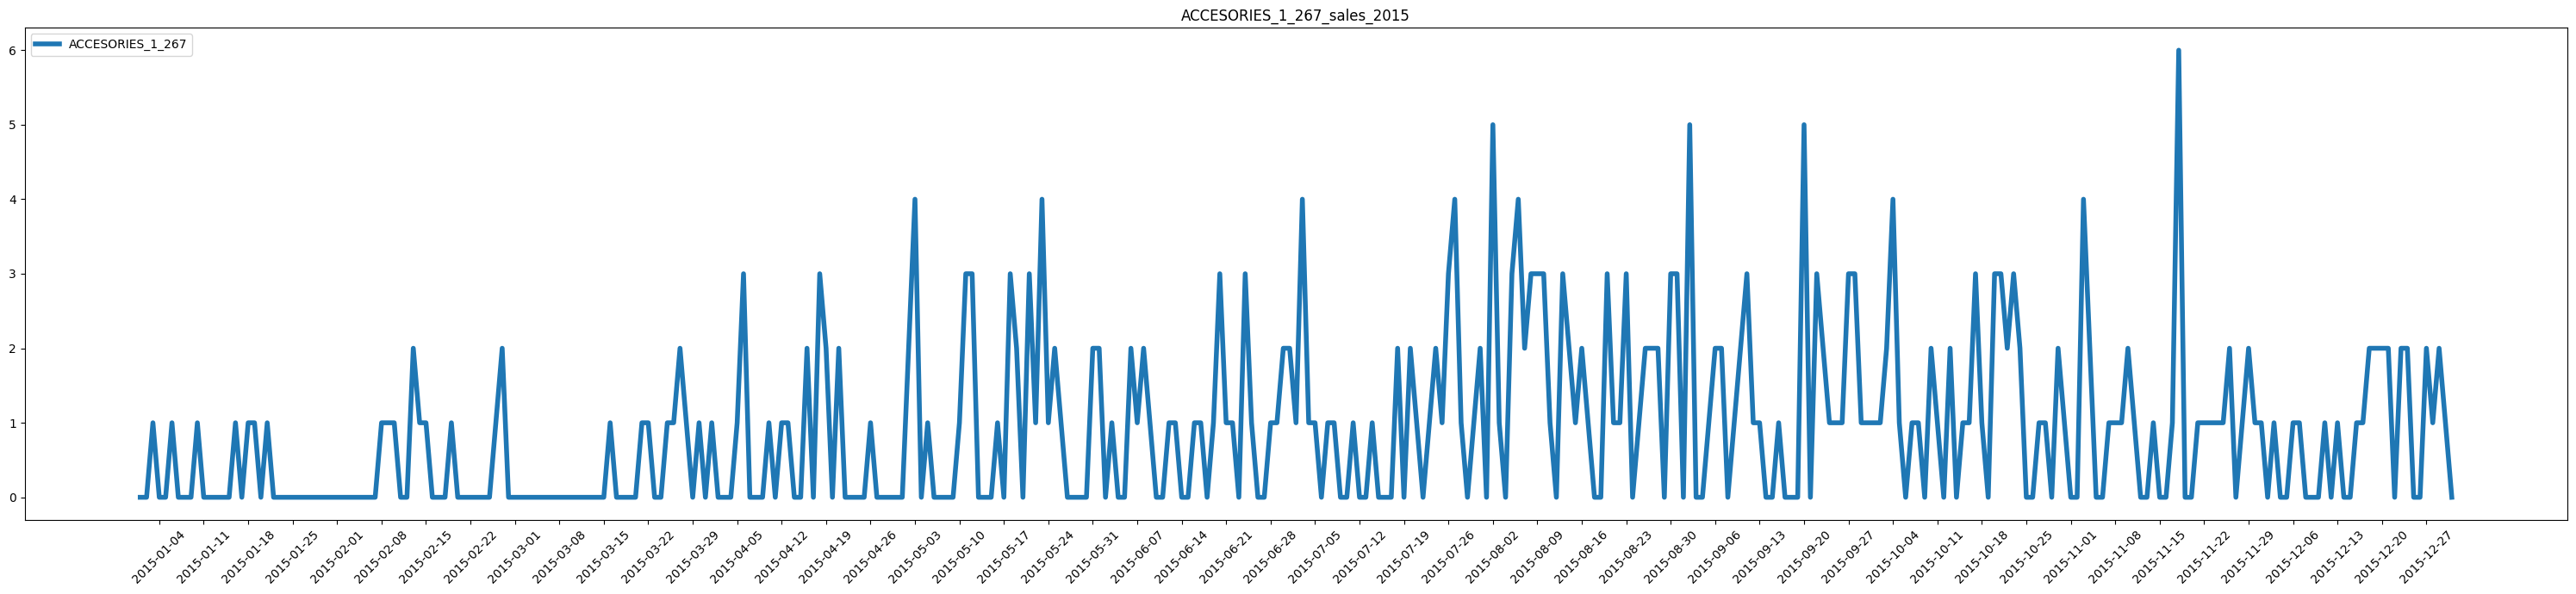

In [ ]:
plot_single_ts(df,'ACCESORIES_1_267',2015)

In [ ]:
products_df[products_df['is_seasonal']]['item'].unique()

array(['ACCESORIES_1_186', 'ACCESORIES_2_095', 'ACCESORIES_2_122',
       'ACCESORIES_2_132', 'HOME_&_GARDEN_1_148', 'HOME_&_GARDEN_1_233',
       'HOME_&_GARDEN_1_237', 'HOME_&_GARDEN_1_242',
       'HOME_&_GARDEN_1_423', 'HOME_&_GARDEN_1_512',
       'HOME_&_GARDEN_2_022', 'HOME_&_GARDEN_2_067',
       'HOME_&_GARDEN_2_162', 'HOME_&_GARDEN_2_276',
       'HOME_&_GARDEN_2_405', 'HOME_&_GARDEN_2_463',
       'HOME_&_GARDEN_2_495', 'SUPERMARKET_1_179', 'SUPERMARKET_2_070',
       'SUPERMARKET_2_239', 'SUPERMARKET_2_249', 'SUPERMARKET_2_255',
       'SUPERMARKET_3_069', 'SUPERMARKET_3_296', 'SUPERMARKET_3_466',
       'SUPERMARKET_3_563', 'SUPERMARKET_3_618', 'SUPERMARKET_3_722',
       'SUPERMARKET_3_796'], dtype=object)

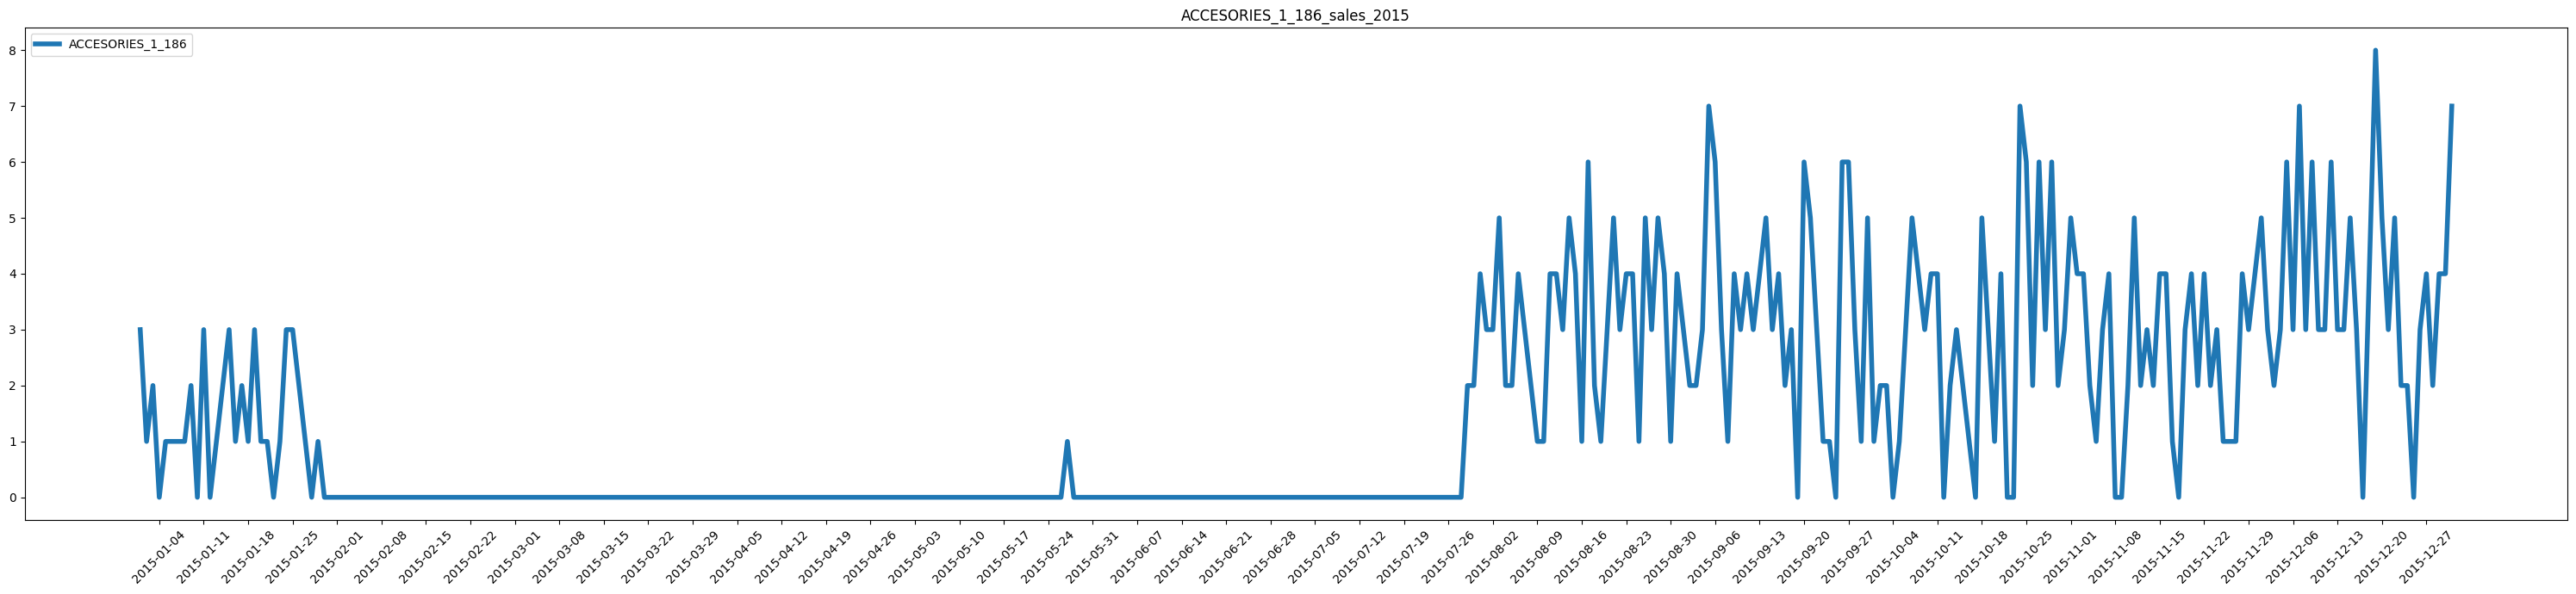

In [ ]:
plot_single_ts(df,'ACCESORIES_1_186',2015)

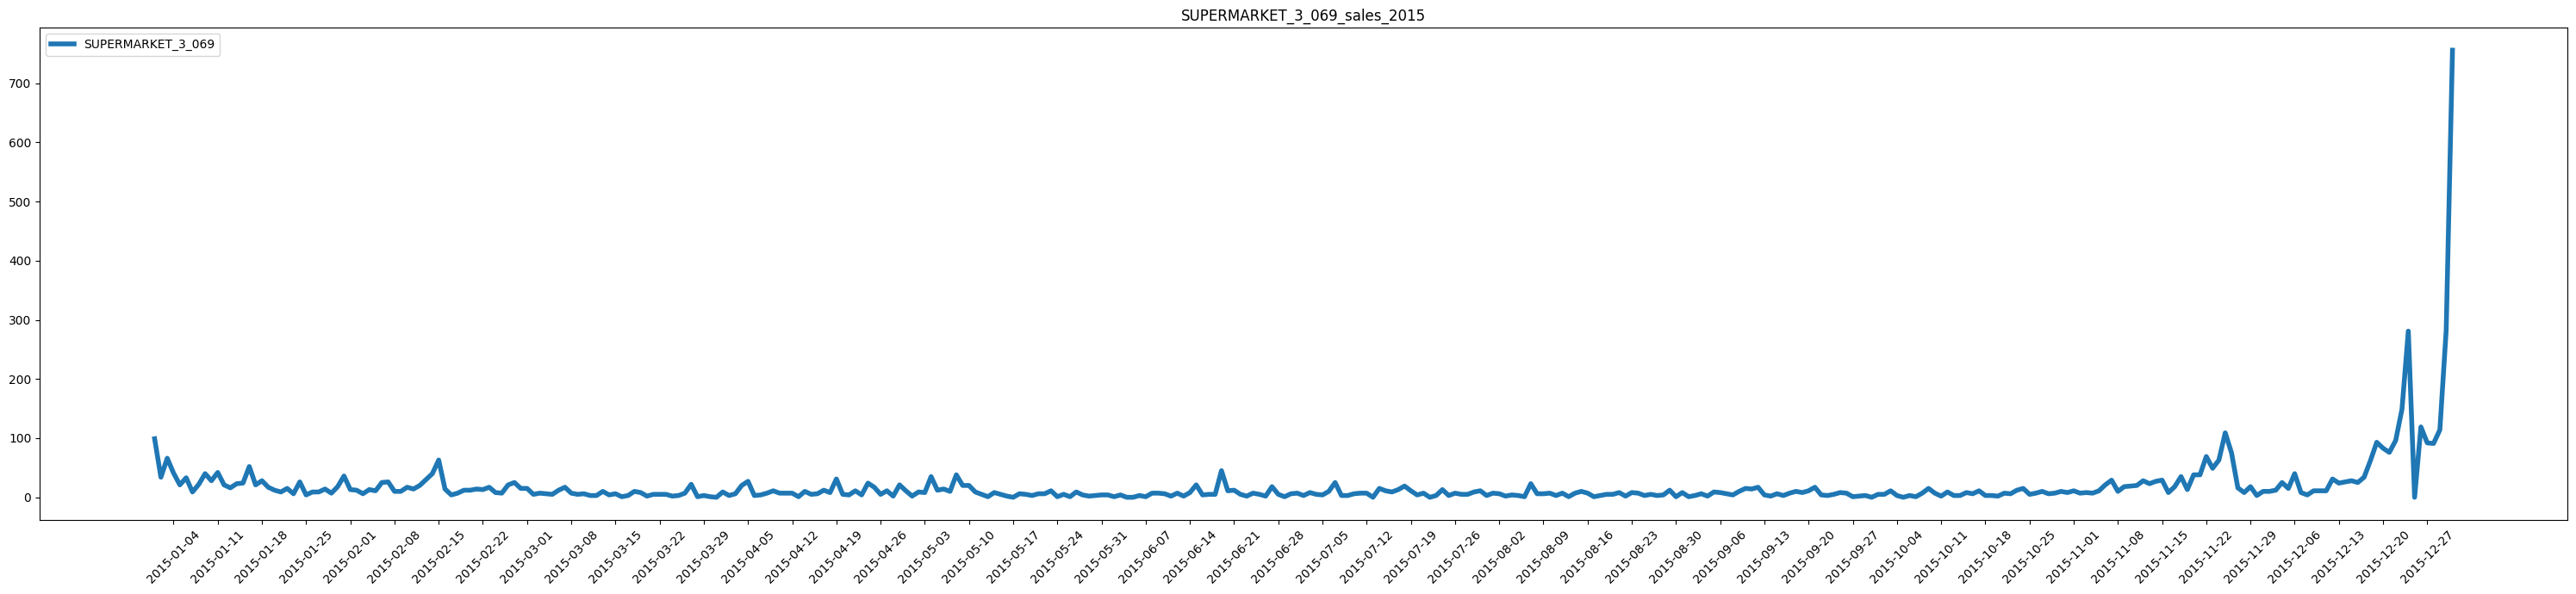

In [ ]:
plot_single_ts(df,'SUPERMARKET_3_069',2015)

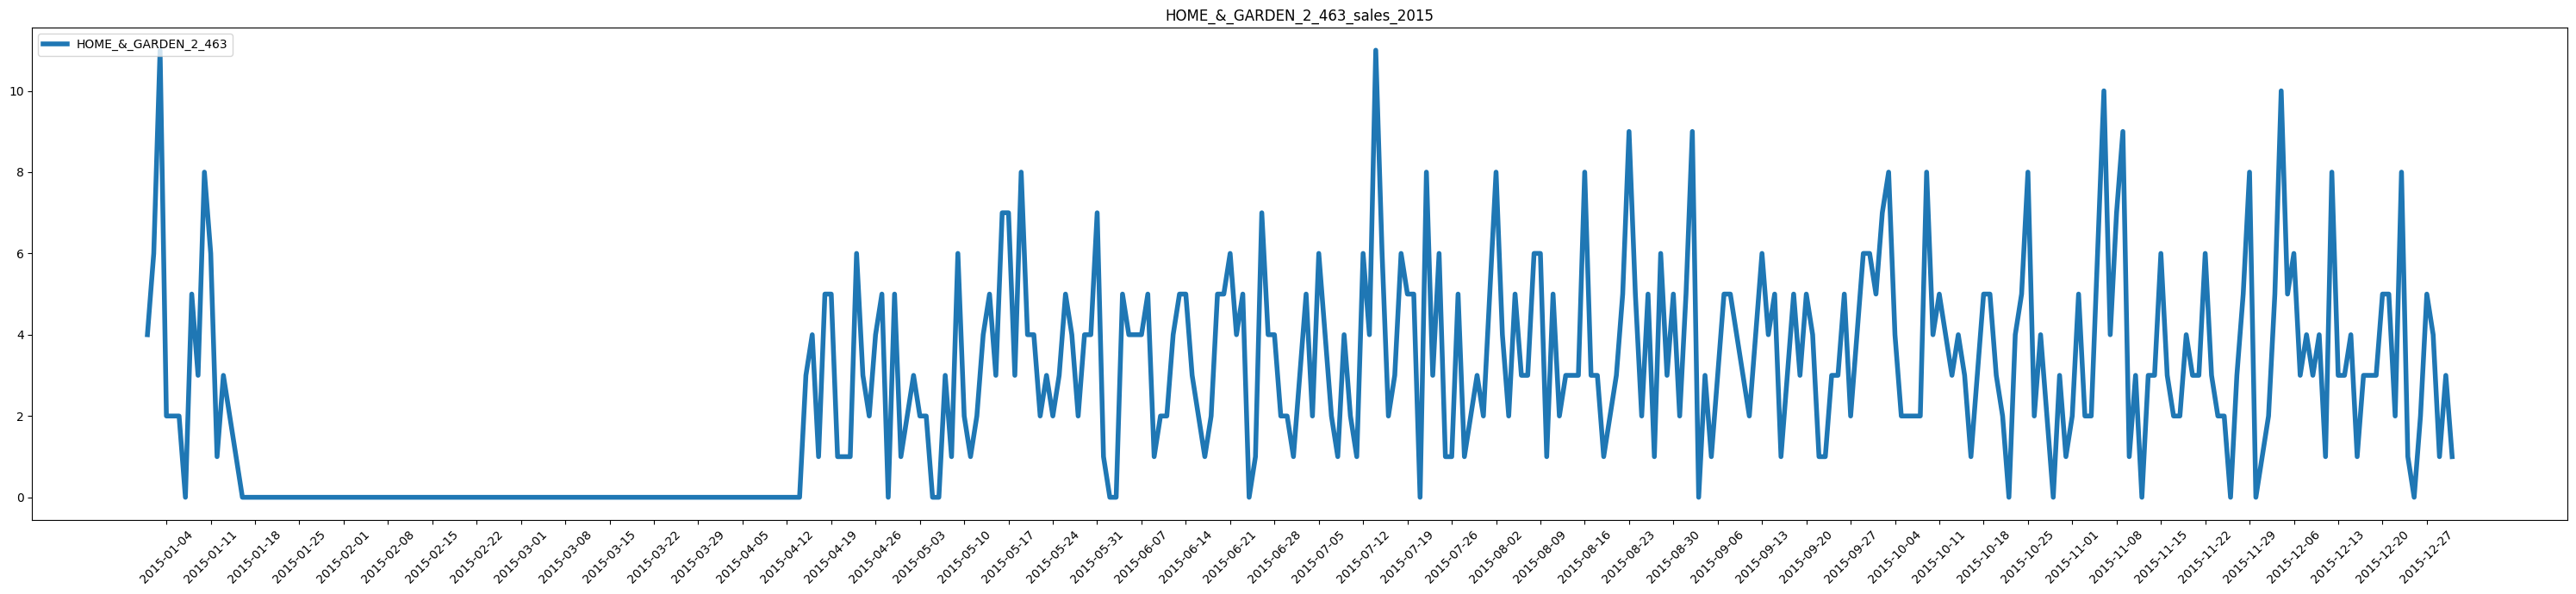

In [ ]:
plot_single_ts(df,'HOME_&_GARDEN_2_463',2015)

In [ ]:
products_df[products_df['is_spring_summer_product']]['item'].unique()

array(['HOME_&_GARDEN_1_148', 'HOME_&_GARDEN_2_022',
       'HOME_&_GARDEN_2_067', 'HOME_&_GARDEN_2_405',
       'HOME_&_GARDEN_2_495', 'SUPERMARKET_1_179'], dtype=object)

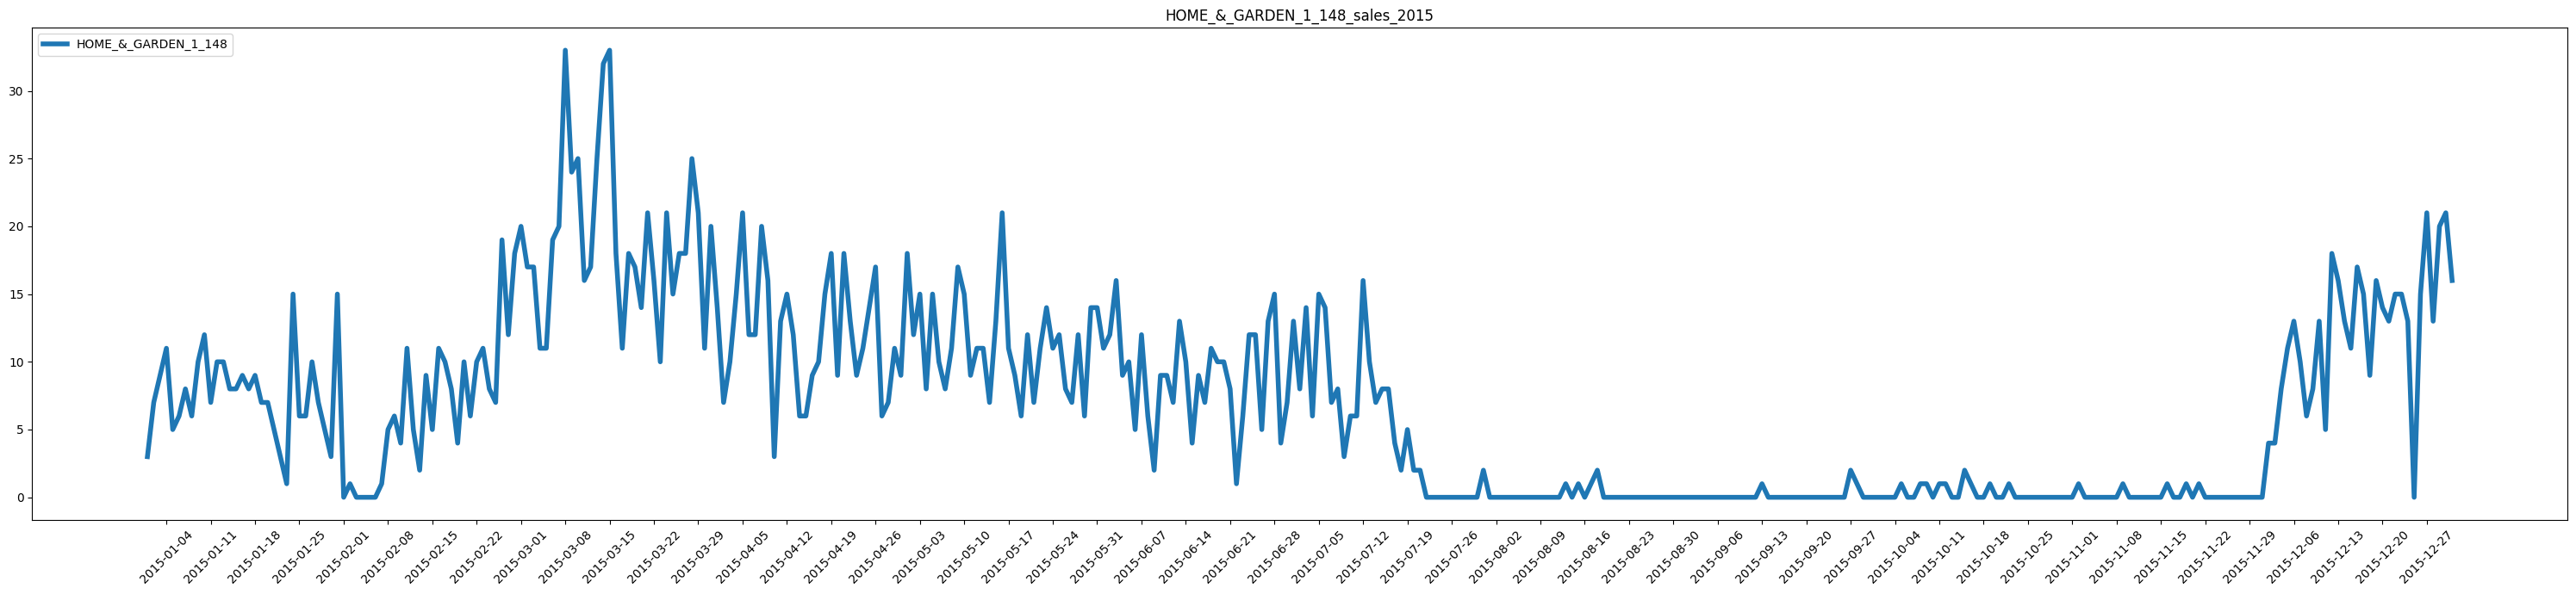

In [ ]:
plot_single_ts(df,'HOME_&_GARDEN_1_148',2015)

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
# elimino las columnas que ya no necesito
drop_list = products_df.loc[:,'units_sold_quarter_1':'units_sold_quarter_4'].columns.tolist()
products_df.drop(drop_list,axis=1,inplace=True)

In [ ]:
# products_df.drop('is_seasonal',axis=1,inplace=True)

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

## Productos de eventos

In [ ]:
df['event'].unique()

array(['No_event', 'Super_Bowl', '4th_of_July', 'Ramadan_starts',
       'Hallowen', 'Thanksgiving', 'Black_Friday', 'Christmas',
       'New_Year', 'Easter'], dtype=object)

In [ ]:
df

item     category     department       d  units_sold  \
0         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_1           0   
1         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_2           0   
2         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_3           0   
3         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_4           0   
4         ACCESORIES_1_001   ACCESORIES   ACCESORIES_1     d_5           0   
...                    ...          ...            ...     ...         ...   
5567469  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1822          32   
5567470  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1823          13   
5567471  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1824           7   
5567472  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1825          13   
5567473  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1826          20   

              date    weekday  weekday_int     event  year  month  day  \
0       2011-01-29   Saturday            1  No_event  2011      1   29   
1       2011-01-30     Sunday            2  No_event  2011      1   30   
2       2011-01-31     Monday            3  No_event  2011      1   31   
3       2011-02-01    Tuesday            4  No_event  2011      2    1   
4       2011-02-02  Wednesday            5  No_event  2011      2    2   
...            ...        ...          ...       ...   ...    ...  ...   
5567469 2016-01-24     Sunday            2  No_event  2016      1   24   
5567470 2016-01-25     Monday            3  No_event  2016      1   25   
5567471 2016-01-26    Tuesday            4  No_event  2016      1   26   
5567472 2016-01-27  Wednesday            5  No_event  2016      1   27   
5567473 2016-01-28   Thursday            6  No_event  2016      1   28   

         yearweek  price_per_unit  revenue  price_change_pct  \
0        201105.0        11.03282      0.0               NaN   
1        201105.0        11.03282      0.0               0.0   
2        201105.0        11.03282      0.0               0.0   
3        201105.0        11.03282      0.0               0.0   
4        201105.0        11.03282      0.0               0.0   
...           ...             ...      ...               ...   
5567469  201604.0         1.20000     38.4               0.0   
5567470  201604.0         1.20000     15.6               0.0   
5567471  201604.0         1.20000      8.4               0.0   
5567472  201604.0         1.20000     15.6               0.0   
5567473  201604.0         1.20000     24.0               0.0   

         flag_price_change  quarter  week_units_sold  week_revenue  \
0                     True        1                0           0.0   
1                    False        1                0           0.0   
2                    False        1                0           0.0   
3                    False        1                0           0.0   
4                    False        1                0           0.0   
...                    ...      ...              ...           ...   
5567469              False        1              111         133.2   
5567470              False        1              111         133.2   
5567471              False        1              111         133.2   
5567472              False        1              111         133.2   
5567473              False        1              111         133.2   

         month_units_sold  month_revenue  quarter_units_sold   sold  \
0                     362     3987.52088                 811  False   
1                     362     3987.52088                 811  False   
2                     362     3987.52088                 811  False   
3                     214     2359.16464                 811  False   
4                     214     2359.16464                 811  False   
...                   ...            ...                 ...    ...   
5567469               934     1120.80000                1812   True   
5567470           

### Estudio de un producto de Navidad y New Year

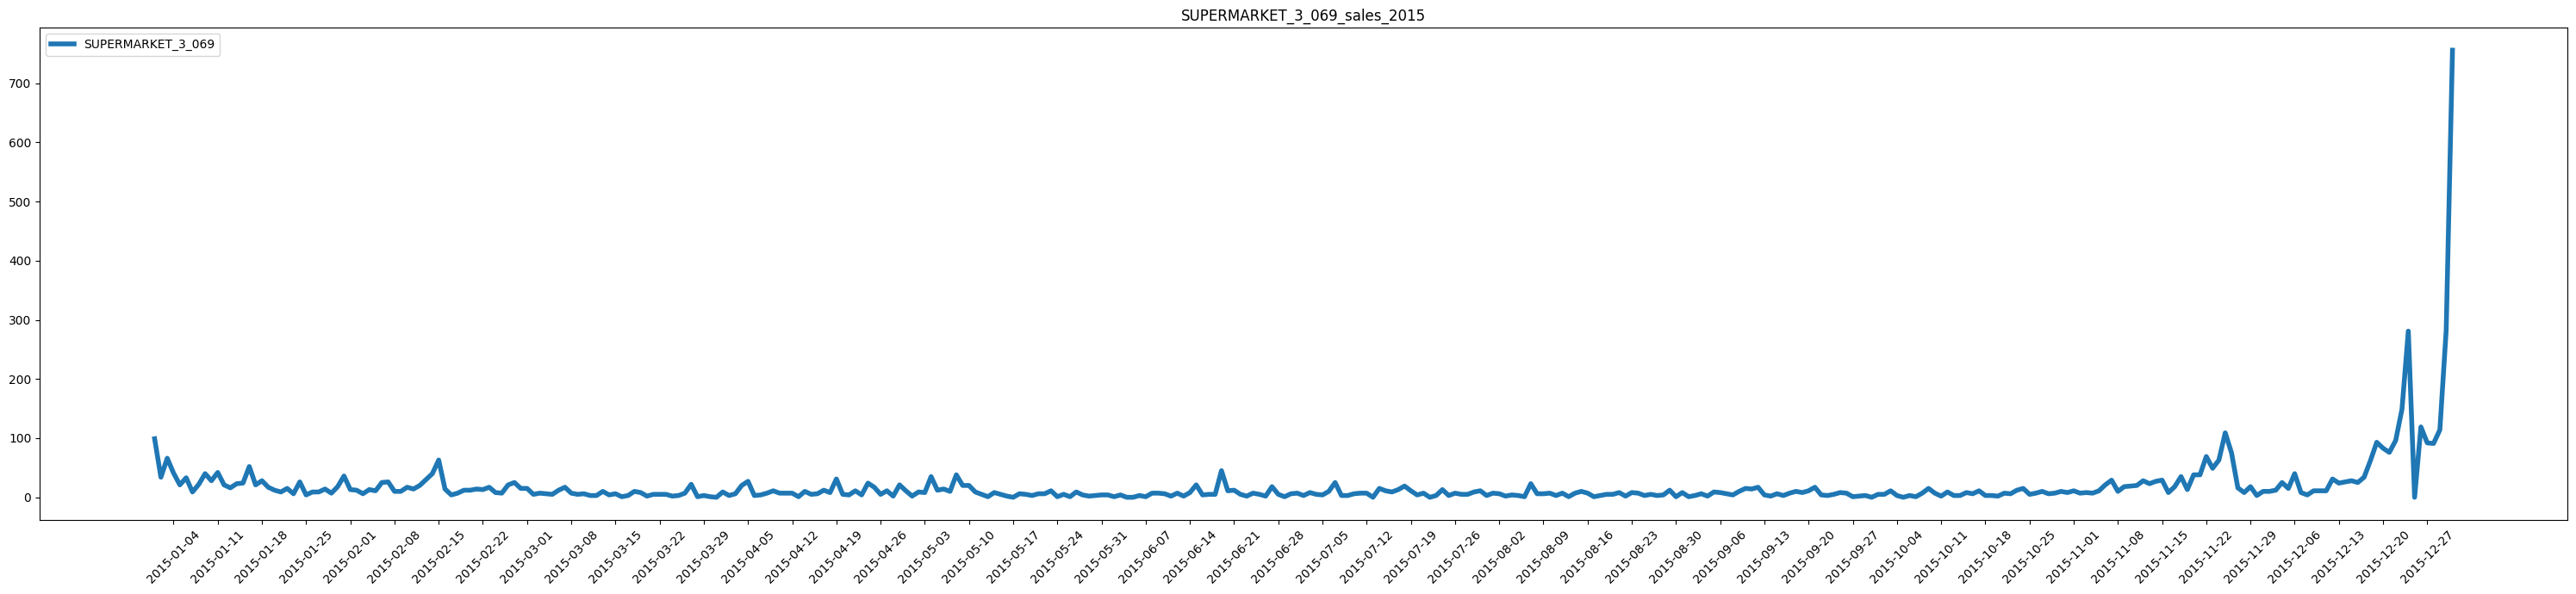

In [ ]:
plot_single_ts(df,'SUPERMARKET_3_069',2015)

- Item de Navidad: las ventas diaria promedias en los 7 dias anteriores es mucho más alto que las ventas diarias promedias en los 14 dias antes.
- Item de New Year:

Condiciones para que un item sea correlacionado a un evento:
  - Que el promedio de las ventas diarias durante los 7 dias anteriores sea significativamente superior a las ventas diarias medias del mes anterior.
  - introducir el flag es de fiestas navideñas


In [ ]:
df['event'].unique()

array(['No_event', 'Super_Bowl', '4th_of_July', 'Ramadan_starts',
       'Hallowen', 'Thanksgiving', 'Black_Friday', 'Christmas',
       'New_Year', 'Easter'], dtype=object)

In [ ]:
pd.set_option('display.max_rows',20)

## Is_event_sensitive

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567474 entries, 0 to 5567473
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   item                  object        
 1   category              object        
 2   department            object        
 3   d                     object        
 4   units_sold            int64         
 5   date                  datetime64[ns]
 6   weekday               object        
 7   weekday_int           int64         
 8   event                 object        
 9   year                  int64         
 10  month                 int64         
 11  day                   int64         
 12  yearweek              float64       
 13  price_per_unit        float64       
 14  revenue               float64       
 15  price_change_pct      float64       
 16  flag_price_change     bool          
 17  quarter               int32         
 18  week_units_sold       int64         
 19  

In [ ]:
df['event'].unique()

array(['No_event', 'Super_Bowl', '4th_of_July', 'Ramadan_starts',
       'Hallowen', 'Thanksgiving', 'Black_Friday', 'Christmas',
       'New_Year', 'Easter'], dtype=object)

In [ ]:
def get_is_event_week(event_series):
  if (event_series != 'No_event').any():
    return True
  else:
    return False

In [ ]:
gbdf = df.groupby(['yearweek']).agg(
    is_event_week = ('event', get_is_event_week )
)

In [ ]:
gbdf

is_event_week
yearweek               
201105.0          False
201106.0           True
201107.0          False
201108.0          False
201109.0          False
...                 ...
201552.0           True
201601.0          False
201602.0          False
201603.0          False
201604.0          False

[261 rows x 1 columns]

In [ ]:
df = df.merge(gbdf, on='yearweek', how='left')

In [ ]:
df[df['is_event_week']].loc[:,['date','yearweek','is_event_week']].sample(10)

date  yearweek  is_event_week
3924815 2013-02-08  201305.0           True
2818547 2013-11-23  201347.0           True
4260945 2013-07-04  201326.0           True
831366  2012-07-18  201229.0           True
2747727 2014-12-22  201451.0           True
4998795 2013-11-27  201347.0           True
1450548 2013-01-02  201253.0           True
3522691 2012-01-01  201201.0           True
5554486 2015-07-07  201527.0           True
3289288 2012-11-21  201247.0           True

In [ ]:
df[df['yearweek']==201426.0].head(10)

item    category    department       d  units_sold  \
1246  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1247           3   
1247  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1248           9   
1248  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1249           6   
1249  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1250           3   
1250  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1251           3   
1251  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1252           4   
1252  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1  d_1253           9   
3072  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1  d_1247           1   
3073  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1  d_1248           8   
3074  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1  d_1249           1   

           date    weekday  weekday_int           event  year  month  day  \
1246 2014-06-28   Saturday            1        No_event  2014      6   28   
1247 2014-06-29     Sunday            2  Ramadan_starts  2014      6   29   
1248 2014-06-30     Monday            3        No_event  2014      6   30   
1249 2014-07-01    Tuesday            4        No_event  2014      7    1   
1250 2014-07-02  Wednesday            5        No_event  2014      7    2   
1251 2014-07-03   Thursday            6        No_event  2014      7    3   
1252 2014-07-04     Friday            7     4th_of_July  2014      7    4   
3072 2014-06-28   Saturday            1        No_event  2014      6   28   
3073 2014-06-29     Sunday            2  Ramadan_starts  2014      6   29   
3074 2014-06-30     Monday            3        No_event  2014      6   30   

      yearweek  price_per_unit   revenue  price_change_pct  flag_price_change  \
1246  201426.0        11.01772  33.05316               0.0              False   
1247  201426.0        11.01772  99.15948               0.0              False   
1248  201426.0        11.01772  66.10632               0.0              False   
1249  201426.0        11.01772  33.05316               0.0              False   
1250  201426.0        11.01772  33.05316               0.0              False   
1251  201426.0        11.01772  44.07088               0.0              False   
1252  201426.0        11.01772  99.15948               0.0              False   
3072  201426.0         5.28010   5.28010               0.0              False   
3073  201426.0         5.28010  42.24080               0.0              False   
3074  201426.0         5.28010   5.28010               0.0              False   

      quarter  week_units_sold  week_revenue  month_units_sold  month_revenue  \
1246        2               37     407.65564               218    2400.043520   
1247        2               37     407.65564               218    2400.043520   
1248        2               37     407.65564               218    2400.043520   
1249        3               37     407.65564               329    3624.705215   
1250        3               37     407.65564               329    3624.705215   
1251        3               37     407.65564               329    3624.705215   
1252        3               37     407.65564               329    3624.705215   
3072        2               20     105.60200               371    1958.917100   
3073        2               20     105.60200               371    1958.917100   
3074        2               20     105.60200               371    1958.917100   

      quarter_units_sold  sold  days_since_last_sale  is_event_week  
1246                 658  True                   1.0           True  
1247                 658  True                   1.0           True  
1248                 658  True                   1.0           True  
1249                 951  True                   1.0           True  
1250                 951  True                   1.0           True  
1251                 951  True                   1.0           True  
1252                 951  True                   1.0           True  
3072                 916  True   

In [ ]:
df_sales_event_week = df[df['is_event_week']]
df_sales_no_event_week = df[~(df['is_event_week'])]

In [ ]:
# obtengo event_week_units_sold_mean
gbdf = df_sales_event_week.groupby(['item']).agg(
    event_week_units_sold_mean = ('week_units_sold',np.mean)
)

In [ ]:
products_df = products_df.merge(gbdf,on='item',how='left')

In [ ]:
# obtengo no_event_week_units_sold_mean
gbdf = df_sales_no_event_week.groupby(['item']).agg(
    no_event_week_units_sold_mean = ('week_units_sold',np.mean)
)

In [ ]:
products_df = products_df.merge(gbdf,on='item',how='left')

In [ ]:
event_impact_on_sales = (products_df['event_week_units_sold_mean']-products_df['no_event_week_units_sold_mean'])/products_df['no_event_week_units_sold_mean']*100
products_df['event_impact_on_sales'] = event_impact_on_sales

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
products_df['event_impact_on_sales'].describe()

count    3049.000000
mean       -2.401862
std        14.991086
min       -73.590158
25%        -9.524318
50%        -3.257308
75%         3.579374
max       340.147012
Name: event_impact_on_sales, dtype: float64

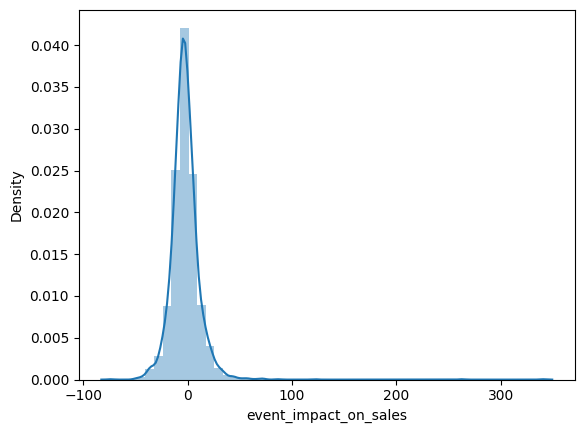

In [ ]:
sns.distplot(products_df['event_impact_on_sales']);

In [ ]:
products_df['is_event_sensitive'] = np.where(abs(products_df['event_impact_on_sales'])>=10,True,False)

In [ ]:
products_df['is_event_sensitive'].value_counts(normalize=True)

is_event_sensitive
False    0.651689
True     0.348311
Name: proportion, dtype: float64

In [ ]:
products_df['boosted_by_events'] = np.where((products_df['is_event_sensitive'])&(products_df['event_impact_on_sales']>0),True,False)

In [ ]:
products_df['negative_affected_by_events'] = np.where((products_df['is_event_sensitive'])&(products_df['event_impact_on_sales']<0),True,False)

In [ ]:
products_df

item     category     department  total_units_sold  \
0      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1              3619   
1      ACCESORIES_1_002   ACCESORIES   ACCESORIES_1              4826   
2      ACCESORIES_1_003   ACCESORIES   ACCESORIES_1              1202   
3      ACCESORIES_1_004   ACCESORIES   ACCESORIES_1             37709   
4      ACCESORIES_1_005   ACCESORIES   ACCESORIES_1             13726   
...                 ...          ...            ...               ...   
3044  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3             14596   
3045  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3              8181   
3046  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3             12600   
3047  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3             11078   
3048  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3              8719   

      average_daily_units_sold  average_weekly_units_sold  \
0                     1.981928                  13.856517   
1                     2.642935                  18.493976   
2                     0.658269                   4.604600   
3                    20.651150                 144.500548   
4                     7.516977                  52.584885   
...                        ...                        ...   
3044                  7.993428                  55.894304   
3045                  4.480285                  31.360898   
3046                  6.900329                  48.283133   
3047                  6.066813                  42.432092   
3048                  4.774918                  33.363636   

      average_monthly_units_sold  average_quarter_units_sold  \
0                     302.318729                  905.887733   
1                     403.607338                 1209.037788   
2                     100.432092                  300.716320   
3                    3144.476999                 9425.894304   
4                    1146.745893                 3436.462760   
...                          ...                         ...   
3044                 1216.328039                 3650.311610   
3045                  681.352136                 2044.547097   
3046                 1048.814348                 3148.803943   
3047                  925.161555                 2770.921687   
3048                  729.088719                 2181.690581   

      max_daily_units_sold  min_daily_units_sold  max_weekly_units_sold  \
0                       12                     0                     47   
1                       24                     0                    102   
2                       11                     0                     37   
3                       61                     0                    216   
4                       35                     0                    129   
...                    ...                   ...                    ...   
3044                    44                     0                    218   
3045                    26                     0                     76   
3046                    57                     0                    212   
3047                    30                     0                    116   
3048                    45                     0                    175   

      min_weekly_units_sold  max_monthly_units_sold  min_monthly_units_sold  \
0                         0                     411                     214   
1                         0                     884                     246   
2                         0                     201                      60   
3                         7                    3409                    2890   
4                         0                    1570                     609   
...                     ...                     ...                     ...   
3044                      0                    1485                     891   
3045                      0                     984                     427   
3046                      0 

In [ ]:
# elimino las columnas que ya no necesito
drop_list = products_df.loc[:,'event_week_units_sold_mean':'no_event_week_units_sold_mean'].columns.tolist()
products_df.drop(drop_list,axis=1,inplace=True)

## is_discontinuous

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   item                           3049 non-null   object 
 1   category                       3049 non-null   object 
 2   department                     3049 non-null   object 
 3   total_units_sold               3049 non-null   int64  
 4   average_daily_units_sold       3049 non-null   float64
 5   average_weekly_units_sold      3049 non-null   float64
 6   average_monthly_units_sold     3049 non-null   float64
 7   average_quarter_units_sold     3049 non-null   float64
 8   max_daily_units_sold           3049 non-null   int64  
 9   min_daily_units_sold           3049 non-null   int64  
 10  max_weekly_units_sold          3049 non-null   int64  
 11  min_weekly_units_sold          3049 non-null   int64  
 12  max_monthly_units_sold         3049 non-null   i

In [ ]:
products_df['is_discontinuous'] = np.where(products_df['days_since_last_sale_max']>=365,True,False)

In [ ]:
products_df['is_discontinuous'].value_counts()

is_discontinuous
False    3019
True       30
Name: count, dtype: int64

#Preprocessing

Elimino los productos que se han dejado de vender en 2015. (productos que ya no se venden)

In [ ]:
df_15_16 = df[df['year'].isin([2015,2016])]
df_15_16

item     category     department       d  units_sold  \
1433      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1  d_1434           1   
1434      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1  d_1435           7   
1435      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1  d_1436           1   
1436      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1  d_1437           0   
1437      ACCESORIES_1_001   ACCESORIES   ACCESORIES_1  d_1438           5   
...                    ...          ...            ...     ...         ...   
5567469  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1822          32   
5567470  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1823          13   
5567471  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1824           7   
5567472  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1825          13   
5567473  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3  d_1826          20   

              date    weekday  weekday_int     event  year  month  day  \
1433    2015-01-01   Thursday            6  New_Year  2015      1    1   
1434    2015-01-02     Friday            7  No_event  2015      1    2   
1435    2015-01-03   Saturday            1  No_event  2015      1    3   
1436    2015-01-04     Sunday            2  No_event  2015      1    4   
1437    2015-01-05     Monday            3  No_event  2015      1    5   
...            ...        ...          ...       ...   ...    ...  ...   
5567469 2016-01-24     Sunday            2  No_event  2016      1   24   
5567470 2016-01-25     Monday            3  No_event  2016      1   25   
5567471 2016-01-26    Tuesday            4  No_event  2016      1   26   
5567472 2016-01-27  Wednesday            5  No_event  2016      1   27   
5567473 2016-01-28   Thursday            6  No_event  2016      1   28   

         yearweek  price_per_unit   revenue  price_change_pct  \
1433     201452.0        11.00176  11.00176               0.0   
1434     201452.0        11.00176  77.01232               0.0   
1435     201501.0        11.00176  11.00176               0.0   
1436     201501.0        11.00176   0.00000               0.0   
1437     201501.0        11.00176  55.00880               0.0   
...           ...             ...       ...               ...   
5567469  201604.0         1.20000  38.40000               0.0   
5567470  201604.0         1.20000  15.60000               0.0   
5567471  201604.0         1.20000   8.40000               0.0   
5567472  201604.0         1.20000  15.60000               0.0   
5567473  201604.0         1.20000  24.00000               0.0   

         flag_price_change  quarter  week_units_sold  week_revenue  \
1433                 False        1               32     352.05632   
1434                 False        1               32     352.05632   
1435                 False        1               21     231.03696   
1436                 False        1               21     231.03696   
1437                 False        1               21     231.03696   
...                    ...      ...              ...           ...   
5567469              False        1              111     133.20000   
5567470              False        1              111     133.20000   
5567471              False        1              111     133.20000   
5567472              False        1              111     133.20000   
5567473              False        1              111     133.20000   

         month_units_sold  month_revenue  quarter_units_sold   sold  \
1433                  362     3987.52088                 811   True   
1434                  362     3987.52088                 811   True   
1435                  362     3987.52088                 811   True   
1436                  362     3987.52088                 811  False   
1437                  362     3987.52088                 811   True   
...                   ...            ...                 ...    ...   
5567469               934     1120.80000                1812   True   
556747

In [ ]:
item_sales_15_16 = df_15_16.groupby('item').agg(units_sold_sum = ('units_sold',np.sum))

In [ ]:
item_sales_15_16

units_sold_sum
item                             
ACCESORIES_1_001             1747
ACCESORIES_1_002             1031
ACCESORIES_1_003              845
ACCESORIES_1_004             7702
ACCESORIES_1_005             3415
...                           ...
SUPERMARKET_3_823            5032
SUPERMARKET_3_824             524
SUPERMARKET_3_825            3122
SUPERMARKET_3_826            4033
SUPERMARKET_3_827            5991

[3049 rows x 1 columns]

In [ ]:
# lista de productos que ya no se venden
item_sales_15_16.query('units_sold_sum==0').index.tolist()

['ACCESORIES_1_112', 'HOME_&_GARDEN_2_162']

In [ ]:
products_df.set_index('item',inplace=True)

In [ ]:
products_df.drop(item_sales_15_16.query('units_sold_sum==0').index.tolist(),inplace=True)

In [ ]:
products_df.columns.tolist()

['category',
 'department',
 'total_units_sold',
 'average_daily_units_sold',
 'average_weekly_units_sold',
 'average_monthly_units_sold',
 'average_quarter_units_sold',
 'max_daily_units_sold',
 'min_daily_units_sold',
 'max_weekly_units_sold',
 'min_weekly_units_sold',
 'max_monthly_units_sold',
 'min_monthly_units_sold',
 'total_revenue',
 'average_price_per_unit',
 'average_daily_revenue',
 'average_weekly_revenue',
 'average_monthly_revenue',
 'max_daily_revenue',
 'max_weekly_revenue',
 'max_monthly_revenue',
 'std_price_per_unit',
 'max_price_change_pct',
 'min_price_change_pct',
 'price_changes',
 'days_since_last_sale_mean',
 'days_since_last_sale_max',
 'days_since_last_sale_min',
 'days_since_last_sale_var',
 'daily_units_sold_var',
 'is_top_price_in_department',
 'is_top_seller_in_department',
 'is_high_revenue_in_department',
 'sells_every_week',
 'sells_every_month',
 'is_weekend_product',
 'is_midweek_product',
 'is_week_start_product',
 'is_early_month_product',
 'is_mi

Aqui selecciono las feature que quiero utilizar para el clustering

In [ ]:
selected_features = [
 'average_daily_units_sold',
 'max_daily_units_sold',
 'average_price_per_unit',
 'average_daily_revenue',
 'max_daily_revenue',
 'std_price_per_unit',
 'max_price_change_pct',
 'price_changes',
 'days_since_last_sale_mean',
 'days_since_last_sale_max',
 'daily_units_sold_var',
 'is_top_price_in_department',
 'is_top_seller_in_department',
 'is_high_revenue_in_department',
 'sells_every_week',
 'sells_every_month',
 'is_weekend_product',
 'is_midweek_product',
 'is_week_start_product',
 'is_early_month_product',
 'is_midmonth_product',
 'is_end_month_product',
 'is_seasonal',
 'is_discontinuous',
 'is_event_sensitive',
 'boosted_by_events',
 'negative_affected_by_events']


In [ ]:
products_df_prep = products_df[selected_features]

In [ ]:
report_df(products_df_prep)
products_df_prep.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, ACCESORIES_1_001 to SUPERMARKET_3_827
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   average_daily_units_sold       3047 non-null   float64
 1   max_daily_units_sold           3047 non-null   int64  
 2   average_price_per_unit         3047 non-null   float64
 3   average_daily_revenue          3047 non-null   float64
 4   max_daily_revenue              3047 non-null   float64
 5   std_price_per_unit             3047 non-null   float64
 6   max_price_change_pct           3047 non-null   float64
 7   price_changes                  3047 non-null   int64  
 8   days_since_last_sale_mean      3047 non-null   float64
 9   days_since_last_sale_max       3047 non-null   float64
 10  daily_units_sold_var           3047 non-null   float64
 11  is_top_price_in_department     3047 non-null   bool   
 12  is_top_seller_in_departme

average_daily_units_sold  max_daily_units_sold  \
item                                                                  
SUPERMARKET_1_073                    6.255203                    28   
HOME_&_GARDEN_1_384                  2.935926                    22   
ACCESORIES_1_421                     3.381161                    16   
ACCESORIES_1_382                     4.624315                    17   
HOME_&_GARDEN_1_449                  5.131435                    28   

                     average_price_per_unit  average_daily_revenue  \
item                                                                 
SUPERMARKET_1_073                  2.372230              14.746911   
HOME_&_GARDEN_1_384                6.050000              17.762349   
ACCESORIES_1_421                  11.157309              37.544663   
ACCESORIES_1_382                   2.620100              12.116169   
HOME_&_GARDEN_1_449               18.892091              96.822388   

                     max_daily_revenue  std_price_per_unit  \
item                                                         
SUPERMARKET_1_073             59.53920        1.136767e-01   
HOME_&_GARDEN_1_384          133.10000        5.712711e-16   
ACCESORIES_1_421             176.79424        3.506823e-01   
ACCESORIES_1_382              44.54170        4.433586e-16   
HOME_&_GARDEN_1_449          526.76389        1.798177e-01   

                     max_price_change_pct  price_changes  \
item                                                       
SUPERMARKET_1_073            7.374302e+00             20   
HOME_&_GARDEN_1_384          1.468064e-14              1   
ACCESORIES_1_421             6.231847e+00             15   
ACCESORIES_1_382             1.694932e-14              1   
HOME_&_GARDEN_1_449          5.010020e+00             12   

                     days_since_last_sale_mean  days_since_last_sale_max  \
item                                                                       
SUPERMARKET_1_073                     1.157995                      39.0   
HOME_&_GARDEN_1_384                   1.138763                      84.0   
ACCESORIES_1_421                      1.022684                       8.0   
ACCESORIES_1_382                      1.042262                       5.0   
HOME_&_GARDEN_1_449                   1.009398                       4.0   

                     daily_units_sold_var  is_top_price_in_department  \
item                                                                    
SUPERMARKET_1_073               19.243329                       False   
HOME_&_GARDEN_1_384             20.316440                       False   
ACCESORIES_1_421                13.354911                        True   
ACCESORIES_1_382                 8.594126                       False   
HOME_&_GARDEN_1_449             28.684085                        True   

                     is_top_seller_in_department  \
item                                               
SUPERMARKET_1_073                          False   
HOME_&_GARDEN_1_384                        False   
ACCESORIES_1_421                           False   
ACCESORIES_1_382                           False   
HOME_&_GARDEN_1_449                        False   

                     is_high_revenue_in_department  sells_every_week  \
item                                                                   
SUPERMARKET_1_073                            False             False   
HOME_&_GARDEN_1_384                          False             False   
ACCESORIES_1_421                              True             False   
ACCESORIES_1_382                             False              True   
HOME_&_GARDEN_1_449                           True             False   

                     sells_every_month  is_weekend_product  \
item                                                         
SUPERMARKET_1_073                 True                True   
HOME_&_GARDEN_1_384               True                True   
ACCESORIES_1_

Ahora podemos construir nuestro pipeline.

Los pasos que va a realizar son:

3. Estandarizamos los valores, usando ***RobustScaler*** para eliminar la influencia de los outliers.

4. Hacemos un fit con KMeans para calcular la **inertia** de los grupos (la dispersión de los datos al centroide).

Técnica del ***Elbow Curve***: todo esto lo hacemos en una loop porque queremos ver cuando hay un cambio brusco en la inertia. Dicho de otro modo **aumentar más el número de centroides no nos sale a cuenta porque la ganacia marginal es muy pequeña.**

In [ ]:
# separamos el pipeline del a loop, para no tener que volver a hacer los primeros 3 pasos para cada k de la loop
impute_scale_pipe = Pipeline(steps = [
    ('KNNImputer', KNNImputer()),
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0)))
])

In [ ]:
products_df_prep_scaled = impute_scale_pipe.fit_transform(products_df_prep)

In [ ]:
products_df_prep_scaled.head()

average_daily_units_sold  max_daily_units_sold  \
item                                                               
ACCESORIES_1_001                 -0.029120             -0.034076   
ACCESORIES_1_002                 -0.022583             -0.008519   
ACCESORIES_1_003                 -0.042210             -0.036206   
ACCESORIES_1_004                  0.155501              0.070282   
ACCESORIES_1_005                  0.025616              0.014908   

                  average_price_per_unit  average_daily_revenue  \
item                                                              
ACCESORIES_1_001                0.306785              -0.001667   
ACCESORIES_1_002                0.048951              -0.030372   
ACCESORIES_1_003               -0.010724              -0.071642   
ACCESORIES_1_004                0.080160               0.368763   
ACCESORIES_1_005               -0.015506               0.022975   

                  max_daily_revenue  std_price_per_unit  max_price_change_pct  \
item                                                                            
ACCESORIES_1_001           0.003876            0.011916              0.037148   
ACCESORIES_1_002          -0.000433           -0.049002             -0.001587   
ACCESORIES_1_003          -0.068150           -0.033870              0.183443   
ACCESORIES_1_004           0.202641            0.206730              0.047010   
ACCESORIES_1_005          -0.002077            0.122598              0.106223   

                  price_changes  days_since_last_sale_mean  \
item                                                         
ACCESORIES_1_001       0.000000                  -0.050605   
ACCESORIES_1_002      -0.092593                   0.035950   
ACCESORIES_1_003      -0.037037                   0.210376   
ACCESORIES_1_004      -0.092593                  -0.078471   
ACCESORIES_1_005       0.203704                  -0.061418   

                  days_since_last_sale_max  daily_units_sold_var  \
item                                                               
ACCESORIES_1_001                 -0.033512             -0.002692   
ACCESORIES_1_002                  0.215036             -0.002887   
ACCESORIES_1_003                  0.019549             -0.003723   
ACCESORIES_1_004                 -0.027927              0.010738   
ACCESORIES_1_005                 -0.019549              0.001353   

                  is_top_price_in_department  is_top_seller_in_department  \
item                                                                        
ACCESORIES_1_001                         1.0                          0.0   
ACCESORIES_1_002                         0.0                          0.0   
ACCESORIES_1_003                         0.0                          0.0   
ACCESORIES_1_004                         0.0                          1.0   
ACCESORIES_1_005                         0.0                          1.0   

                  is_high_revenue_in_department  sells_every_week  \
item                                                                
ACCESORIES_1_001                            0.0               0.0   
ACCESORIES_1_002                            0.0               0.0   
ACCESORIES_1_003                            0.0               0.0   
ACCESORIES_1_004                            1.0               1.0   
ACCESORIES_1_005                            0.0               0.0   

                  sells_every_month  is_weekend_product  is_midweek_product  \
item                                                                          
ACCESORIES_1_001                0.0                 0.0                 0.0   
ACCESORIES_1_002                0.0                 0.0                 0.0   
ACCESORIES_1_003                0.0                 0.0                 0.0   
ACCESORIES_1_004                0.0                 0.0                 0.0   
ACCESORIES_1_005                0.0                 0.0                 0.0   

             

In [ ]:
products_df_prep_scaled.isna().sum().sum()

0

In [ ]:
products_df_prep_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, ACCESORIES_1_001 to SUPERMARKET_3_827
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   average_daily_units_sold       3047 non-null   float64
 1   max_daily_units_sold           3047 non-null   float64
 2   average_price_per_unit         3047 non-null   float64
 3   average_daily_revenue          3047 non-null   float64
 4   max_daily_revenue              3047 non-null   float64
 5   std_price_per_unit             3047 non-null   float64
 6   max_price_change_pct           3047 non-null   float64
 7   price_changes                  3047 non-null   float64
 8   days_since_last_sale_mean      3047 non-null   float64
 9   days_since_last_sale_max       3047 non-null   float64
 10  daily_units_sold_var           3047 non-null   float64
 11  is_top_price_in_department     3047 non-null   float64
 12  is_top_seller_in_departme

# Clustering

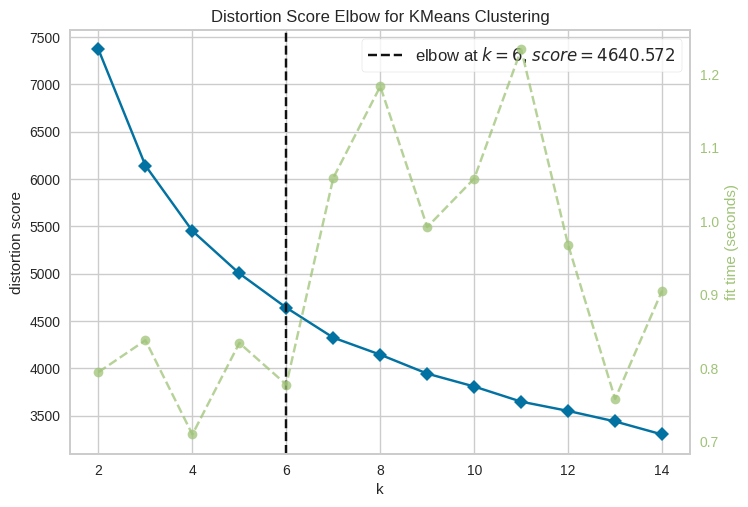

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(products_df_prep_scaled)
visualizer.show()


In [ ]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(products_df_prep_scaled)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


<a id = "elbow_curve"></a>
# Elbow curve (CORE IDEA)
[Volver al índice](#table_of_contents)

En esta sección vamos a visualizar nuestro ***Elbow Curve*** y buscaremos el punto de inflexión que será nuestro número de centroides.

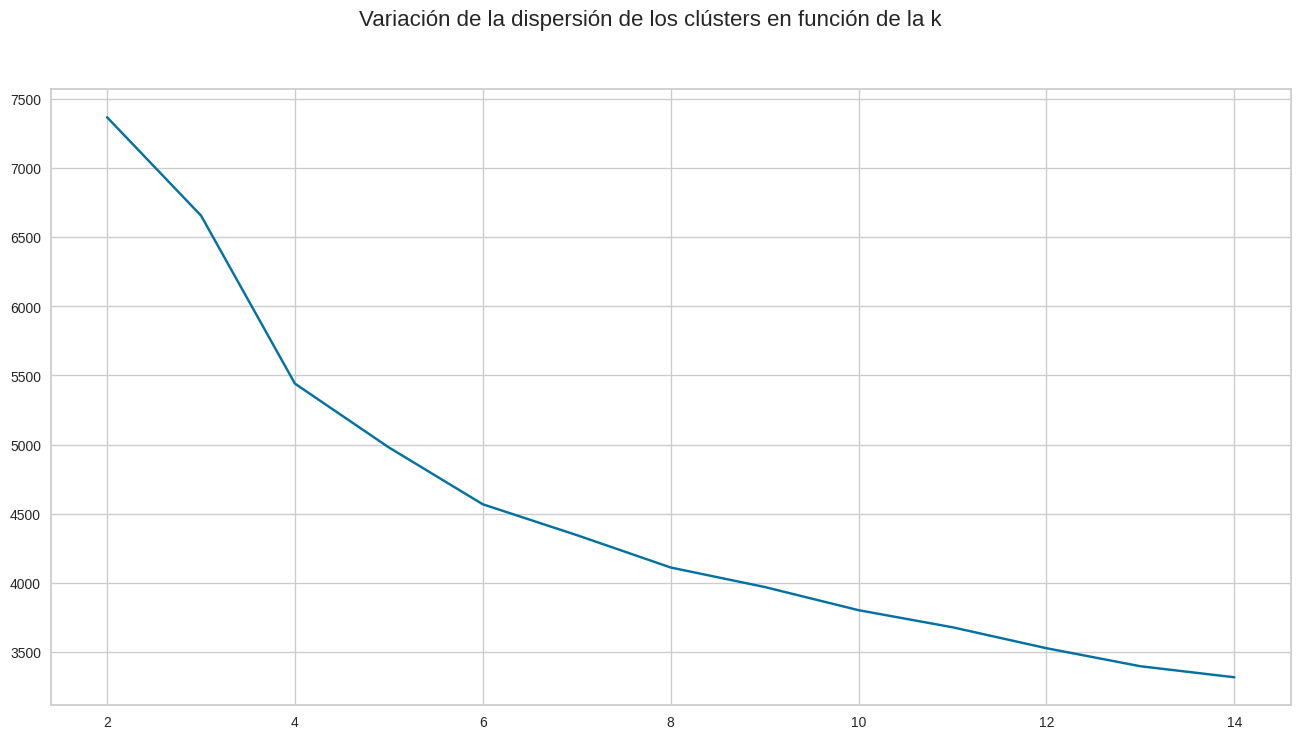

In [ ]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Podemos probar 6

# Segmentación con k = 6




In [ ]:
pipe = Pipeline(steps = [
    ('KNNImputer', KNNImputer()),
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 6, random_state = 12))
])

In [ ]:
products_df_prep.shape

(3047, 27)

In [ ]:
pipe.fit(products_df_prep)

Pipeline(steps=[('KNNImputer', KNNImputer()),
                ('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=6, random_state=12))])

In [ ]:
products_df_prep.sample(5)

average_daily_units_sold  max_daily_units_sold  \
item                                                                  
HOME_&_GARDEN_2_211                  0.686747                     6   
SUPERMARKET_3_543                    4.588171                    34   
HOME_&_GARDEN_1_400                  1.927163                    13   
HOME_&_GARDEN_2_110                  8.047097                    63   
SUPERMARKET_2_376                   11.726725                    49   

                     average_price_per_unit  average_daily_revenue  \
item                                                                 
HOME_&_GARDEN_2_211               24.973015              17.153876   
SUPERMARKET_3_543                  4.563534              20.876067   
HOME_&_GARDEN_1_400                8.712500              16.790409   
HOME_&_GARDEN_2_110                3.962500              31.886624   
SUPERMARKET_2_376                  2.292034              26.878475   

                     max_daily_revenue  std_price_per_unit  \
item                                                         
HOME_&_GARDEN_2_211           150.0000            0.120183   
SUPERMARKET_3_543             154.2240            0.111760   
HOME_&_GARDEN_1_400           113.2625            0.000000   
HOME_&_GARDEN_2_110           249.6375            0.000000   
SUPERMARKET_2_376             105.8400            0.042653   

                     max_price_change_pct  price_changes  \
item                                                       
HOME_&_GARDEN_2_211              5.263158             16   
SUPERMARKET_3_543                7.051827             25   
HOME_&_GARDEN_1_400              0.000000              0   
HOME_&_GARDEN_2_110              0.000000              0   
SUPERMARKET_2_376                5.494505             25   

                     days_since_last_sale_mean  days_since_last_sale_max  \
item                                                                       
HOME_&_GARDEN_2_211                   2.175627                      12.0   
SUPERMARKET_3_543                     1.203641                     102.0   
HOME_&_GARDEN_1_400                   1.153976                       5.0   
HOME_&_GARDEN_2_110                   1.006299                       2.0   
SUPERMARKET_2_376                     1.096096                      40.0   

                     daily_units_sold_var  is_top_price_in_department  \
item                                                                    
HOME_&_GARDEN_2_211              0.866202                        True   
SUPERMARKET_3_543               14.556879                        True   
HOME_&_GARDEN_1_400              4.467569                        True   
HOME_&_GARDEN_2_110            160.014219                       False   
SUPERMARKET_2_376               52.721444                       False   

                     is_top_seller_in_department  \
item                                               
HOME_&_GARDEN_2_211                        False   
SUPERMARKET_3_543                          False   
HOME_&_GARDEN_1_400                        False   
HOME_&_GARDEN_2_110                         True   
SUPERMARKET_2_376                           True   

                     is_high_revenue_in_department  sells_every_week  \
item                                                                   
HOME_&_GARDEN_2_211                          False             False   
SUPERMARKET_3_543                            False             False   
HOME_&_GARDEN_1_400                          False             False   
HOME_&_GARDEN_2_110                           True             False   
SUPERMARKET_2_376                            False             False   

                     sells_every_month  is_weekend_product  \
item                                                         
HOME_&_GARDEN_2_211               True                True   
SUPERMARKET_3_543                 True                True   
HOME_&_GARDEN

In [ ]:
labels = pipe.predict(products_df_prep)

In [ ]:
df_final = products_df_prep.copy()

In [ ]:
# le asignamos al DataFrame procesado el clúster.
# si lo hacemos al df escalado será más díficil de interpretar los resultados porque los números están escalados
df_final["cluster"] = labels

In [ ]:
df_final["cluster"] = df_final["cluster"] + 1

In [ ]:
df_final.shape

(3047, 28)

<a id = "ficha"></a>
## Ficha de los productos
[Volver al índice](#table_of_contents)

El último paso, usa vez que tenemos hecha nuestra segmentación completa es crear una ***ficha resumen*** de cada grupo con las principales variables de negocio o con aquellas que no se han utilizado en la segmentación para hacer un seguimiento periódico de los grupos o para enviar como documento al resto de los departamentos de la empresa.

In [ ]:
bool_columns = df_final.select_dtypes('bool').columns

In [ ]:
for col in bool_columns:
  df_final[col] = np.where(df_final[col]==True,1,0)

In [ ]:
df_final.groupby('cluster').describe().T.style.background_gradient(cmap = 'Blues', axis = 1)

## Reasignación cluster 4 a cluster 1

In [ ]:
df_final.head()

average_daily_units_sold  max_daily_units_sold  \
item                                                               
ACCESORIES_1_001                  1.981928                    12   
ACCESORIES_1_002                  2.642935                    24   
ACCESORIES_1_003                  0.658269                    11   
ACCESORIES_1_004                 20.651150                    61   
ACCESORIES_1_005                  7.516977                    35   

                  average_price_per_unit  average_daily_revenue  \
item                                                              
ACCESORIES_1_001               11.033522              21.844953   
ACCESORIES_1_002                5.276500              13.949267   
ACCESORIES_1_003                3.944045               2.597582   
ACCESORIES_1_004                5.973341             123.734765   
ACCESORIES_1_005                3.837275              28.622799   

                  max_daily_revenue  std_price_per_unit  max_price_change_pct  \
item                                                                            
ACCESORIES_1_001          132.02112            0.078245              6.242848   
ACCESORIES_1_002          126.72240            0.029070              5.221309   
ACCESORIES_1_003           43.45110            0.041286             10.101010   
ACCESORIES_1_004          376.44320            0.235505              6.502924   
ACCESORIES_1_005          124.70080            0.167591              8.064516   

                  price_changes  days_since_last_sale_mean  \
item                                                         
ACCESORIES_1_001             11                   1.045147   
ACCESORIES_1_002              6                   1.163093   
ACCESORIES_1_003              9                   1.400778   
ACCESORIES_1_004              6                   1.007174   
ACCESORIES_1_005             22                   1.030411   

                  days_since_last_sale_max  daily_units_sold_var  \
item                                                               
ACCESORIES_1_001                       3.0              6.533920   
ACCESORIES_1_002                      92.0              5.636819   
ACCESORIES_1_003                      22.0              1.794389   
ACCESORIES_1_004                       5.0             68.308374   
ACCESORIES_1_005                       8.0             25.142999   

                  is_top_price_in_department  is_top_seller_in_department  \
item                                                                        
ACCESORIES_1_001                           1                            0   
ACCESORIES_1_002                           0                            0   
ACCESORIES_1_003                           0                            0   
ACCESORIES_1_004                           0                            1   
ACCESORIES_1_005                           0                            1   

                  is_high_revenue_in_department  sells_every_week  \
item                                                                
ACCESORIES_1_001                              0                 0   
ACCESORIES_1_002                              0                 0   
ACCESORIES_1_003                              0                 0   
ACCESORIES_1_004                              1                 1   
ACCESORIES_1_005                              0                 0   

                  sells_every_month  is_weekend_product  is_midweek_product  \
item                                                                          
ACCESORIES_1_001                  1                   1                   0   
ACCESORIES_1_002                  1                   1                   0   
ACCESORIES_1_003                  1                   1                   0   
ACCESORIES_1_004                  1                   1                   0   
ACCESORIES_1_005                  1                   1                   0   

             

In [ ]:
df_final['cluster'] = np.where(df_final['cluster']==4,1,df_final['cluster'])

In [ ]:
df_final['cluster'].replace(5,4,inplace=True)
df_final['cluster'].replace(6,5,inplace=True)

In [ ]:
df_final.groupby('cluster').describe().T.style.background_gradient(cmap = 'Blues', axis = 1)

In [ ]:
# Obteniendo la descripción del dataframe agrupado por cluster
df_grouped_describe = df_final.groupby('cluster').describe().T

# Guardando el dataframe en un archivo CSV
df_grouped_describe.to_csv('/content/drive/MyDrive/Data Science Class/Master_DSC_Shared_Folder/DSMarket/Notebooks/Clustering/Clustering_Hector/cluster_summary222.csv')

## Interpretación de los clusters


**Informe de Interpretación de Clusters de Ítems en DSMARKET**

Este informe presenta un análisis detallado de los clusters obtenidos de los ítems en DSMARKET. Utilizando un enfoque basado en Recency, Frequency, y Valor Monetario (RFM), se identifican las características clave de cada cluster, su tamaño, y las implicancias estratégicas para la toma de decisiones en la empresa.

En este análisis, hemos buscado crear clusters que sean proporcionales en tamaño para asegurar un análisis equilibrado y representativo. Esto permite una mejor comparación entre grupos y evita la formación de clusters que sean demasiado grandes o demasiado pequeños, lo que podría sesgar las decisiones estratégicas. A continuación, se presenta un desglose de los clusters con el número de ítems que cada uno contiene.



**Interpretación de los Clusters Obtenidos**

**Cluster** 1: "Top Sellers"

**Cantidad de Ítems**: 504 ítems. (16.54%)

**Características Clave**:

* Frecuencia Alta: Mayor cantidad vendida diariamente, indicando una alta frecuencia de compra.

* Valor Monetario Alto: Son los productos que generan más revenue, haciendo de este grupo un pilar clave en las ventas de DSMARKET.

* Top Seller: 100% de los ítems en este cluster son líderes de ventas en sus departamentos.

**Implicancia Estratégica**:

* Gestión de Inventario Prioritaria: Con 504 ítems, este cluster representa una porción significativa de las ventas diarias. Es crucial asegurar la disponibilidad continua de estos productos para mantener el flujo de ingresos.

* Estrategias de Fidelización: Estos ítems son ideales para programas de fidelización que busquen maximizar el valor a largo plazo de los clientes.

* Promociones Selectivas: Inversiones en marketing podrían ser más efectivas al enfocarse en mantener la visibilidad de estos productos.



**Cluster 2: "Vulnerable to Events"**

**Cantidad de Ítems:** 688 ítems.(22,58%)

**Características Clave:**

* Impacto Negativo por Eventos: Estos productos experimentan una caída significativa en ventas durante los eventos, lo que indica una sensibilidad negativa a factores externos.

* Frecuencia Media: Ventas medianas con fluctuaciones notables.

* Precio Variable: Este cluster tiene el porcentaje más alto de productos que han cambiado de precio varias veces, reflejando una búsqueda de optimización de precios.

**Implicancia Estratégica:**

* Estrategias de Mitigación: Dado que este cluster contiene 688 ítems, la disminución de ventas durante eventos puede tener un impacto considerable en el revenue total. Es crucial desarrollar estrategias para contrarrestar esta caída, como descuentos o promociones específicas.

* Monitoreo de Precios: La sensibilidad al cambio de precio sugiere la necesidad de un monitoreo constante para ajustar las estrategias de precios en tiempo real.

* Optimización de Inventario: Considerar la reducción de inventario durante periodos de eventos para evitar exceso de stock.



**Cluster 3: "Low Prices, Low Impact"**

**Cantidad de Ítems:** 962 ítems.(31,57%)

**Características Clave:**

* Precio Bajo: Los productos en este cluster tienen el precio medio más bajo y no generan grandes ingresos.

* Frecuencia Baja: Ventas medianas, pero con el menor revenue generado.

* Sin Liderazgo de Precio: 0% de los ítems en este cluster son los de mayor precio en sus departamentos.

**Implicancia Estratégica:**

* Revisión de Portafolio: Con 962 ítems, este es el cluster más grande, pero con el menor impacto en el revenue. Es fundamental evaluar la viabilidad de estos productos en el catálogo, considerando su baja contribución a las ventas generales. La eliminación de productos no rentables podría liberar recursos significativos sin afectar negativamente al negocio.

* Optimización de Costos: Implementar estrategias de reducción de costos para mejorar la rentabilidad de este grupo.

* Promociones de Descuentos: Pueden utilizarse como ancla en promociones de bajo precio para atraer clientes sensibles al precio.



**Cluster 4: "High-End, Stable Sales"**

**Cantidad de Ítems:** 583 ítems. (19,13%)

**Características Clave:**

* Precio Alto: Este cluster incluye los productos con el precio promedio más alto, y todos son los de mayor precio en sus departamentos.

* Estabilidad: Ventas diarias estables con la menor variabilidad, lo que indica una base de clientes leal y menos sensible al precio.

* Sin Liderazgo en Ventas: 0% de estos productos son líderes de ventas en sus departamentos.

**Implicancia Estratégica:**

* Estrategias de Premium Pricing: Mantener o incluso aumentar los precios para maximizar el valor de estos productos.

* Focalización en Marketing: Dirigir campañas de marketing a segmentos de clientes de alto valor que buscan productos premium.

* Gestión de Relación con el Cliente: Implementar programas de fidelización exclusivos para mantener la lealtad de los clientes de alto valor.



**Cluster 5: "Event-Boosted Products"**

**Cantidad de Ítems:** 310 ítems. (10,17%)

**Características Clave:**

* Impulso por Eventos: Estos productos experimentan un aumento significativo en ventas durante los eventos, aprovechando los picos de demanda.

* Valor Monetario Medio/Alto: La mayoría de los productos tienen precios medios/altos, con un rendimiento superior durante eventos.

* Alta Participación en Eventos: 100% de los productos en este cluster están significativamente influenciados por eventos.

**Implicancia Estratégica:**

* Planificación de Eventos: Incrementar el stock y la promoción de estos productos antes y durante los eventos para maximizar el revenue. Dado el menor tamaño de este cluster (310 ítems), su impacto es más focalizado, lo que permite estrategias de marketing más precisas y eficientes.

* Estrategias de Marketing Sazonal: Concentrar esfuerzos de marketing en periodos de eventos para aprovechar la mayor demanda.

* Gestión de Precios Dinámica: Considerar ajustes de precios durante eventos para maximizar los ingresos sin afectar la demanda.



**Conclusión**

* **Cluster 1**: "Top Sellers" es fundamental para mantener el flujo constante de ingresos, y su manejo cuidadoso es esencial para la estabilidad financiera de la empresa.

* **Cluster 2**: "Vulnerable to Events" requiere estrategias de mitigación específicas durante eventos para mantener su contribución al revenue.

* **Cluster 3**: "Low Margin, Low Impact" es el grupo más numeroso pero el menos rentable, lo que justifica una revisión crítica de su viabilidad.

* **Cluster 4**: "High-End, Stable Sales" demanda estrategias de premium pricing y fidelización enfocada para maximizar su valor.

* **Cluster 5**: "Event-Boosted Products" ofrece oportunidades claras para maximizar ingresos durante eventos, con un enfoque en la gestión dinámica de inventarios y precios.

Este informe proporciona una base sólida para la siguiente fase de planificación, particularmente en la gestión de inventarios y el forecasting, asegurando que los recursos se enfoquen en las áreas con mayor potencial de retorno.

In [ ]:
product_cluster_dict = df_final['cluster'].to_dict()
product_cluster_dict

{'ACCESORIES_1_001': 4,
 'ACCESORIES_1_002': 5,
 'ACCESORIES_1_003': 5,
 'ACCESORIES_1_004': 1,
 'ACCESORIES_1_005': 3,
 'ACCESORIES_1_006': 3,
 'ACCESORIES_1_007': 4,
 'ACCESORIES_1_008': 3,
 'ACCESORIES_1_009': 3,
 'ACCESORIES_1_010': 3,
 'ACCESORIES_1_011': 3,
 'ACCESORIES_1_012': 3,
 'ACCESORIES_1_013': 3,
 'ACCESORIES_1_014': 3,
 'ACCESORIES_1_015': 1,
 'ACCESORIES_1_016': 3,
 'ACCESORIES_1_017': 3,
 'ACCESORIES_1_018': 4,
 'ACCESORIES_1_019': 3,
 'ACCESORIES_1_020': 4,
 'ACCESORIES_1_021': 4,
 'ACCESORIES_1_022': 4,
 'ACCESORIES_1_023': 2,
 'ACCESORIES_1_024': 4,
 'ACCESORIES_1_025': 3,
 'ACCESORIES_1_026': 4,
 'ACCESORIES_1_027': 2,
 'ACCESORIES_1_028': 4,
 'ACCESORIES_1_029': 1,
 'ACCESORIES_1_030': 3,
 'ACCESORIES_1_031': 4,
 'ACCESORIES_1_032': 3,
 'ACCESORIES_1_033': 5,
 'ACCESORIES_1_034': 3,
 'ACCESORIES_1_035': 5,
 'ACCESORIES_1_036': 3,
 'ACCESORIES_1_037': 1,
 'ACCESORIES_1_038': 3,
 'ACCESORIES_1_039': 3,
 'ACCESORIES_1_040': 5,
 'ACCESORIES_1_041': 3,
 'ACCESORIES_1_0

In [ ]:
import pickle

# Save the dictionary to a pickle file
with open('product_cluster_dict.pickle', 'wb') as handle:
    pickle.dump(product_cluster_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)